In [79]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 20.3 MB/s eta 0:00:00


In [80]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import pathlib 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import shap

In [56]:
!pip install -q git+https://github.com/tensorflow/docs 

  Preparing metadata (setup.py) ... done


In [57]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [58]:
df = pd.read_csv('MVP_Candidates_.csv')
df.fillna(0)

,Unnamed: 0.1,Unnamed: 0,Player,Pos,Pos_No,Age,Tm,G,GS,Seed,...,6.FT+,6.TS+,6.FTr+,6.3PAr+,6.FG Add,6.TS Add,MVP,MVP Rank,MVP Share,Year
0,0,0,Nikola Jokić,C,5,26,DEN,74,74,10,...,105,117,144,55,230.9,286.9,1,1,0.875,2021-22
1,1,1,Joel Embiid,C,5,27,PHI,68,68,8,...,105,109,243,47,6.5,169.0,0,2,0.706,2021-22
2,2,2,Giannis Antetokounmpo,PF,4,27,MIL,67,67,7,...,93,112,248,49,125.1,211.1,0,3,0.595,2021-22
3,3,3,Devin Booker,SG,2,25,PHO,68,68,1,...,112,102,103,84,-4.1,32.6,0,4,0.216,2021-22
4,4,4,Luka Dončić,PG,1,22,DAL,65,65,5,...,96,101,140,102,-8.9,15.3,0,5,0.146,2021-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,481,481,Bernard King,SF,3,34,WSB,64,64,20,...,103,99,100,30,-38.6,-26.0,0,16,0.007,1990-91
481,482,482,Kenny Smith,PG,1,25,HOU,78,78,8,...,110,112,106,164,115.5,148.1,0,17,0.005,1990-91
482,483,483,Hakeem Olajuwon,C,5,28,HOU,56,50,8,...,101,103,90,5,39.4,31.8,0,18,0.004,1990-91
483,484,484,Tim Hardaway,PG,1,24,GSW,82,82,11,...,105,102,77,198,63.4,44.2,0,19,0.001,1990-91


In [59]:
'''
1990-91 to 1998-99
1999-00 to 2011-12
2012-13 to 2021-22
'''
e1 = ('2021-22', '2020-21', '2019-20', '2018-19', '2017-18', '2016-17', '2015-16', '2014-15', '2013-14', '2012-13')
e2 = ('2011-12', '2010-11', '2009-10', '2008-09', '2007-08', '2006-07', '2005-06', '2004-05', '2003-04', '2002-03', '2001-02','2000-01')
e3 = ('1999-00', '1998-99', '1997-98', '1996-97', '1995-96', '1994-95', '1993-94', '1992-93', '1991-92', '1990-91')


df1 = df[(df['Year'] == '1999-00') | (df['Year'] == '1998-99') | (df['Year'] == '1996-97') | (df['Year'] == '1995-96') | (df['Year'] == '1994-95') | (df['Year'] == '1993-94') | (df['Year'] == '1992-93') | (df['Year'] == '1991-92') | (df['Year'] == '1990-91') | (df['Year'] == '2002-03') | (df['Year'] == '1997-98')]


In [60]:
df1

,Unnamed: 0.1,Unnamed: 0,Player,Pos,Pos_No,Age,Tm,G,GS,Seed,...,6.FT+,6.TS+,6.FTr+,6.3PAr+,6.FG Add,6.TS Add,MVP,MVP Rank,MVP Share,Year
261,262,262,Tim Duncan,PF,4,26,SAS,81,81,2,...,94,109,151,9,114.7,148.3,1,1,0.808,2002-03
262,263,263,Kevin Garnett,PF,4,26,MIN,82,82,4,...,99,107,112,26,102.4,115.2,0,2,0.732,2002-03
263,264,264,Kobe Bryant,SG,2,24,LAL,82,82,6,...,111,106,123,93,36.5,136.6,0,3,0.417,2002-03
264,265,265,Tracy McGrady,SG,2,23,ORL,75,74,17,...,105,109,132,136,112.7,192.0,0,4,0.359,2002-03
265,266,266,Shaquille O'Neal,C,5,30,LAL,67,66,6,...,82,116,198,0,242.3,251.8,0,5,0.106,2002-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,481,481,Bernard King,SF,3,34,WSB,64,64,20,...,103,99,100,30,-38.6,-26.0,0,16,0.007,1990-91
481,482,482,Kenny Smith,PG,1,25,HOU,78,78,8,...,110,112,106,164,115.5,148.1,0,17,0.005,1990-91
482,483,483,Hakeem Olajuwon,C,5,28,HOU,56,50,8,...,101,103,90,5,39.4,31.8,0,18,0.004,1990-91
483,484,484,Tim Hardaway,PG,1,24,GSW,82,82,11,...,105,102,77,198,63.4,44.2,0,19,0.001,1990-91


In [61]:
df1.drop(df1.columns[[0, 1]], axis = 1, inplace=True)
df1

<ipython-input-61-072c06ac5010>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(df1.columns[[0, 1]], axis = 1, inplace=True)


,Player,Pos,Pos_No,Age,Tm,G,GS,Seed,Win %,1.MP,...,6.FT+,6.TS+,6.FTr+,6.3PAr+,6.FG Add,6.TS Add,MVP,MVP Rank,MVP Share,Year
261,Tim Duncan,PF,4,26,SAS,81,81,2,0.731707,3181,...,94,109,151,9,114.7,148.3,1,1,0.808,2002-03
262,Kevin Garnett,PF,4,26,MIN,82,82,4,0.621951,3321,...,99,107,112,26,102.4,115.2,0,2,0.732,2002-03
263,Kobe Bryant,SG,2,24,LAL,82,82,6,0.609756,3401,...,111,106,123,93,36.5,136.6,0,3,0.417,2002-03
264,Tracy McGrady,SG,2,23,ORL,75,74,17,0.512195,2954,...,105,109,132,136,112.7,192.0,0,4,0.359,2002-03
265,Shaquille O'Neal,C,5,30,LAL,67,66,6,0.609756,2535,...,82,116,198,0,242.3,251.8,0,5,0.106,2002-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,Bernard King,SF,3,34,WSB,64,64,20,0.365854,2401,...,103,99,100,30,-38.6,-26.0,0,16,0.007,1990-91
481,Kenny Smith,PG,1,25,HOU,78,78,8,0.634146,2699,...,110,112,106,164,115.5,148.1,0,17,0.005,1990-91
482,Hakeem Olajuwon,C,5,28,HOU,56,50,8,0.634146,2062,...,101,103,90,5,39.4,31.8,0,18,0.004,1990-91
483,Tim Hardaway,PG,1,24,GSW,82,82,11,0.536585,3215,...,105,102,77,198,63.4,44.2,0,19,0.001,1990-91


In [83]:
df1.to_csv('AncientEra.csv', index=False)

In [63]:
def calc_metrics(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

In [65]:

seasons = ['1999-00', '1998-99', '1997-98', '1996-97', '1995-96', '1994-95', '1993-94', '1992-93', '1991-92', '1990-91']

In [66]:
col_to_drop = []
for i in df1.columns:
    if i[0] == '3' or i[0] == '4':
        col_to_drop.append(i)

In [67]:
season_metrics = {season:[] for season in seasons}
all_results = pd.DataFrame(columns = ['Year', 'Player', 'MVP Share', 'MVP Rank', 'Predicted MVP Share'])

In [68]:
for season in seasons:
    
    training_data = df1[(df1['Year'] != season)].copy()
    train = training_data.drop(['Player', 'Pos', 'Tm', 'MVP', 'MVP Rank', 'MVP Share', 'Year'] + col_to_drop, axis=1)
    train_labels = training_data['MVP Share']

    train.fillna(0)

    scaler = StandardScaler()
    normed_train_data = scaler.fit_transform(train)


In [69]:
def build_model1_two_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This is a Keras model wiTh multiple hidden layers.
    
    # Input Layer with 10 Neurons
    model.add(Dense(10, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be mentioned
#     model.add(Activation('relu')) # relu or sigmoid.
    
    model.add(Dense(50,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 50)
    
    
    model.add(Dense(50, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 50)
    
    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    #Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp
    learning_rate = 0.01
    optimizer = optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed
    
    return model

model = build_model1_two_hidden_layers()
print('summary of this model: ')
model.summary()    

summary of this model: 
Model: "sequential_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_697 (Dense)           (None, 10)                800       
                                                                 
 dense_698 (Dense)           (None, 50)                550       
                                                                 
 dense_699 (Dense)           (None, 50)                2550      
                                                                 
 dense_700 (Dense)           (None, 1)                 51        
                                                                 
Total params: 3,951
Trainable params: 3,951
Non-trainable params: 0
_________________________________________________________________


In [70]:
def build_model3_five_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 32 Neurons
    model.add(Dense(32, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.
    
    model.add(Dense(64,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 3 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 4 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 5 => only output dimension should be designated (output dimension = # of Neurons = 64)

    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp
    learning_rate = 0.01
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed
    
    return model

model3 = build_model3_five_hidden_layers()
print('Here is a summary of this model: ')
model3.summary()

Here is a summary of this model: 
Model: "sequential_101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_701 (Dense)           (None, 32)                2560      
                                                                 
 dense_702 (Dense)           (None, 64)                2112      
                                                                 
 dense_703 (Dense)           (None, 64)                4160      
                                                                 
 dense_704 (Dense)           (None, 64)                4160      
                                                                 
 dense_705 (Dense)           (None, 64)                4160      
                                                                 
 dense_706 (Dense)           (None, 64)                4160      
                                                                 
 dense_707 (Dense)

In [71]:
example_batch = normed_train_data[:10] # take the first 10 data points from the training data.
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 60ms/step


array([[-0.12582842],
       [-0.256581  ],
       [ 0.48356602],
       [ 0.2156691 ],
       [-0.3235533 ],
       [ 0.7915008 ],
       [-0.1982252 ],
       [-0.35468167],
       [ 0.06167214],
       [ 0.04949879]], dtype=float32)

In [72]:
checkpoint_path = r".\models\NBA_Prediction.ckpt"

# Create a callback that saves the model's weights
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',save_best_only=True,save_weights_only=True,verbose=0)

# epoch

In [73]:
for season in seasons:
  testing_data = df1[(df1['Year'] == season)].copy()
  test = testing_data.drop(['Player', 'Pos', 'Tm', 'MVP', 'MVP Rank', 'MVP Share', 'Year'] + col_to_drop, axis=1)
  test_labels = testing_data['MVP Share']

  test.fillna(0)
  scaler = StandardScaler()
  normed_test_data = scaler.fit_transform(test)

  EPOCHS = 80
  batch_size = 50

  model = build_model3_five_hidden_layers()
  print('Here is a summary of this model: ')
  model.summary()


  with tf.device('/CPU:0'): 
      history = model.fit(
          normed_train_data, 
          train_labels,
          batch_size = batch_size,
          epochs=EPOCHS, 
          verbose=1,
          shuffle=True,
          steps_per_epoch = int(normed_train_data.shape[0] / batch_size) ,
          callbacks=[tfdocs.modeling.EpochDots(), 
                  ckpt_callback
                    ],
          
      )
  Y_pred = model.predict(normed_test_data)

  rmse, r2 = calc_metrics(test_labels, Y_pred)

  season_metrics[season] += [rmse, r2]
  print(rmse,r2)

  initial_results = testing_data[['Year', 'Player', 'MVP Share', 'MVP Rank']]
  results = initial_results.copy()
  results['Predicted MVP Share'] = Y_pred
  results = results.sort_values('Predicted MVP Share', ascending=False).reset_index(drop=True)

  print(results)
  all_results = pd.concat([all_results, results])   


Here is a summary of this model: 
Model: "sequential_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_708 (Dense)           (None, 32)                2560      
                                                                 
 dense_709 (Dense)           (None, 64)                2112      
                                                                 
 dense_710 (Dense)           (None, 64)                4160      
                                                                 
 dense_711 (Dense)           (None, 64)                4160      
                                                                 
 dense_712 (Dense)           (None, 64)                4160      
                                                                 
 dense_713 (Dense)           (None, 64)                4160      
                                                                 
 dense_714 (Dense)

3/3 [==============================] - 1s 13ms/step - loss: 0.2955 - mae: 0.4215 - mse: 0.2955 - mape: 11094.2637
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0906 - mae: 0.1754 - mse: 0.0906 - mape: 841.2440.

3/3 [==============================] - 0s 12ms/step - loss: 0.0516 - mae: 0.1313 - mse: 0.0516 - mape: 1100.3644
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0883 - mae: 0.2347 - mse: 0.0883 - mape: 4028.8550.

3/3 [==============================] - 0s 11ms/step - loss: 0.0667 - mae: 0.1818 - mse: 0.0667 - mape: 2561.5466
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0726 - mae: 0.1534 - mse: 0.0726 - mape: 1051.2100.

3/3 [==============================] - 0s 10ms/step - loss: 0.0614 - mae: 0.1430 - mse: 0.0614 - mape: 976.6077
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0322 - mae: 0.1462 - mse: 0.0322 - mape: 3096.4541.

3/3 [==============================] - 0s 8ms/step - loss: 0.0406 - mae: 0.1633 - mse: 0.0406 - mape: 3597.0200
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0338 - mae: 0.1313 - mse: 0.0338 - mape: 1498.2531.

3/3 [==============================] - 0s 9ms/step - loss: 0.0257 - mae: 0.1028 - mse: 0.0257 - mape: 1071.0094
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0122 - mae: 0.0668 - mse: 0.0122 - mape: 525.3478.

3/3 [==============================] - 0s 11ms/step - loss: 0.0193 - mae: 0.0794 - mse: 0.0193 - mape: 623.9164
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0338 - mae: 0.1078 - mse: 0.0338 - mape: 1242.2742.

3/3 [==============================] - 0s 9ms/step - loss: 0.0346 - mae: 0.1162 - mse: 0.0346 - mape: 1148.9238
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0208 - mae: 0.0989 - mse: 0.0208 - mape: 718.7095.

3/3 [==============================] - 0s 10ms/step - loss: 0.0250 - mae: 0.1012 - mse: 0.0250 - mape: 1077.6500
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0051 - mae: 0.0573 - mse: 0.0051 - mape: 1880.5529.

3/3 [==============================] - 0s 11ms/step - loss: 0.0200 - mae: 0.0861 - mse: 0.0200 - mape: 1307.0643
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0234 - mae: 0.0986 - mse: 0.0234 - mape: 737.7154.

3/3 [==============================] - 0s 10ms/step - loss: 0.0201 - mae: 0.0866 - mse: 0.0201 - mape: 1006.8285
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0264 - mae: 0.0940 - mse: 0.0264 - mape: 1054.9788.

3/3 [==============================] - 0s 11ms/step - loss: 0.0199 - mae: 0.0857 - mse: 0.0199 - mape: 1001.4385
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0179 - mae: 0.0813 - mse: 0.0179 - mape: 730.0854.

3/3 [==============================] - 0s 10ms/step - loss: 0.0167 - mae: 0.0770 - mse: 0.0167 - mape: 751.8290
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0203 - mae: 0.1077 - mse: 0.0203 - mape: 839.1388.

3/3 [==============================] - 0s 10ms/step - loss: 0.0143 - mae: 0.0757 - mse: 0.0143 - mape: 935.0944
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0185 - mae: 0.0936 - mse: 0.0185 - mape: 932.9147.

3/3 [==============================] - 0s 11ms/step - loss: 0.0183 - mae: 0.0890 - mse: 0.0183 - mape: 929.9067
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0122 - mae: 0.0721 - mse: 0.0122 - mape: 540.6799.

3/3 [==============================] - 0s 11ms/step - loss: 0.0104 - mae: 0.0651 - mse: 0.0104 - mape: 626.6378
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0151 - mae: 0.0761 - mse: 0.0151 - mape: 725.7894.

3/3 [==============================] - 0s 11ms/step - loss: 0.0138 - mae: 0.0716 - mse: 0.0138 - mape: 712.0800
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0174 - mae: 0.0787 - mse: 0.0174 - mape: 562.2269.

3/3 [==============================] - 0s 12ms/step - loss: 0.0127 - mae: 0.0711 - mse: 0.0127 - mape: 667.6943
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0183 - mae: 0.0832 - mse: 0.0183 - mape: 450.9162.

3/3 [==============================] - 0s 12ms/step - loss: 0.0155 - mae: 0.0781 - mse: 0.0155 - mape: 598.2684
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0208 - mae: 0.0878 - mse: 0.0208 - mape: 460.4577.

3/3 [==============================] - 0s 8ms/step - loss: 0.0131 - mae: 0.0700 - mse: 0.0131 - mape: 679.7673
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0090 - mae: 0.0656 - mse: 0.0090 - mape: 825.3033.

3/3 [==============================] - 0s 7ms/step - loss: 0.0087 - mae: 0.0625 - mse: 0.0087 - mape: 733.3561
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0048 - mae: 0.0419 - mse: 0.0048 - mape: 725.3761.

3/3 [==============================] - 0s 8ms/step - loss: 0.0079 - mae: 0.0545 - mse: 0.0079 - mape: 687.7910
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0107 - mae: 0.0626 - mse: 0.0107 - mape: 348.6189.

3/3 [==============================] - 0s 7ms/step - loss: 0.0080 - mae: 0.0580 - mse: 0.0080 - mape: 609.4781
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0150 - mae: 0.0829 - mse: 0.0150 - mape: 1563.1162.

3/3 [==============================] - 0s 8ms/step - loss: 0.0096 - mae: 0.0634 - mse: 0.0096 - mape: 980.8058
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0033 - mae: 0.0396 - mse: 0.0033 - mape: 510.1648.

3/3 [==============================] - 0s 9ms/step - loss: 0.0068 - mae: 0.0547 - mse: 0.0068 - mape: 496.9087
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0019 - mae: 0.0273 - mse: 0.0019 - mape: 542.9230.

3/3 [==============================] - 0s 8ms/step - loss: 0.0055 - mae: 0.0463 - mse: 0.0055 - mape: 483.6115
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0029 - mae: 0.0357 - mse: 0.0029 - mape: 673.3776.

3/3 [==============================] - 0s 9ms/step - loss: 0.0049 - mae: 0.0431 - mse: 0.0049 - mape: 486.3702
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0097 - mae: 0.0525 - mse: 0.0097 - mape: 238.5989.

3/3 [==============================] - 0s 7ms/step - loss: 0.0062 - mae: 0.0469 - mse: 0.0062 - mape: 427.0659
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0040 - mae: 0.0386 - mse: 0.0040 - mape: 488.1320.

3/3 [==============================] - 0s 10ms/step - loss: 0.0057 - mae: 0.0439 - mse: 0.0057 - mape: 397.9106
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0031 - mae: 0.0411 - mse: 0.0031 - mape: 438.5172.

3/3 [==============================] - 0s 7ms/step - loss: 0.0054 - mae: 0.0468 - mse: 0.0054 - mape: 382.7944
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0078 - mae: 0.0535 - mse: 0.0078 - mape: 337.3262.

3/3 [==============================] - 0s 7ms/step - loss: 0.0072 - mae: 0.0560 - mse: 0.0072 - mape: 502.1547
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0065 - mae: 0.0544 - mse: 0.0065 - mape: 841.2527.

3/3 [==============================] - 0s 7ms/step - loss: 0.0048 - mae: 0.0467 - mse: 0.0048 - mape: 675.1641
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0411 - mse: 0.0032 - mape: 425.6269.

3/3 [==============================] - 0s 7ms/step - loss: 0.0032 - mae: 0.0386 - mse: 0.0032 - mape: 379.5710
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0028 - mae: 0.0354 - mse: 0.0028 - mape: 541.7473.

3/3 [==============================] - 0s 7ms/step - loss: 0.0034 - mae: 0.0370 - mse: 0.0034 - mape: 369.5789
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0046 - mae: 0.0462 - mse: 0.0046 - mape: 747.8967.

3/3 [==============================] - 0s 8ms/step - loss: 0.0041 - mae: 0.0396 - mse: 0.0041 - mape: 489.2441
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0020 - mae: 0.0313 - mse: 0.0020 - mape: 304.9870.

3/3 [==============================] - 0s 7ms/step - loss: 0.0027 - mae: 0.0359 - mse: 0.0027 - mape: 501.8348
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0410 - mse: 0.0032 - mape: 452.1490.

3/3 [==============================] - 0s 10ms/step - loss: 0.0027 - mae: 0.0370 - mse: 0.0027 - mape: 578.3759
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0037 - mae: 0.0402 - mse: 0.0037 - mape: 135.8595.

3/3 [==============================] - 0s 8ms/step - loss: 0.0032 - mae: 0.0370 - mse: 0.0032 - mape: 276.6865
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0019 - mae: 0.0283 - mse: 0.0019 - mape: 209.7852.

3/3 [==============================] - 0s 7ms/step - loss: 0.0019 - mae: 0.0292 - mse: 0.0019 - mape: 269.2381
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0019 - mae: 0.0293 - mse: 0.0019 - mape: 131.0069.

3/3 [==============================] - 0s 8ms/step - loss: 0.0032 - mae: 0.0360 - mse: 0.0032 - mape: 333.8936
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0040 - mae: 0.0425 - mse: 0.0040 - mape: 376.2999.

3/3 [==============================] - 0s 7ms/step - loss: 0.0042 - mae: 0.0376 - mse: 0.0042 - mape: 331.5857
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0226 - mse: 0.0011 - mape: 246.4870.

3/3 [==============================] - 0s 7ms/step - loss: 0.0026 - mae: 0.0308 - mse: 0.0026 - mape: 349.3843
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0018 - mae: 0.0320 - mse: 0.0018 - mape: 354.3607.

3/3 [==============================] - 0s 7ms/step - loss: 0.0032 - mae: 0.0369 - mse: 0.0032 - mape: 433.4558
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0027 - mae: 0.0347 - mse: 0.0027 - mape: 645.1826.

3/3 [==============================] - 0s 7ms/step - loss: 0.0023 - mae: 0.0317 - mse: 0.0023 - mape: 431.9715
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0012 - mae: 0.0231 - mse: 0.0012 - mape: 317.5826.

3/3 [==============================] - 0s 8ms/step - loss: 0.0025 - mae: 0.0314 - mse: 0.0025 - mape: 335.8744
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0019 - mae: 0.0313 - mse: 0.0019 - mape: 420.2853.

3/3 [==============================] - 0s 8ms/step - loss: 0.0061 - mae: 0.0434 - mse: 0.0061 - mape: 344.3991
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0017 - mae: 0.0245 - mse: 0.0017 - mape: 286.3743.

3/3 [==============================] - 0s 8ms/step - loss: 0.0033 - mae: 0.0330 - mse: 0.0033 - mape: 280.7812
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0048 - mae: 0.0400 - mse: 0.0048 - mape: 199.4711.

3/3 [==============================] - 0s 8ms/step - loss: 0.0034 - mae: 0.0344 - mse: 0.0034 - mape: 349.4077
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0072 - mae: 0.0578 - mse: 0.0072 - mape: 483.2765.

3/3 [==============================] - 0s 10ms/step - loss: 0.0037 - mae: 0.0371 - mse: 0.0037 - mape: 422.5710
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0033 - mae: 0.0370 - mse: 0.0033 - mape: 191.6371.

3/3 [==============================] - 0s 9ms/step - loss: 0.0054 - mae: 0.0360 - mse: 0.0054 - mape: 278.8628
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0066 - mae: 0.0497 - mse: 0.0066 - mape: 318.0060.

3/3 [==============================] - 0s 10ms/step - loss: 0.0070 - mae: 0.0507 - mse: 0.0070 - mape: 290.3842
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0033 - mae: 0.0332 - mse: 0.0033 - mape: 353.4970.

3/3 [==============================] - 0s 8ms/step - loss: 0.0025 - mae: 0.0304 - mse: 0.0025 - mape: 336.3502
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0086 - mae: 0.0609 - mse: 0.0086 - mape: 221.5625.

3/3 [==============================] - 0s 10ms/step - loss: 0.0054 - mae: 0.0459 - mse: 0.0054 - mape: 429.5731
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0083 - mae: 0.0507 - mse: 0.0083 - mape: 778.7710.

3/3 [==============================] - 0s 9ms/step - loss: 0.0031 - mae: 0.0362 - mse: 0.0031 - mape: 678.9035
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0027 - mae: 0.0348 - mse: 0.0027 - mape: 538.2263.

3/3 [==============================] - 0s 8ms/step - loss: 0.0048 - mae: 0.0434 - mse: 0.0048 - mape: 479.3780
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0027 - mae: 0.0327 - mse: 0.0027 - mape: 295.7581.

3/3 [==============================] - 0s 8ms/step - loss: 0.0050 - mae: 0.0428 - mse: 0.0050 - mape: 524.5555
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0040 - mae: 0.0408 - mse: 0.0040 - mape: 488.8585.

3/3 [==============================] - 0s 8ms/step - loss: 0.0056 - mae: 0.0433 - mse: 0.0056 - mape: 668.1367
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0026 - mae: 0.0405 - mse: 0.0026 - mape: 1058.7174.

3/3 [==============================] - 0s 8ms/step - loss: 0.0027 - mae: 0.0356 - mse: 0.0027 - mape: 725.7000
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0024 - mae: 0.0339 - mse: 0.0024 - mape: 231.1656.

3/3 [==============================] - 0s 9ms/step - loss: 0.0019 - mae: 0.0314 - mse: 0.0019 - mape: 359.8957
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0017 - mae: 0.0283 - mse: 0.0017 - mape: 406.9257.

3/3 [==============================] - 0s 9ms/step - loss: 0.0020 - mae: 0.0285 - mse: 0.0020 - mape: 424.9215
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0019 - mae: 0.0273 - mse: 0.0019 - mape: 379.5461.

3/3 [==============================] - 0s 8ms/step - loss: 0.0013 - mae: 0.0261 - mse: 0.0013 - mape: 436.8783
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0075 - mae: 0.0500 - mse: 0.0075 - mape: 828.1959.

3/3 [==============================] - 0s 8ms/step - loss: 0.0023 - mae: 0.0285 - mse: 0.0023 - mape: 427.9323
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0229 - mse: 0.0014 - mape: 335.8099.

3/3 [==============================] - 0s 7ms/step - loss: 0.0041 - mae: 0.0307 - mse: 0.0041 - mape: 292.2626
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 7.0137e-04 - mae: 0.0193 - mse: 7.0137e-04 - mape: 527.2788.

3/3 [==============================] - 0s 8ms/step - loss: 0.0014 - mae: 0.0261 - mse: 0.0014 - mape: 520.5618    
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0015 - mae: 0.0269 - mse: 0.0015 - mape: 491.0395.

3/3 [==============================] - 0s 8ms/step - loss: 0.0016 - mae: 0.0278 - mse: 0.0016 - mape: 448.4795
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0313 - mse: 0.0036 - mape: 419.3451.

3/3 [==============================] - 0s 8ms/step - loss: 0.0017 - mae: 0.0255 - mse: 0.0017 - mape: 369.7135
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0262 - mse: 0.0016 - mape: 532.2672.

3/3 [==============================] - 0s 8ms/step - loss: 0.0025 - mae: 0.0316 - mse: 0.0025 - mape: 411.9196
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 8.5981e-04 - mae: 0.0184 - mse: 8.5981e-04 - mape: 467.5727.

3/3 [==============================] - 0s 7ms/step - loss: 0.0010 - mae: 0.0222 - mse: 0.0010 - mape: 423.7267    
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0287 - mse: 0.0013 - mape: 546.9744.

3/3 [==============================] - 0s 8ms/step - loss: 0.0015 - mae: 0.0283 - mse: 0.0015 - mape: 626.8674
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0280 - mse: 0.0014 - mape: 458.3740.

3/3 [==============================] - 0s 12ms/step - loss: 9.2953e-04 - mae: 0.0201 - mse: 9.2953e-04 - mape: 298.5260
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 9.5742e-04 - mae: 0.0199 - mse: 9.5742e-04 - mape: 306.7438.

3/3 [==============================] - 0s 10ms/step - loss: 0.0016 - mae: 0.0256 - mse: 0.0016 - mape: 276.1606   
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0012 - mae: 0.0250 - mse: 0.0012 - mape: 219.1301.

3/3 [==============================] - 0s 9ms/step - loss: 0.0013 - mae: 0.0233 - mse: 0.0013 - mape: 256.7544
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0259 - mse: 0.0014 - mape: 500.1332.

3/3 [==============================] - 0s 9ms/step - loss: 0.0012 - mae: 0.0247 - mse: 0.0012 - mape: 355.2308
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0030 - mae: 0.0351 - mse: 0.0030 - mape: 196.9239.

3/3 [==============================] - 0s 10ms/step - loss: 0.0019 - mae: 0.0278 - mse: 0.0019 - mape: 386.4007
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0025 - mae: 0.0336 - mse: 0.0025 - mape: 362.6704.

3/3 [==============================] - 0s 8ms/step - loss: 0.0023 - mae: 0.0311 - mse: 0.0023 - mape: 333.7112
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0015 - mae: 0.0266 - mse: 0.0015 - mape: 271.9493.

3/3 [==============================] - 0s 8ms/step - loss: 0.0026 - mae: 0.0295 - mse: 0.0026 - mape: 325.3173
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0043 - mae: 0.0381 - mse: 0.0043 - mape: 266.4319.

3/3 [==============================] - 0s 8ms/step - loss: 0.0022 - mae: 0.0278 - mse: 0.0022 - mape: 333.7597
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0017 - mae: 0.0288 - mse: 0.0017 - mape: 201.6343.

3/3 [==============================] - 0s 9ms/step - loss: 0.0021 - mae: 0.0267 - mse: 0.0021 - mape: 301.8037
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0217 - mse: 0.0011 - mape: 391.1849.

3/3 [==============================] - 0s 7ms/step - loss: 0.0019 - mae: 0.0276 - mse: 0.0019 - mape: 321.2146
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0287 - mse: 0.0021 - mape: 293.8344.

1/1 [==============================] - 0s 75ms/step
0.05658427526603202 0.9454235808239512
       Year             Player  MVP Share  MVP Rank  Predicted MVP Share
0   1999-00   Shaquille O'Neal      0.998         1             1.066439
1   1999-00         Tim Duncan      0.205         5             0.269639
2   1999-00      Kevin Garnett      0.337         2             0.248841
3   1999-00        Karl Malone      0.258         4             0.184625
4   1999-00        Gary Payton      0.149         6             0.166280
5   1999-00    Alonzo Mourning      0.303         3             0.157292
6   1999-00      Allen Iverson      0.109         7             0.118340
7   1999-00       Vince Carter      0.042        10             0.051953
8   1999-00       Chris Webber      0.079         9             0.051036
9   1999-00        Kobe Bryant      0.002        12             0.049486
10  1999-00         Grant Hill      0.093         8             0.028969
11  1999-00     Michael Finley   

3/3 [==============================] - 2s 10ms/step - loss: 0.2755 - mae: 0.3885 - mse: 0.2755 - mape: 11521.3818
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0093 - mae: 0.0570 - mse: 0.0093 - mape: 401.8880.

3/3 [==============================] - 0s 9ms/step - loss: 0.0642 - mae: 0.1340 - mse: 0.0642 - mape: 1078.9985
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0666 - mae: 0.1597 - mse: 0.0666 - mape: 1384.7399.

3/3 [==============================] - 0s 8ms/step - loss: 0.0567 - mae: 0.1820 - mse: 0.0567 - mape: 3399.6147
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0511 - mae: 0.1523 - mse: 0.0511 - mape: 1874.9780.

3/3 [==============================] - 0s 8ms/step - loss: 0.0471 - mae: 0.1390 - mse: 0.0471 - mape: 1851.6089
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0208 - mae: 0.0964 - mse: 0.0208 - mape: 1101.1704.

3/3 [==============================] - 0s 10ms/step - loss: 0.0305 - mae: 0.1166 - mse: 0.0305 - mape: 1619.3060
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0424 - mae: 0.1278 - mse: 0.0424 - mape: 449.9732.

3/3 [==============================] - 0s 8ms/step - loss: 0.0294 - mae: 0.1006 - mse: 0.0294 - mape: 814.3257
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0242 - mae: 0.0977 - mse: 0.0242 - mape: 1340.0035.

3/3 [==============================] - 0s 9ms/step - loss: 0.0234 - mae: 0.0985 - mse: 0.0234 - mape: 1112.0150
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0131 - mae: 0.0616 - mse: 0.0131 - mape: 674.8401.

3/3 [==============================] - 0s 8ms/step - loss: 0.0184 - mae: 0.0777 - mse: 0.0184 - mape: 603.7605
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0141 - mae: 0.0755 - mse: 0.0141 - mape: 669.1470.

3/3 [==============================] - 0s 11ms/step - loss: 0.0151 - mae: 0.0801 - mse: 0.0151 - mape: 767.7553
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0332 - mae: 0.1228 - mse: 0.0332 - mape: 1326.0571.

3/3 [==============================] - 0s 9ms/step - loss: 0.0202 - mae: 0.0941 - mse: 0.0202 - mape: 1030.7527
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0202 - mae: 0.0905 - mse: 0.0202 - mape: 783.7009.

3/3 [==============================] - 0s 8ms/step - loss: 0.0144 - mae: 0.0771 - mse: 0.0144 - mape: 909.7827
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0137 - mae: 0.0744 - mse: 0.0137 - mape: 536.0195.

3/3 [==============================] - 0s 9ms/step - loss: 0.0137 - mae: 0.0775 - mse: 0.0137 - mape: 654.3861
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0172 - mae: 0.0917 - mse: 0.0172 - mape: 759.5720.

3/3 [==============================] - 0s 12ms/step - loss: 0.0125 - mae: 0.0744 - mse: 0.0125 - mape: 941.0521
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0274 - mae: 0.1116 - mse: 0.0274 - mape: 681.0350.

3/3 [==============================] - 0s 12ms/step - loss: 0.0169 - mae: 0.0794 - mse: 0.0169 - mape: 718.3346
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0145 - mae: 0.0746 - mse: 0.0145 - mape: 295.9722.

3/3 [==============================] - 0s 11ms/step - loss: 0.0114 - mae: 0.0661 - mse: 0.0114 - mape: 382.7488
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0153 - mae: 0.0779 - mse: 0.0153 - mape: 585.2788.

3/3 [==============================] - 0s 14ms/step - loss: 0.0118 - mae: 0.0697 - mse: 0.0118 - mape: 779.8751
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0127 - mae: 0.0790 - mse: 0.0127 - mape: 686.6736.

3/3 [==============================] - 0s 9ms/step - loss: 0.0081 - mae: 0.0598 - mse: 0.0081 - mape: 578.0354
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0061 - mae: 0.0490 - mse: 0.0061 - mape: 768.5002.

3/3 [==============================] - 0s 9ms/step - loss: 0.0055 - mae: 0.0496 - mse: 0.0055 - mape: 488.4321
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0060 - mae: 0.0565 - mse: 0.0060 - mape: 530.2091.

3/3 [==============================] - 0s 11ms/step - loss: 0.0110 - mae: 0.0680 - mse: 0.0110 - mape: 613.1188
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0068 - mae: 0.0556 - mse: 0.0068 - mape: 1005.4606.

3/3 [==============================] - 0s 10ms/step - loss: 0.0093 - mae: 0.0650 - mse: 0.0093 - mape: 841.6560
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0133 - mae: 0.0613 - mse: 0.0133 - mape: 312.5308.

3/3 [==============================] - 0s 10ms/step - loss: 0.0073 - mae: 0.0518 - mse: 0.0073 - mape: 513.6761
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0101 - mae: 0.0628 - mse: 0.0101 - mape: 335.2084.

3/3 [==============================] - 0s 9ms/step - loss: 0.0096 - mae: 0.0580 - mse: 0.0096 - mape: 458.1182
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0099 - mae: 0.0665 - mse: 0.0099 - mape: 338.6375.

3/3 [==============================] - 0s 10ms/step - loss: 0.0133 - mae: 0.0781 - mse: 0.0133 - mape: 777.3302
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0033 - mae: 0.0396 - mse: 0.0033 - mape: 559.9529.

3/3 [==============================] - 0s 9ms/step - loss: 0.0054 - mae: 0.0502 - mse: 0.0054 - mape: 537.9608
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0055 - mae: 0.0494 - mse: 0.0055 - mape: 537.3139.

3/3 [==============================] - 0s 13ms/step - loss: 0.0074 - mae: 0.0582 - mse: 0.0074 - mape: 487.2843
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0039 - mae: 0.0392 - mse: 0.0039 - mape: 661.3495.

3/3 [==============================] - 0s 9ms/step - loss: 0.0046 - mae: 0.0467 - mse: 0.0046 - mape: 541.8568
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0027 - mae: 0.0344 - mse: 0.0027 - mape: 373.7799.

3/3 [==============================] - 0s 10ms/step - loss: 0.0065 - mae: 0.0472 - mse: 0.0065 - mape: 360.5344
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0092 - mae: 0.0596 - mse: 0.0092 - mape: 313.0509.

3/3 [==============================] - 0s 9ms/step - loss: 0.0072 - mae: 0.0518 - mse: 0.0072 - mape: 374.0565
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0338 - mae: 0.1007 - mse: 0.0338 - mape: 790.9487.

3/3 [==============================] - 0s 10ms/step - loss: 0.0153 - mae: 0.0660 - mse: 0.0153 - mape: 561.0372
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0145 - mae: 0.0658 - mse: 0.0145 - mape: 440.4735.

3/3 [==============================] - 0s 11ms/step - loss: 0.0149 - mae: 0.0658 - mse: 0.0149 - mape: 442.7998
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0123 - mae: 0.0796 - mse: 0.0123 - mape: 595.5568.

3/3 [==============================] - 0s 10ms/step - loss: 0.0104 - mae: 0.0655 - mse: 0.0104 - mape: 644.2886
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0251 - mae: 0.0961 - mse: 0.0251 - mape: 360.9160.

3/3 [==============================] - 0s 11ms/step - loss: 0.0146 - mae: 0.0731 - mse: 0.0146 - mape: 341.1961
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0131 - mae: 0.0596 - mse: 0.0131 - mape: 443.7555.

3/3 [==============================] - 0s 10ms/step - loss: 0.0164 - mae: 0.0753 - mse: 0.0164 - mape: 529.9103
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0063 - mae: 0.0642 - mse: 0.0063 - mape: 536.3689.

3/3 [==============================] - 0s 9ms/step - loss: 0.0132 - mae: 0.0795 - mse: 0.0132 - mape: 1011.1325
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0088 - mae: 0.0567 - mse: 0.0088 - mape: 585.1379.

3/3 [==============================] - 0s 9ms/step - loss: 0.0085 - mae: 0.0558 - mse: 0.0085 - mape: 551.4479
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0059 - mae: 0.0524 - mse: 0.0059 - mape: 390.6111.

3/3 [==============================] - 0s 9ms/step - loss: 0.0054 - mae: 0.0462 - mse: 0.0054 - mape: 393.3178
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0072 - mae: 0.0563 - mse: 0.0072 - mape: 643.4238.

3/3 [==============================] - 0s 9ms/step - loss: 0.0057 - mae: 0.0471 - mse: 0.0057 - mape: 516.8026
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0288 - mse: 0.0016 - mape: 659.8564.

3/3 [==============================] - 0s 9ms/step - loss: 0.0035 - mae: 0.0343 - mse: 0.0035 - mape: 410.9272
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0056 - mae: 0.0457 - mse: 0.0056 - mape: 259.6477.

3/3 [==============================] - 0s 10ms/step - loss: 0.0056 - mae: 0.0471 - mse: 0.0056 - mape: 256.9776
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0015 - mae: 0.0269 - mse: 0.0015 - mape: 339.6431.

3/3 [==============================] - 0s 9ms/step - loss: 0.0028 - mae: 0.0359 - mse: 0.0028 - mape: 558.9655
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0030 - mae: 0.0373 - mse: 0.0030 - mape: 593.3524.

3/3 [==============================] - 0s 9ms/step - loss: 0.0028 - mae: 0.0351 - mse: 0.0028 - mape: 422.4303
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0031 - mae: 0.0315 - mse: 0.0031 - mape: 436.5382.

3/3 [==============================] - 0s 10ms/step - loss: 0.0031 - mae: 0.0350 - mse: 0.0031 - mape: 416.6172
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0023 - mae: 0.0308 - mse: 0.0023 - mape: 313.7046.

3/3 [==============================] - 0s 12ms/step - loss: 0.0025 - mae: 0.0335 - mse: 0.0025 - mape: 465.4167
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0031 - mae: 0.0402 - mse: 0.0031 - mape: 585.1711.

3/3 [==============================] - 0s 10ms/step - loss: 0.0025 - mae: 0.0342 - mse: 0.0025 - mape: 506.5170
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0037 - mae: 0.0374 - mse: 0.0037 - mape: 425.4788.

3/3 [==============================] - 0s 9ms/step - loss: 0.0027 - mae: 0.0336 - mse: 0.0027 - mape: 344.4241
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0390 - mse: 0.0036 - mape: 319.6375.

3/3 [==============================] - 0s 9ms/step - loss: 0.0015 - mae: 0.0260 - mse: 0.0015 - mape: 353.7533
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0027 - mae: 0.0350 - mse: 0.0027 - mape: 218.6399.

3/3 [==============================] - 0s 9ms/step - loss: 0.0022 - mae: 0.0303 - mse: 0.0022 - mape: 216.9371
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0010 - mae: 0.0227 - mse: 0.0010 - mape: 422.4452.

3/3 [==============================] - 0s 15ms/step - loss: 0.0014 - mae: 0.0267 - mse: 0.0014 - mape: 484.3688
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0018 - mae: 0.0300 - mse: 0.0018 - mape: 281.4898.

3/3 [==============================] - 0s 9ms/step - loss: 0.0012 - mae: 0.0236 - mse: 0.0012 - mape: 248.5482
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0028 - mae: 0.0383 - mse: 0.0028 - mape: 205.1183.

3/3 [==============================] - 0s 8ms/step - loss: 0.0014 - mae: 0.0255 - mse: 0.0014 - mape: 260.1753
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0259 - mse: 0.0014 - mape: 206.4655.

3/3 [==============================] - 0s 9ms/step - loss: 0.0011 - mae: 0.0244 - mse: 0.0011 - mape: 319.7639
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0234 - mse: 0.0013 - mape: 374.6446.

3/3 [==============================] - 0s 9ms/step - loss: 0.0015 - mae: 0.0233 - mse: 0.0015 - mape: 311.5314
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0227 - mse: 0.0014 - mape: 230.5052.

3/3 [==============================] - 0s 10ms/step - loss: 0.0010 - mae: 0.0216 - mse: 0.0010 - mape: 264.5642
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 5.0504e-04 - mae: 0.0163 - mse: 5.0504e-04 - mape: 369.4775.

3/3 [==============================] - 0s 9ms/step - loss: 0.0013 - mae: 0.0216 - mse: 0.0013 - mape: 339.9104    
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0287 - mse: 0.0016 - mape: 121.5671.

3/3 [==============================] - 0s 8ms/step - loss: 0.0013 - mae: 0.0253 - mse: 0.0013 - mape: 193.2808
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0213 - mse: 0.0011 - mape: 177.1876.

3/3 [==============================] - 0s 9ms/step - loss: 0.0010 - mae: 0.0211 - mse: 0.0010 - mape: 205.8749
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0234 - mse: 0.0011 - mape: 194.9798.

3/3 [==============================] - 0s 9ms/step - loss: 0.0015 - mae: 0.0260 - mse: 0.0015 - mape: 359.9841
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0348 - mse: 0.0022 - mape: 223.3321.

3/3 [==============================] - 0s 10ms/step - loss: 0.0019 - mae: 0.0301 - mse: 0.0019 - mape: 228.4061
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0237 - mse: 0.0013 - mape: 321.7071.

3/3 [==============================] - 0s 9ms/step - loss: 0.0019 - mae: 0.0282 - mse: 0.0019 - mape: 275.9768
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 7.6024e-04 - mae: 0.0196 - mse: 7.6024e-04 - mape: 299.7472.

3/3 [==============================] - 0s 10ms/step - loss: 7.3315e-04 - mae: 0.0199 - mse: 7.3315e-04 - mape: 377.7089
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 9.3429e-04 - mae: 0.0222 - mse: 9.3429e-04 - mape: 359.8569.

3/3 [==============================] - 0s 9ms/step - loss: 0.0010 - mae: 0.0223 - mse: 0.0010 - mape: 247.6989    
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0333 - mse: 0.0022 - mape: 365.5781.

3/3 [==============================] - 0s 9ms/step - loss: 0.0013 - mae: 0.0248 - mse: 0.0013 - mape: 231.7477
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0203 - mse: 0.0011 - mape: 293.1987.

3/3 [==============================] - 0s 9ms/step - loss: 0.0011 - mae: 0.0210 - mse: 0.0011 - mape: 354.6999
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0247 - mse: 0.0013 - mape: 336.5843.

3/3 [==============================] - 0s 9ms/step - loss: 0.0011 - mae: 0.0206 - mse: 0.0011 - mape: 262.5659
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 6.1055e-04 - mae: 0.0167 - mse: 6.1055e-04 - mape: 159.3956.

3/3 [==============================] - 0s 10ms/step - loss: 7.6505e-04 - mae: 0.0184 - mse: 7.6505e-04 - mape: 206.8111
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 6.4628e-04 - mae: 0.0158 - mse: 6.4628e-04 - mape: 81.6397.

3/3 [==============================] - 0s 10ms/step - loss: 0.0011 - mae: 0.0226 - mse: 0.0011 - mape: 179.5484  
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 7.6204e-04 - mae: 0.0176 - mse: 7.6204e-04 - mape: 242.7364.

3/3 [==============================] - 0s 10ms/step - loss: 0.0012 - mae: 0.0221 - mse: 0.0012 - mape: 163.8799   
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 6.7514e-04 - mae: 0.0170 - mse: 6.7514e-04 - mape: 147.3465.

3/3 [==============================] - 0s 9ms/step - loss: 0.0010 - mae: 0.0208 - mse: 0.0010 - mape: 175.9724    
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 4.8536e-04 - mae: 0.0170 - mse: 4.8536e-04 - mape: 300.9277.

3/3 [==============================] - 0s 9ms/step - loss: 5.4636e-04 - mae: 0.0170 - mse: 5.4636e-04 - mape: 295.9330
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 2.0740e-04 - mae: 0.0110 - mse: 2.0740e-04 - mape: 306.0599.

3/3 [==============================] - 0s 9ms/step - loss: 5.9022e-04 - mae: 0.0166 - mse: 5.9022e-04 - mape: 242.9610
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 3.1773e-04 - mae: 0.0135 - mse: 3.1773e-04 - mape: 233.0875.

3/3 [==============================] - 0s 9ms/step - loss: 3.0841e-04 - mae: 0.0124 - mse: 3.0841e-04 - mape: 160.6066
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 4.1894e-04 - mae: 0.0137 - mse: 4.1894e-04 - mape: 204.7056.

3/3 [==============================] - 0s 9ms/step - loss: 4.2975e-04 - mae: 0.0151 - mse: 4.2975e-04 - mape: 251.8279
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 2.0832e-04 - mae: 0.0104 - mse: 2.0832e-04 - mape: 258.1833.

3/3 [==============================] - 0s 9ms/step - loss: 3.3537e-04 - mae: 0.0131 - mse: 3.3537e-04 - mape: 254.2510
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 3.2573e-04 - mae: 0.0120 - mse: 3.2573e-04 - mape: 127.5959.

3/3 [==============================] - 0s 10ms/step - loss: 2.5500e-04 - mae: 0.0116 - mse: 2.5500e-04 - mape: 180.8082
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 3.2200e-04 - mae: 0.0126 - mse: 3.2200e-04 - mape: 145.3901.

3/3 [==============================] - 0s 8ms/step - loss: 2.8388e-04 - mae: 0.0115 - mse: 2.8388e-04 - mape: 181.4613
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 2.9996e-04 - mae: 0.0117 - mse: 2.9996e-04 - mape: 167.3893.

3/3 [==============================] - 0s 10ms/step - loss: 3.0845e-04 - mae: 0.0125 - mse: 3.0845e-04 - mape: 159.5637
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 4.6273e-04 - mae: 0.0154 - mse: 4.6273e-04 - mape: 231.1782.

3/3 [==============================] - 0s 10ms/step - loss: 3.7603e-04 - mae: 0.0136 - mse: 3.7603e-04 - mape: 250.8709
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 2.4702e-04 - mae: 0.0119 - mse: 2.4702e-04 - mape: 177.4928.

3/3 [==============================] - 0s 8ms/step - loss: 3.8298e-04 - mae: 0.0138 - mse: 3.8298e-04 - mape: 187.3980
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 1.7150e-04 - mae: 0.0094 - mse: 1.7150e-04 - mape: 100.5136.

3/3 [==============================] - 0s 10ms/step - loss: 3.7905e-04 - mae: 0.0131 - mse: 3.7905e-04 - mape: 154.5716
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 2.4536e-04 - mae: 0.0114 - mse: 2.4536e-04 - mape: 135.3091.

1/1 [==============================] - 0s 80ms/step
0.11360206312535853 0.751794996089151
       Year             Player  MVP Share  MVP Rank  Predicted MVP Share
0   1998-99        Karl Malone      0.701         1             0.821977
1   1998-99         Tim Duncan      0.627         3             0.722691
2   1998-99   Shaquille O'Neal      0.075         6             0.272125
3   1998-99    Alonzo Mourning      0.655         2             0.262026
4   1998-99         Grant Hill      0.033         8             0.176273
5   1998-99      Allen Iverson      0.270         4             0.144847
6   1998-99     David Robinson      0.005        12             0.051804
7   1998-99        Gary Payton      0.030         9             0.036947
8   1998-99  Darrell Armstrong      0.002        15             0.025516
9   1998-99         Shawn Kemp      0.006        11             0.022433
10  1998-99         Jason Kidd      0.135         5             0.021725
11  1998-99      Kevin Garnett    

3/3 [==============================] - 1s 10ms/step - loss: 0.3342 - mae: 0.4125 - mse: 0.3342 - mape: 12728.6768
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0787 - mae: 0.1991 - mse: 0.0787 - mape: 632.7012.

3/3 [==============================] - 0s 13ms/step - loss: 0.0858 - mae: 0.1857 - mse: 0.0858 - mape: 1538.6923
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.1097 - mae: 0.2064 - mse: 0.1097 - mape: 3282.7488.

3/3 [==============================] - 0s 9ms/step - loss: 0.0890 - mae: 0.2199 - mse: 0.0890 - mape: 4888.8916
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0794 - mae: 0.2322 - mse: 0.0794 - mape: 6721.6445.

3/3 [==============================] - 0s 9ms/step - loss: 0.0718 - mae: 0.2099 - mse: 0.0718 - mape: 4657.4492
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0470 - mae: 0.1513 - mse: 0.0470 - mape: 3445.8730.

3/3 [==============================] - 0s 12ms/step - loss: 0.0493 - mae: 0.1609 - mse: 0.0493 - mape: 2997.2871
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0598 - mae: 0.1817 - mse: 0.0598 - mape: 2363.2107.

3/3 [==============================] - 0s 10ms/step - loss: 0.0376 - mae: 0.1372 - mse: 0.0376 - mape: 2176.9685
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0228 - mae: 0.0894 - mse: 0.0228 - mape: 688.0921.

3/3 [==============================] - 0s 11ms/step - loss: 0.0183 - mae: 0.0795 - mse: 0.0183 - mape: 683.2695
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0391 - mae: 0.1219 - mse: 0.0391 - mape: 680.4427.

3/3 [==============================] - 0s 10ms/step - loss: 0.0399 - mae: 0.1163 - mse: 0.0399 - mape: 561.1817
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0212 - mae: 0.0913 - mse: 0.0212 - mape: 780.2896.

3/3 [==============================] - 0s 9ms/step - loss: 0.0232 - mae: 0.0991 - mse: 0.0232 - mape: 1188.8783
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0156 - mae: 0.0777 - mse: 0.0156 - mape: 1123.1512.

3/3 [==============================] - 0s 8ms/step - loss: 0.0183 - mae: 0.0919 - mse: 0.0183 - mape: 1147.8651
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0126 - mae: 0.0754 - mse: 0.0126 - mape: 1092.9857.

3/3 [==============================] - 0s 8ms/step - loss: 0.0144 - mae: 0.0731 - mse: 0.0144 - mape: 978.9804
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0210 - mae: 0.0902 - mse: 0.0210 - mape: 425.0182.

3/3 [==============================] - 0s 8ms/step - loss: 0.0175 - mae: 0.0815 - mse: 0.0175 - mape: 703.3578
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0086 - mae: 0.0649 - mse: 0.0086 - mape: 923.0842.

3/3 [==============================] - 0s 10ms/step - loss: 0.0152 - mae: 0.0721 - mse: 0.0152 - mape: 724.4028
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0047 - mae: 0.0506 - mse: 0.0047 - mape: 491.3158.

3/3 [==============================] - 0s 16ms/step - loss: 0.0129 - mae: 0.0720 - mse: 0.0129 - mape: 764.5616
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0059 - mae: 0.0563 - mse: 0.0059 - mape: 579.9757.

3/3 [==============================] - 0s 11ms/step - loss: 0.0094 - mae: 0.0642 - mse: 0.0094 - mape: 864.8202
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0147 - mae: 0.0711 - mse: 0.0147 - mape: 491.0672.

3/3 [==============================] - 0s 9ms/step - loss: 0.0126 - mae: 0.0677 - mse: 0.0126 - mape: 436.1679
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0128 - mae: 0.0752 - mse: 0.0128 - mape: 650.5305.

3/3 [==============================] - 0s 9ms/step - loss: 0.0123 - mae: 0.0657 - mse: 0.0123 - mape: 513.8615
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0060 - mae: 0.0513 - mse: 0.0060 - mape: 594.3176.

3/3 [==============================] - 0s 10ms/step - loss: 0.0086 - mae: 0.0587 - mse: 0.0086 - mape: 551.1891
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0101 - mae: 0.0605 - mse: 0.0101 - mape: 690.7139.

3/3 [==============================] - 0s 11ms/step - loss: 0.0082 - mae: 0.0570 - mse: 0.0082 - mape: 701.9542
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0198 - mae: 0.0828 - mse: 0.0198 - mape: 509.7833.

3/3 [==============================] - 0s 10ms/step - loss: 0.0143 - mae: 0.0721 - mse: 0.0143 - mape: 482.2162
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0099 - mae: 0.0617 - mse: 0.0099 - mape: 721.6493.

3/3 [==============================] - 0s 11ms/step - loss: 0.0080 - mae: 0.0578 - mse: 0.0080 - mape: 594.9139
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0096 - mae: 0.0679 - mse: 0.0096 - mape: 310.9466.

3/3 [==============================] - 0s 10ms/step - loss: 0.0093 - mae: 0.0609 - mse: 0.0093 - mape: 471.6845
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0079 - mae: 0.0549 - mse: 0.0079 - mape: 536.9700.

3/3 [==============================] - 0s 9ms/step - loss: 0.0067 - mae: 0.0535 - mse: 0.0067 - mape: 508.7743
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0076 - mae: 0.0564 - mse: 0.0076 - mape: 538.8380.

3/3 [==============================] - 0s 10ms/step - loss: 0.0089 - mae: 0.0576 - mse: 0.0089 - mape: 541.6182
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0065 - mae: 0.0520 - mse: 0.0065 - mape: 540.1153.

3/3 [==============================] - 0s 10ms/step - loss: 0.0092 - mae: 0.0597 - mse: 0.0092 - mape: 511.6622
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0060 - mae: 0.0490 - mse: 0.0060 - mape: 311.3933.

3/3 [==============================] - 0s 9ms/step - loss: 0.0148 - mae: 0.0715 - mse: 0.0148 - mape: 377.1900
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0090 - mae: 0.0621 - mse: 0.0090 - mape: 543.2656.

3/3 [==============================] - 0s 10ms/step - loss: 0.0100 - mae: 0.0670 - mse: 0.0100 - mape: 809.4097
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0107 - mae: 0.0633 - mse: 0.0107 - mape: 733.1780.

3/3 [==============================] - 0s 9ms/step - loss: 0.0093 - mae: 0.0578 - mse: 0.0093 - mape: 588.7472
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0051 - mae: 0.0473 - mse: 0.0051 - mape: 613.7388.

3/3 [==============================] - 0s 10ms/step - loss: 0.0047 - mae: 0.0436 - mse: 0.0047 - mape: 457.2090
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0178 - mae: 0.0815 - mse: 0.0178 - mape: 893.3343.

3/3 [==============================] - 0s 8ms/step - loss: 0.0067 - mae: 0.0535 - mse: 0.0067 - mape: 751.8238
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0066 - mae: 0.0506 - mse: 0.0066 - mape: 930.5195.

3/3 [==============================] - 0s 8ms/step - loss: 0.0062 - mae: 0.0490 - mse: 0.0062 - mape: 687.4096
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0038 - mae: 0.0400 - mse: 0.0038 - mape: 330.4879.

3/3 [==============================] - 0s 9ms/step - loss: 0.0046 - mae: 0.0431 - mse: 0.0046 - mape: 436.9546
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0026 - mae: 0.0342 - mse: 0.0026 - mape: 582.6993.

3/3 [==============================] - 0s 9ms/step - loss: 0.0081 - mae: 0.0513 - mse: 0.0081 - mape: 382.7199
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0046 - mae: 0.0432 - mse: 0.0046 - mape: 565.7075.

3/3 [==============================] - 0s 10ms/step - loss: 0.0034 - mae: 0.0384 - mse: 0.0034 - mape: 604.3331
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0062 - mae: 0.0525 - mse: 0.0062 - mape: 541.5683.

3/3 [==============================] - 0s 8ms/step - loss: 0.0056 - mae: 0.0468 - mse: 0.0056 - mape: 504.0633
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0055 - mae: 0.0497 - mse: 0.0055 - mape: 340.9908.

3/3 [==============================] - 0s 8ms/step - loss: 0.0042 - mae: 0.0435 - mse: 0.0042 - mape: 301.4497
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0029 - mae: 0.0309 - mse: 0.0029 - mape: 434.8781.

3/3 [==============================] - 0s 12ms/step - loss: 0.0034 - mae: 0.0358 - mse: 0.0034 - mape: 400.6409
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0034 - mae: 0.0381 - mse: 0.0034 - mape: 201.1698.

3/3 [==============================] - 0s 10ms/step - loss: 0.0040 - mae: 0.0400 - mse: 0.0040 - mape: 292.2893
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0015 - mae: 0.0262 - mse: 0.0015 - mape: 250.9573.

3/3 [==============================] - 0s 10ms/step - loss: 0.0031 - mae: 0.0359 - mse: 0.0031 - mape: 349.4104
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0388 - mse: 0.0036 - mape: 1016.2932.

3/3 [==============================] - 0s 10ms/step - loss: 0.0043 - mae: 0.0433 - mse: 0.0043 - mape: 765.3435
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mae: 0.0344 - mse: 0.0035 - mape: 469.0404.

3/3 [==============================] - 0s 9ms/step - loss: 0.0038 - mae: 0.0400 - mse: 0.0038 - mape: 471.3855
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0026 - mae: 0.0302 - mse: 0.0026 - mape: 396.8042.

3/3 [==============================] - 0s 9ms/step - loss: 0.0025 - mae: 0.0313 - mse: 0.0025 - mape: 399.6069
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0444 - mse: 0.0036 - mape: 329.7454.

3/3 [==============================] - 0s 10ms/step - loss: 0.0032 - mae: 0.0386 - mse: 0.0032 - mape: 322.1161
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 9.4996e-04 - mae: 0.0211 - mse: 9.4996e-04 - mape: 418.0016.

3/3 [==============================] - 0s 10ms/step - loss: 0.0048 - mae: 0.0384 - mse: 0.0048 - mape: 380.3869   
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0074 - mae: 0.0466 - mse: 0.0074 - mape: 498.2332.

3/3 [==============================] - 0s 12ms/step - loss: 0.0056 - mae: 0.0470 - mse: 0.0056 - mape: 702.3604
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0023 - mae: 0.0314 - mse: 0.0023 - mape: 538.2766.

3/3 [==============================] - 0s 11ms/step - loss: 0.0048 - mae: 0.0440 - mse: 0.0048 - mape: 393.1304
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mae: 0.0350 - mse: 0.0035 - mape: 268.9866.

3/3 [==============================] - 0s 10ms/step - loss: 0.0031 - mae: 0.0328 - mse: 0.0031 - mape: 244.4204
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0048 - mae: 0.0437 - mse: 0.0048 - mape: 455.1494.

3/3 [==============================] - 0s 9ms/step - loss: 0.0036 - mae: 0.0373 - mse: 0.0036 - mape: 357.0913
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0041 - mae: 0.0413 - mse: 0.0041 - mape: 557.1268.

3/3 [==============================] - 0s 10ms/step - loss: 0.0049 - mae: 0.0444 - mse: 0.0049 - mape: 455.1324
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0018 - mae: 0.0264 - mse: 0.0018 - mape: 440.1612.

3/3 [==============================] - 0s 11ms/step - loss: 0.0035 - mae: 0.0386 - mse: 0.0035 - mape: 385.2412
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0054 - mae: 0.0406 - mse: 0.0054 - mape: 148.7251.

3/3 [==============================] - 0s 8ms/step - loss: 0.0034 - mae: 0.0338 - mse: 0.0034 - mape: 240.0123
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0123 - mae: 0.0667 - mse: 0.0123 - mape: 348.7359.

3/3 [==============================] - 0s 9ms/step - loss: 0.0069 - mae: 0.0468 - mse: 0.0069 - mape: 361.1020
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0046 - mae: 0.0386 - mse: 0.0046 - mape: 396.9763.

3/3 [==============================] - 0s 9ms/step - loss: 0.0086 - mae: 0.0515 - mse: 0.0086 - mape: 296.2559
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0025 - mae: 0.0308 - mse: 0.0025 - mape: 439.8115.

3/3 [==============================] - 0s 10ms/step - loss: 0.0028 - mae: 0.0356 - mse: 0.0028 - mape: 383.5713
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0068 - mae: 0.0474 - mse: 0.0068 - mape: 378.1298.

3/3 [==============================] - 0s 10ms/step - loss: 0.0035 - mae: 0.0334 - mse: 0.0035 - mape: 325.8745
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0236 - mse: 0.0013 - mape: 213.8553.

3/3 [==============================] - 0s 10ms/step - loss: 0.0032 - mae: 0.0310 - mse: 0.0032 - mape: 229.1169
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0028 - mae: 0.0366 - mse: 0.0028 - mape: 430.1516.

3/3 [==============================] - 0s 9ms/step - loss: 0.0027 - mae: 0.0336 - mse: 0.0027 - mape: 476.2802
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0029 - mae: 0.0305 - mse: 0.0029 - mape: 529.6376.

3/3 [==============================] - 0s 12ms/step - loss: 0.0015 - mae: 0.0232 - mse: 0.0015 - mape: 324.6115
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 8.8059e-04 - mae: 0.0230 - mse: 8.8059e-04 - mape: 301.8814.

3/3 [==============================] - 0s 10ms/step - loss: 0.0018 - mae: 0.0278 - mse: 0.0018 - mape: 313.2422   
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0220 - mse: 0.0014 - mape: 152.8439.

3/3 [==============================] - 0s 9ms/step - loss: 0.0012 - mae: 0.0223 - mse: 0.0012 - mape: 412.2008
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0060 - mae: 0.0453 - mse: 0.0060 - mape: 394.2145.

3/3 [==============================] - 0s 9ms/step - loss: 0.0029 - mae: 0.0307 - mse: 0.0029 - mape: 355.2885
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0044 - mae: 0.0465 - mse: 0.0044 - mape: 76.9540.

3/3 [==============================] - 0s 9ms/step - loss: 0.0026 - mae: 0.0308 - mse: 0.0026 - mape: 207.9727
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 9.3542e-04 - mae: 0.0204 - mse: 9.3542e-04 - mape: 279.0409.

3/3 [==============================] - 0s 12ms/step - loss: 0.0016 - mae: 0.0278 - mse: 0.0016 - mape: 407.5909   
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0010 - mae: 0.0215 - mse: 0.0010 - mape: 252.4702.

3/3 [==============================] - 0s 10ms/step - loss: 0.0013 - mae: 0.0235 - mse: 0.0013 - mape: 216.3554
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0205 - mse: 0.0011 - mape: 178.5557.

3/3 [==============================] - 0s 9ms/step - loss: 9.3251e-04 - mae: 0.0194 - mse: 9.3251e-04 - mape: 198.6879
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0010 - mae: 0.0241 - mse: 0.0010 - mape: 217.8254.

3/3 [==============================] - 0s 11ms/step - loss: 8.3922e-04 - mae: 0.0204 - mse: 8.3922e-04 - mape: 325.8018
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 5.0416e-04 - mae: 0.0155 - mse: 5.0416e-04 - mape: 356.2589.

3/3 [==============================] - 0s 10ms/step - loss: 5.0869e-04 - mae: 0.0157 - mse: 5.0869e-04 - mape: 276.3097
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0212 - mse: 0.0011 - mape: 187.8978.

3/3 [==============================] - 0s 11ms/step - loss: 7.3093e-04 - mae: 0.0181 - mse: 7.3093e-04 - mape: 166.8094
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 4.4984e-04 - mae: 0.0154 - mse: 4.4984e-04 - mape: 234.1391.

3/3 [==============================] - 0s 9ms/step - loss: 5.8789e-04 - mae: 0.0170 - mse: 5.8789e-04 - mape: 311.8747
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 3.4402e-04 - mae: 0.0143 - mse: 3.4402e-04 - mape: 305.4584.

3/3 [==============================] - 0s 9ms/step - loss: 4.0636e-04 - mae: 0.0147 - mse: 4.0636e-04 - mape: 276.0986
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 6.9753e-04 - mae: 0.0178 - mse: 6.9753e-04 - mape: 184.6819.

3/3 [==============================] - 0s 12ms/step - loss: 4.1247e-04 - mae: 0.0137 - mse: 4.1247e-04 - mape: 176.7734
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 3.4284e-04 - mae: 0.0125 - mse: 3.4284e-04 - mape: 222.9648.

3/3 [==============================] - 0s 13ms/step - loss: 5.0378e-04 - mae: 0.0154 - mse: 5.0378e-04 - mape: 182.9968
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 1.8979e-04 - mae: 0.0099 - mse: 1.8979e-04 - mape: 202.5212.

3/3 [==============================] - 0s 10ms/step - loss: 3.9665e-04 - mae: 0.0131 - mse: 3.9665e-04 - mape: 180.0751
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 2.9775e-04 - mae: 0.0103 - mse: 2.9775e-04 - mape: 165.9006.

3/3 [==============================] - 0s 8ms/step - loss: 2.4942e-04 - mae: 0.0114 - mse: 2.4942e-04 - mape: 243.4114
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 4.4595e-04 - mae: 0.0156 - mse: 4.4595e-04 - mape: 229.5662.

3/3 [==============================] - 0s 8ms/step - loss: 3.1090e-04 - mae: 0.0119 - mse: 3.1090e-04 - mape: 186.5654
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 3.8427e-04 - mae: 0.0140 - mse: 3.8427e-04 - mape: 188.4819.

3/3 [==============================] - 0s 8ms/step - loss: 5.1734e-04 - mae: 0.0156 - mse: 5.1734e-04 - mape: 155.1602
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 1.3567e-04 - mae: 0.0085 - mse: 1.3567e-04 - mape: 154.5248.

3/3 [==============================] - 0s 9ms/step - loss: 3.8580e-04 - mae: 0.0125 - mse: 3.8580e-04 - mape: 199.6559
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0216 - mse: 0.0011 - mape: 68.0883.

3/3 [==============================] - 0s 11ms/step - loss: 3.6820e-04 - mae: 0.0111 - mse: 3.6820e-04 - mape: 153.4357
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0246 - mse: 0.0014 - mape: 162.6335.

3/3 [==============================] - 0s 11ms/step - loss: 9.2086e-04 - mae: 0.0191 - mse: 9.2086e-04 - mape: 174.4300
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 3.0834e-04 - mae: 0.0130 - mse: 3.0834e-04 - mape: 136.0540.

1/1 [==============================] - 0s 150ms/step
0.06077173632900038 0.9449959346166205
       Year            Player  MVP Share  MVP Rank  Predicted MVP Share
0   1997-98    Michael Jordan      0.934         1             0.996681
1   1997-98       Karl Malone      0.726         2             0.740735
2   1997-98        Tim Duncan      0.128         5             0.226968
3   1997-98  Shaquille O'Neal      0.268         4             0.224949
4   1997-98       Gary Payton      0.372         3             0.220003
5   1997-98    David Robinson      0.031         7             0.159635
6   1997-98    Scottie Pippen      0.012        10             0.126324
7   1997-98      Tim Hardaway      0.061         6             0.063371
8   1997-98    Antoine Walker      0.005        12             0.035371
9   1997-98        Grant Hill      0.020         9             0.023022
10  1997-98     Reggie Miller      0.002        16             0.022727
11  1997-98         Vin Baker      0.021    

3/3 [==============================] - 2s 10ms/step - loss: 0.5501 - mae: 0.4843 - mse: 0.5501 - mape: 8702.5488
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0550 - mae: 0.1509 - mse: 0.0550 - mape: 3952.1777.

3/3 [==============================] - 0s 9ms/step - loss: 0.0813 - mae: 0.1774 - mse: 0.0813 - mape: 1655.8896
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.1005 - mae: 0.1898 - mse: 0.1005 - mape: 2052.1213.

3/3 [==============================] - 0s 8ms/step - loss: 0.0807 - mae: 0.2026 - mse: 0.0807 - mape: 3580.6660
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0548 - mae: 0.1835 - mse: 0.0548 - mape: 3556.4468.

3/3 [==============================] - 0s 9ms/step - loss: 0.0461 - mae: 0.1617 - mse: 0.0461 - mape: 3605.1543
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0424 - mae: 0.1097 - mse: 0.0424 - mape: 427.3015.

3/3 [==============================] - 0s 10ms/step - loss: 0.0379 - mae: 0.1105 - mse: 0.0379 - mape: 693.4917
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0227 - mae: 0.1076 - mse: 0.0227 - mape: 1115.4410.

3/3 [==============================] - 0s 9ms/step - loss: 0.0256 - mae: 0.0982 - mse: 0.0256 - mape: 861.0237
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0321 - mae: 0.0954 - mse: 0.0321 - mape: 895.4444.

3/3 [==============================] - 0s 9ms/step - loss: 0.0406 - mae: 0.1260 - mse: 0.0406 - mape: 1308.1980
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0120 - mae: 0.0753 - mse: 0.0120 - mape: 2587.2075.

3/3 [==============================] - 0s 13ms/step - loss: 0.0184 - mae: 0.0881 - mse: 0.0184 - mape: 1551.5765
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0216 - mae: 0.1046 - mse: 0.0216 - mape: 1173.3529.

3/3 [==============================] - 0s 8ms/step - loss: 0.0240 - mae: 0.1066 - mse: 0.0240 - mape: 1661.5134
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0302 - mae: 0.1159 - mse: 0.0302 - mape: 596.8294.

3/3 [==============================] - 0s 9ms/step - loss: 0.0279 - mae: 0.0952 - mse: 0.0279 - mape: 528.9889
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0227 - mae: 0.0938 - mse: 0.0227 - mape: 631.4822.

3/3 [==============================] - 0s 10ms/step - loss: 0.0238 - mae: 0.1017 - mse: 0.0238 - mape: 1080.4336
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0309 - mae: 0.1141 - mse: 0.0309 - mape: 1157.7657.

3/3 [==============================] - 0s 10ms/step - loss: 0.0235 - mae: 0.0917 - mse: 0.0235 - mape: 926.5251
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0182 - mae: 0.0706 - mse: 0.0182 - mape: 708.4016.

3/3 [==============================] - 0s 10ms/step - loss: 0.0243 - mae: 0.0885 - mse: 0.0243 - mape: 742.8001
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0238 - mae: 0.1084 - mse: 0.0238 - mape: 1976.5502.

3/3 [==============================] - 0s 9ms/step - loss: 0.0196 - mae: 0.0971 - mse: 0.0196 - mape: 1331.6793
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0166 - mae: 0.0796 - mse: 0.0166 - mape: 547.7573.

3/3 [==============================] - 0s 9ms/step - loss: 0.0175 - mae: 0.0799 - mse: 0.0175 - mape: 546.5639
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0226 - mae: 0.0918 - mse: 0.0226 - mape: 555.0494.

3/3 [==============================] - 0s 10ms/step - loss: 0.0157 - mae: 0.0771 - mse: 0.0157 - mape: 555.7952
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0174 - mae: 0.0844 - mse: 0.0174 - mape: 357.3421.

3/3 [==============================] - 0s 9ms/step - loss: 0.0162 - mae: 0.0791 - mse: 0.0162 - mape: 537.4315
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0119 - mae: 0.0681 - mse: 0.0119 - mape: 639.7466.

3/3 [==============================] - 0s 9ms/step - loss: 0.0085 - mae: 0.0529 - mse: 0.0085 - mape: 493.0157
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0200 - mae: 0.0886 - mse: 0.0200 - mape: 325.2645.

3/3 [==============================] - 0s 10ms/step - loss: 0.0135 - mae: 0.0723 - mse: 0.0135 - mape: 488.2652
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0143 - mae: 0.0809 - mse: 0.0143 - mape: 582.3367.

3/3 [==============================] - 0s 10ms/step - loss: 0.0154 - mae: 0.0813 - mse: 0.0154 - mape: 778.0637
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0174 - mae: 0.0781 - mse: 0.0174 - mape: 440.5951.

3/3 [==============================] - 0s 9ms/step - loss: 0.0144 - mae: 0.0747 - mse: 0.0144 - mape: 534.1913
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0034 - mae: 0.0384 - mse: 0.0034 - mape: 175.9062.

3/3 [==============================] - 0s 10ms/step - loss: 0.0094 - mae: 0.0624 - mse: 0.0094 - mape: 453.8869
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0103 - mae: 0.0657 - mse: 0.0103 - mape: 834.5085.

3/3 [==============================] - 0s 10ms/step - loss: 0.0111 - mae: 0.0660 - mse: 0.0111 - mape: 626.4487
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0120 - mae: 0.0713 - mse: 0.0120 - mape: 395.2276.

3/3 [==============================] - 0s 8ms/step - loss: 0.0121 - mae: 0.0689 - mse: 0.0121 - mape: 445.9910
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0089 - mae: 0.0655 - mse: 0.0089 - mape: 712.1993.

3/3 [==============================] - 0s 10ms/step - loss: 0.0103 - mae: 0.0674 - mse: 0.0103 - mape: 757.3353
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0058 - mae: 0.0429 - mse: 0.0058 - mape: 375.5567.

3/3 [==============================] - 0s 10ms/step - loss: 0.0083 - mae: 0.0552 - mse: 0.0083 - mape: 451.4924
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0063 - mae: 0.0517 - mse: 0.0063 - mape: 406.1304.

3/3 [==============================] - 0s 9ms/step - loss: 0.0072 - mae: 0.0530 - mse: 0.0072 - mape: 475.4376
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0033 - mae: 0.0394 - mse: 0.0033 - mape: 348.2279.

3/3 [==============================] - 0s 12ms/step - loss: 0.0066 - mae: 0.0503 - mse: 0.0066 - mape: 413.4830
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0063 - mae: 0.0471 - mse: 0.0063 - mape: 389.4062.

3/3 [==============================] - 0s 9ms/step - loss: 0.0059 - mae: 0.0474 - mse: 0.0059 - mape: 397.8001
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0066 - mae: 0.0565 - mse: 0.0066 - mape: 676.5121.

3/3 [==============================] - 0s 10ms/step - loss: 0.0069 - mae: 0.0530 - mse: 0.0069 - mape: 426.6919
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0037 - mae: 0.0342 - mse: 0.0037 - mape: 302.4465.

3/3 [==============================] - 0s 9ms/step - loss: 0.0068 - mae: 0.0478 - mse: 0.0068 - mape: 388.5730
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0074 - mae: 0.0521 - mse: 0.0074 - mape: 416.7687.

3/3 [==============================] - 0s 9ms/step - loss: 0.0057 - mae: 0.0479 - mse: 0.0057 - mape: 547.6547
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0080 - mae: 0.0567 - mse: 0.0080 - mape: 311.2614.

3/3 [==============================] - 0s 10ms/step - loss: 0.0064 - mae: 0.0486 - mse: 0.0064 - mape: 492.2903
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0028 - mae: 0.0429 - mse: 0.0028 - mape: 636.9300.

3/3 [==============================] - 0s 9ms/step - loss: 0.0052 - mae: 0.0479 - mse: 0.0052 - mape: 611.0834
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0034 - mae: 0.0405 - mse: 0.0034 - mape: 346.7572.

3/3 [==============================] - 0s 9ms/step - loss: 0.0043 - mae: 0.0449 - mse: 0.0043 - mape: 479.7633
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0039 - mae: 0.0384 - mse: 0.0039 - mape: 575.3606.

3/3 [==============================] - 0s 9ms/step - loss: 0.0049 - mae: 0.0428 - mse: 0.0049 - mape: 554.7953
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0048 - mae: 0.0448 - mse: 0.0048 - mape: 351.9848.

3/3 [==============================] - 0s 8ms/step - loss: 0.0047 - mae: 0.0449 - mse: 0.0047 - mape: 531.5299
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0130 - mae: 0.0515 - mse: 0.0130 - mape: 340.5370.

3/3 [==============================] - 0s 10ms/step - loss: 0.0060 - mae: 0.0449 - mse: 0.0060 - mape: 289.8016
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0095 - mae: 0.0563 - mse: 0.0095 - mape: 383.2600.

3/3 [==============================] - 0s 9ms/step - loss: 0.0054 - mae: 0.0423 - mse: 0.0054 - mape: 333.8182
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0039 - mae: 0.0396 - mse: 0.0039 - mape: 633.1694.

3/3 [==============================] - 0s 10ms/step - loss: 0.0049 - mae: 0.0466 - mse: 0.0049 - mape: 674.6500
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0047 - mae: 0.0437 - mse: 0.0047 - mape: 203.2838.

3/3 [==============================] - 0s 9ms/step - loss: 0.0032 - mae: 0.0348 - mse: 0.0032 - mape: 295.1383
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0038 - mae: 0.0295 - mse: 0.0038 - mape: 313.5800.

3/3 [==============================] - 0s 10ms/step - loss: 0.0024 - mae: 0.0277 - mse: 0.0024 - mape: 285.1844
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0385 - mse: 0.0032 - mape: 351.1684.

3/3 [==============================] - 0s 10ms/step - loss: 0.0036 - mae: 0.0398 - mse: 0.0036 - mape: 599.6462
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0031 - mae: 0.0381 - mse: 0.0031 - mape: 227.3905.

3/3 [==============================] - 0s 11ms/step - loss: 0.0037 - mae: 0.0395 - mse: 0.0037 - mape: 251.5523
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0400 - mse: 0.0036 - mape: 423.5094.

3/3 [==============================] - 0s 10ms/step - loss: 0.0037 - mae: 0.0384 - mse: 0.0037 - mape: 379.8644
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 7.9878e-04 - mae: 0.0210 - mse: 7.9878e-04 - mape: 528.6199.

3/3 [==============================] - 0s 10ms/step - loss: 0.0028 - mae: 0.0346 - mse: 0.0028 - mape: 402.5274   
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0308 - mse: 0.0022 - mape: 651.2645.

3/3 [==============================] - 0s 9ms/step - loss: 0.0020 - mae: 0.0310 - mse: 0.0020 - mape: 465.0834
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0043 - mae: 0.0396 - mse: 0.0043 - mape: 233.9346.

3/3 [==============================] - 0s 10ms/step - loss: 0.0033 - mae: 0.0349 - mse: 0.0033 - mape: 273.3401
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0040 - mae: 0.0388 - mse: 0.0040 - mape: 251.3059.

3/3 [==============================] - 0s 9ms/step - loss: 0.0036 - mae: 0.0363 - mse: 0.0036 - mape: 325.4070
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0042 - mae: 0.0422 - mse: 0.0042 - mape: 505.9550.

3/3 [==============================] - 0s 9ms/step - loss: 0.0041 - mae: 0.0401 - mse: 0.0041 - mape: 334.9661
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0031 - mae: 0.0345 - mse: 0.0031 - mape: 424.5768.

3/3 [==============================] - 0s 8ms/step - loss: 0.0032 - mae: 0.0366 - mse: 0.0032 - mape: 496.6242
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0025 - mae: 0.0269 - mse: 0.0025 - mape: 291.4217.

3/3 [==============================] - 0s 9ms/step - loss: 0.0023 - mae: 0.0305 - mse: 0.0023 - mape: 307.3724
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0019 - mae: 0.0303 - mse: 0.0019 - mape: 326.3153.

3/3 [==============================] - 0s 10ms/step - loss: 0.0027 - mae: 0.0334 - mse: 0.0027 - mape: 313.5236
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 7.3385e-04 - mae: 0.0198 - mse: 7.3385e-04 - mape: 793.5332.

3/3 [==============================] - 0s 8ms/step - loss: 0.0015 - mae: 0.0262 - mse: 0.0015 - mape: 466.6713    
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0026 - mae: 0.0351 - mse: 0.0026 - mape: 353.0125.

3/3 [==============================] - 0s 7ms/step - loss: 0.0023 - mae: 0.0326 - mse: 0.0023 - mape: 295.9482
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0034 - mae: 0.0340 - mse: 0.0034 - mape: 361.8623.

3/3 [==============================] - 0s 9ms/step - loss: 0.0030 - mae: 0.0316 - mse: 0.0030 - mape: 280.7878
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0222 - mse: 0.0014 - mape: 228.8329.

3/3 [==============================] - 0s 10ms/step - loss: 0.0021 - mae: 0.0279 - mse: 0.0021 - mape: 344.6915
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0054 - mae: 0.0357 - mse: 0.0054 - mape: 282.7422.

3/3 [==============================] - 0s 9ms/step - loss: 0.0028 - mae: 0.0307 - mse: 0.0028 - mape: 379.4199
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0019 - mae: 0.0265 - mse: 0.0019 - mape: 265.3730.

3/3 [==============================] - 0s 9ms/step - loss: 0.0024 - mae: 0.0317 - mse: 0.0024 - mape: 299.5603
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0045 - mae: 0.0369 - mse: 0.0045 - mape: 392.6196.

3/3 [==============================] - 0s 9ms/step - loss: 0.0044 - mae: 0.0386 - mse: 0.0044 - mape: 282.2744
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0068 - mae: 0.0538 - mse: 0.0068 - mape: 238.7260.

3/3 [==============================] - 0s 9ms/step - loss: 0.0050 - mae: 0.0422 - mse: 0.0050 - mape: 255.7853
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0031 - mae: 0.0362 - mse: 0.0031 - mape: 459.1462.

3/3 [==============================] - 0s 9ms/step - loss: 0.0034 - mae: 0.0394 - mse: 0.0034 - mape: 691.8268
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0351 - mse: 0.0032 - mape: 257.4719.

3/3 [==============================] - 0s 13ms/step - loss: 0.0029 - mae: 0.0345 - mse: 0.0029 - mape: 268.0164
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0031 - mae: 0.0305 - mse: 0.0031 - mape: 149.1671.

3/3 [==============================] - 0s 11ms/step - loss: 0.0051 - mae: 0.0383 - mse: 0.0051 - mape: 266.5939
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0321 - mse: 0.0022 - mape: 212.7870.

3/3 [==============================] - 0s 11ms/step - loss: 0.0023 - mae: 0.0304 - mse: 0.0023 - mape: 251.3843
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0079 - mae: 0.0501 - mse: 0.0079 - mape: 193.0305.

3/3 [==============================] - 0s 8ms/step - loss: 0.0055 - mae: 0.0401 - mse: 0.0055 - mape: 393.4995
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0040 - mae: 0.0420 - mse: 0.0040 - mape: 297.4901.

3/3 [==============================] - 0s 9ms/step - loss: 0.0040 - mae: 0.0417 - mse: 0.0040 - mape: 231.0502
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0049 - mae: 0.0385 - mse: 0.0049 - mape: 264.7363.

3/3 [==============================] - 0s 8ms/step - loss: 0.0066 - mae: 0.0446 - mse: 0.0066 - mape: 350.9318
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0425 - mse: 0.0036 - mape: 776.3030.

3/3 [==============================] - 0s 8ms/step - loss: 0.0044 - mae: 0.0463 - mse: 0.0044 - mape: 715.8882
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0303 - mse: 0.0021 - mape: 409.0093.

3/3 [==============================] - 0s 9ms/step - loss: 0.0073 - mae: 0.0516 - mse: 0.0073 - mape: 490.8415
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0039 - mae: 0.0400 - mse: 0.0039 - mape: 360.4776.

3/3 [==============================] - 0s 10ms/step - loss: 0.0041 - mae: 0.0389 - mse: 0.0041 - mape: 346.6942
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0030 - mae: 0.0367 - mse: 0.0030 - mape: 314.3021.

3/3 [==============================] - 0s 8ms/step - loss: 0.0042 - mae: 0.0390 - mse: 0.0042 - mape: 311.4139
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0047 - mae: 0.0404 - mse: 0.0047 - mape: 429.3293.

3/3 [==============================] - 0s 10ms/step - loss: 0.0043 - mae: 0.0403 - mse: 0.0043 - mape: 511.9474
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0044 - mae: 0.0462 - mse: 0.0044 - mape: 594.3996.

3/3 [==============================] - 0s 10ms/step - loss: 0.0023 - mae: 0.0316 - mse: 0.0023 - mape: 386.9897
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0038 - mae: 0.0366 - mse: 0.0038 - mape: 226.1755.

3/3 [==============================] - 0s 8ms/step - loss: 0.0027 - mae: 0.0322 - mse: 0.0027 - mape: 203.6529
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0031 - mae: 0.0355 - mse: 0.0031 - mape: 441.4958.

3/3 [==============================] - 0s 8ms/step - loss: 0.0024 - mae: 0.0291 - mse: 0.0024 - mape: 327.7672
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0268 - mse: 0.0013 - mape: 258.8038.

3/3 [==============================] - 0s 11ms/step - loss: 0.0018 - mae: 0.0291 - mse: 0.0018 - mape: 313.4045
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0025 - mae: 0.0299 - mse: 0.0025 - mape: 309.2668.

3/3 [==============================] - 0s 10ms/step - loss: 0.0013 - mae: 0.0215 - mse: 0.0013 - mape: 255.5877
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0012 - mae: 0.0240 - mse: 0.0012 - mape: 190.8147.

3/3 [==============================] - 0s 9ms/step - loss: 0.0018 - mae: 0.0258 - mse: 0.0018 - mape: 268.7255
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0018 - mae: 0.0289 - mse: 0.0018 - mape: 342.7789.

1/1 [==============================] - 0s 107ms/step
0.06646821797008064 0.9304225179081804
       Year            Player  MVP Share  MVP Rank  Predicted MVP Share
0   1996-97    Michael Jordan      0.832         2             0.946920
1   1996-97       Karl Malone      0.857         1             0.908334
2   1996-97        Grant Hill      0.327         3             0.397138
3   1996-97     Patrick Ewing      0.050         8             0.205228
4   1996-97      Tim Hardaway      0.207         4             0.140309
5   1996-97  Shaquille O'Neal      0.006         9             0.138156
6   1996-97         Glen Rice      0.117         5             0.137631
7   1996-97   Alonzo Mourning      0.004        12             0.124272
8   1996-97   Hakeem Olajuwon      0.083         7             0.062866
9   1996-97    Scottie Pippen      0.005        11             0.039322
10  1996-97       Gary Payton      0.091         6             0.031175
11  1996-97   Charles Barkley      0.002    

3/3 [==============================] - 2s 15ms/step - loss: 0.5024 - mae: 0.4991 - mse: 0.5024 - mape: 14239.2549
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0720 - mae: 0.1575 - mse: 0.0720 - mape: 1308.8741.

3/3 [==============================] - 0s 10ms/step - loss: 0.0877 - mae: 0.1691 - mse: 0.0877 - mape: 898.4973
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0467 - mae: 0.1059 - mse: 0.0467 - mape: 1144.7739.

3/3 [==============================] - 0s 10ms/step - loss: 0.0529 - mae: 0.1400 - mse: 0.0529 - mape: 1893.3604
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0499 - mae: 0.1731 - mse: 0.0499 - mape: 3580.9998.

3/3 [==============================] - 0s 8ms/step - loss: 0.0434 - mae: 0.1641 - mse: 0.0434 - mape: 3452.2214
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0332 - mae: 0.1435 - mse: 0.0332 - mape: 2389.7959.

3/3 [==============================] - 0s 8ms/step - loss: 0.0303 - mae: 0.1316 - mse: 0.0303 - mape: 2458.9221
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0245 - mae: 0.1005 - mse: 0.0245 - mape: 672.6058.

3/3 [==============================] - 0s 10ms/step - loss: 0.0299 - mae: 0.1133 - mse: 0.0299 - mape: 1397.2657
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0230 - mae: 0.0998 - mse: 0.0230 - mape: 1794.9681.

3/3 [==============================] - 0s 8ms/step - loss: 0.0284 - mae: 0.1004 - mse: 0.0284 - mape: 1181.7906
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0160 - mae: 0.0695 - mse: 0.0160 - mape: 509.2160.

3/3 [==============================] - 0s 9ms/step - loss: 0.0189 - mae: 0.0796 - mse: 0.0189 - mape: 493.2185
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0093 - mae: 0.0585 - mse: 0.0093 - mape: 557.6615.

3/3 [==============================] - 0s 8ms/step - loss: 0.0178 - mae: 0.0789 - mse: 0.0178 - mape: 637.2812
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0080 - mae: 0.0592 - mse: 0.0080 - mape: 952.3862.

3/3 [==============================] - 0s 9ms/step - loss: 0.0175 - mae: 0.0793 - mse: 0.0175 - mape: 817.3940
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0111 - mae: 0.0718 - mse: 0.0111 - mape: 625.0284.

3/3 [==============================] - 0s 8ms/step - loss: 0.0126 - mae: 0.0771 - mse: 0.0126 - mape: 654.1284
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0130 - mae: 0.0696 - mse: 0.0130 - mape: 632.4849.

3/3 [==============================] - 0s 8ms/step - loss: 0.0146 - mae: 0.0727 - mse: 0.0146 - mape: 702.7376
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0159 - mae: 0.0702 - mse: 0.0159 - mape: 717.1423.

3/3 [==============================] - 0s 8ms/step - loss: 0.0124 - mae: 0.0652 - mse: 0.0124 - mape: 494.5940
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0188 - mae: 0.0913 - mse: 0.0188 - mape: 560.3342.

3/3 [==============================] - 0s 10ms/step - loss: 0.0103 - mae: 0.0594 - mse: 0.0103 - mape: 381.3563
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0113 - mae: 0.0686 - mse: 0.0113 - mape: 523.7161.

3/3 [==============================] - 0s 8ms/step - loss: 0.0113 - mae: 0.0671 - mse: 0.0113 - mape: 481.9359
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0163 - mae: 0.0869 - mse: 0.0163 - mape: 848.1415.

3/3 [==============================] - 0s 8ms/step - loss: 0.0092 - mae: 0.0595 - mse: 0.0092 - mape: 759.8384
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0080 - mae: 0.0607 - mse: 0.0080 - mape: 517.0839.

3/3 [==============================] - 0s 9ms/step - loss: 0.0093 - mae: 0.0606 - mse: 0.0093 - mape: 562.8431
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0082 - mae: 0.0620 - mse: 0.0082 - mape: 640.0283.

3/3 [==============================] - 0s 9ms/step - loss: 0.0110 - mae: 0.0621 - mse: 0.0110 - mape: 457.8778
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0077 - mae: 0.0647 - mse: 0.0077 - mape: 917.2752.

3/3 [==============================] - 0s 8ms/step - loss: 0.0133 - mae: 0.0799 - mse: 0.0133 - mape: 1070.9655
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0091 - mae: 0.0593 - mse: 0.0091 - mape: 440.4580.

3/3 [==============================] - 0s 11ms/step - loss: 0.0153 - mae: 0.0705 - mse: 0.0153 - mape: 331.4866
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0085 - mae: 0.0536 - mse: 0.0085 - mape: 876.3862.

3/3 [==============================] - 0s 9ms/step - loss: 0.0172 - mae: 0.0786 - mse: 0.0172 - mape: 753.0865
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0148 - mae: 0.0880 - mse: 0.0148 - mape: 715.4578.

3/3 [==============================] - 0s 8ms/step - loss: 0.0179 - mae: 0.0813 - mse: 0.0179 - mape: 863.4047
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0356 - mae: 0.1063 - mse: 0.0356 - mape: 358.9250.

3/3 [==============================] - 0s 8ms/step - loss: 0.0272 - mae: 0.0975 - mse: 0.0272 - mape: 745.5906
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0198 - mae: 0.1095 - mse: 0.0198 - mape: 1967.9594.

3/3 [==============================] - 0s 9ms/step - loss: 0.0152 - mae: 0.0941 - mse: 0.0152 - mape: 1944.4004
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0100 - mae: 0.0670 - mse: 0.0100 - mape: 697.3712.

3/3 [==============================] - 0s 8ms/step - loss: 0.0120 - mae: 0.0705 - mse: 0.0120 - mape: 694.3087
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0072 - mae: 0.0632 - mse: 0.0072 - mape: 2199.2607.

3/3 [==============================] - 0s 7ms/step - loss: 0.0141 - mae: 0.0741 - mse: 0.0141 - mape: 1015.2545
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0080 - mae: 0.0599 - mse: 0.0080 - mape: 467.8931.

3/3 [==============================] - 0s 8ms/step - loss: 0.0105 - mae: 0.0646 - mse: 0.0105 - mape: 713.6273
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0105 - mae: 0.0750 - mse: 0.0105 - mape: 1198.2522.

3/3 [==============================] - 0s 9ms/step - loss: 0.0097 - mae: 0.0678 - mse: 0.0097 - mape: 1135.3246
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0033 - mae: 0.0437 - mse: 0.0033 - mape: 949.2804.

3/3 [==============================] - 0s 9ms/step - loss: 0.0076 - mae: 0.0560 - mse: 0.0076 - mape: 609.0293
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0020 - mae: 0.0318 - mse: 0.0020 - mape: 246.6978.

3/3 [==============================] - 0s 9ms/step - loss: 0.0067 - mae: 0.0503 - mse: 0.0067 - mape: 351.0569
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0075 - mae: 0.0460 - mse: 0.0075 - mape: 352.7830.

3/3 [==============================] - 0s 9ms/step - loss: 0.0053 - mae: 0.0396 - mse: 0.0053 - mape: 361.3208
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0027 - mae: 0.0318 - mse: 0.0027 - mape: 376.7439.

3/3 [==============================] - 0s 9ms/step - loss: 0.0054 - mae: 0.0466 - mse: 0.0054 - mape: 340.0914
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0065 - mae: 0.0559 - mse: 0.0065 - mape: 324.9429.

3/3 [==============================] - 0s 9ms/step - loss: 0.0051 - mae: 0.0472 - mse: 0.0051 - mape: 338.3594
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0031 - mae: 0.0315 - mse: 0.0031 - mape: 613.2272.

3/3 [==============================] - 0s 9ms/step - loss: 0.0045 - mae: 0.0410 - mse: 0.0045 - mape: 433.4373
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0063 - mae: 0.0508 - mse: 0.0063 - mape: 453.2029.

3/3 [==============================] - 0s 9ms/step - loss: 0.0041 - mae: 0.0392 - mse: 0.0041 - mape: 341.0822
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0076 - mae: 0.0572 - mse: 0.0076 - mape: 516.8174.

3/3 [==============================] - 0s 8ms/step - loss: 0.0055 - mae: 0.0487 - mse: 0.0055 - mape: 459.8790
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0293 - mse: 0.0021 - mape: 367.1436.

3/3 [==============================] - 0s 8ms/step - loss: 0.0029 - mae: 0.0353 - mse: 0.0029 - mape: 339.0111
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mae: 0.0418 - mse: 0.0035 - mape: 603.9224.

3/3 [==============================] - 0s 9ms/step - loss: 0.0030 - mae: 0.0338 - mse: 0.0030 - mape: 390.0717
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0064 - mae: 0.0540 - mse: 0.0064 - mape: 253.9527.

3/3 [==============================] - 0s 9ms/step - loss: 0.0046 - mae: 0.0434 - mse: 0.0046 - mape: 321.4923
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0031 - mae: 0.0341 - mse: 0.0031 - mape: 416.6770.

3/3 [==============================] - 0s 9ms/step - loss: 0.0022 - mae: 0.0299 - mse: 0.0022 - mape: 353.4660
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0029 - mae: 0.0403 - mse: 0.0029 - mape: 379.2043.

3/3 [==============================] - 0s 9ms/step - loss: 0.0024 - mae: 0.0339 - mse: 0.0024 - mape: 534.3159
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 3.6314e-04 - mae: 0.0158 - mse: 3.6314e-04 - mape: 384.5908.

3/3 [==============================] - 0s 9ms/step - loss: 0.0016 - mae: 0.0271 - mse: 0.0016 - mape: 339.7495    
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0254 - mse: 0.0013 - mape: 385.7560.

3/3 [==============================] - 0s 8ms/step - loss: 0.0018 - mae: 0.0306 - mse: 0.0018 - mape: 324.1992
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 7.4649e-04 - mae: 0.0183 - mse: 7.4649e-04 - mape: 213.0257.

3/3 [==============================] - 0s 10ms/step - loss: 0.0014 - mae: 0.0233 - mse: 0.0014 - mape: 268.8893   
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0225 - mse: 0.0014 - mape: 324.1476.

3/3 [==============================] - 0s 10ms/step - loss: 0.0016 - mae: 0.0258 - mse: 0.0016 - mape: 271.9039
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0029 - mae: 0.0392 - mse: 0.0029 - mape: 233.5126.

3/3 [==============================] - 0s 8ms/step - loss: 0.0020 - mae: 0.0313 - mse: 0.0020 - mape: 387.6182
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0360 - mse: 0.0032 - mape: 185.1531.

3/3 [==============================] - 0s 9ms/step - loss: 0.0024 - mae: 0.0317 - mse: 0.0024 - mape: 235.6859
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0041 - mae: 0.0409 - mse: 0.0041 - mape: 390.0744.

3/3 [==============================] - 0s 9ms/step - loss: 0.0027 - mae: 0.0354 - mse: 0.0027 - mape: 366.3278
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0415 - mse: 0.0032 - mape: 499.6847.

3/3 [==============================] - 0s 8ms/step - loss: 0.0028 - mae: 0.0380 - mse: 0.0028 - mape: 503.2715
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0224 - mse: 0.0016 - mape: 367.2702.

3/3 [==============================] - 0s 9ms/step - loss: 0.0045 - mae: 0.0373 - mse: 0.0045 - mape: 297.1663
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0301 - mse: 0.0021 - mape: 265.7543.

3/3 [==============================] - 0s 8ms/step - loss: 0.0033 - mae: 0.0366 - mse: 0.0033 - mape: 259.4059
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0050 - mae: 0.0454 - mse: 0.0050 - mape: 261.9885.

3/3 [==============================] - 0s 9ms/step - loss: 0.0033 - mae: 0.0355 - mse: 0.0033 - mape: 290.6338
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0041 - mae: 0.0375 - mse: 0.0041 - mape: 271.3941.

3/3 [==============================] - 0s 9ms/step - loss: 0.0024 - mae: 0.0304 - mse: 0.0024 - mape: 292.2071
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0069 - mae: 0.0433 - mse: 0.0069 - mape: 413.6116.

3/3 [==============================] - 0s 9ms/step - loss: 0.0025 - mae: 0.0290 - mse: 0.0025 - mape: 320.4974
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0017 - mae: 0.0250 - mse: 0.0017 - mape: 212.4424.

3/3 [==============================] - 0s 9ms/step - loss: 0.0025 - mae: 0.0315 - mse: 0.0025 - mape: 190.3194
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0228 - mse: 0.0013 - mape: 211.4904.

3/3 [==============================] - 0s 9ms/step - loss: 0.0012 - mae: 0.0219 - mse: 0.0012 - mape: 239.5499
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0034 - mae: 0.0330 - mse: 0.0034 - mape: 194.3363.

3/3 [==============================] - 0s 8ms/step - loss: 0.0018 - mae: 0.0248 - mse: 0.0018 - mape: 212.0536
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0040 - mae: 0.0402 - mse: 0.0040 - mape: 155.6311.

3/3 [==============================] - 0s 10ms/step - loss: 0.0017 - mae: 0.0257 - mse: 0.0017 - mape: 183.7235
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0024 - mae: 0.0316 - mse: 0.0024 - mape: 287.3320.

3/3 [==============================] - 0s 9ms/step - loss: 0.0021 - mae: 0.0294 - mse: 0.0021 - mape: 282.4162
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 7.9196e-04 - mae: 0.0189 - mse: 7.9196e-04 - mape: 161.0730.

3/3 [==============================] - 0s 10ms/step - loss: 0.0019 - mae: 0.0272 - mse: 0.0019 - mape: 187.6289   
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0242 - mse: 0.0014 - mape: 195.1381.

3/3 [==============================] - 0s 9ms/step - loss: 0.0011 - mae: 0.0219 - mse: 0.0011 - mape: 201.9278
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0042 - mae: 0.0277 - mse: 0.0042 - mape: 484.7869.

3/3 [==============================] - 0s 9ms/step - loss: 0.0018 - mae: 0.0242 - mse: 0.0018 - mape: 358.3285
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 8.8248e-04 - mae: 0.0197 - mse: 8.8248e-04 - mape: 242.7340.

3/3 [==============================] - 0s 9ms/step - loss: 0.0017 - mae: 0.0252 - mse: 0.0017 - mape: 201.9588    
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0015 - mae: 0.0220 - mse: 0.0015 - mape: 223.6225.

3/3 [==============================] - 0s 9ms/step - loss: 0.0013 - mae: 0.0217 - mse: 0.0013 - mape: 205.9485
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0019 - mae: 0.0309 - mse: 0.0019 - mape: 216.2812.

3/3 [==============================] - 0s 9ms/step - loss: 0.0012 - mae: 0.0230 - mse: 0.0012 - mape: 205.6867
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 6.3878e-04 - mae: 0.0200 - mse: 6.3878e-04 - mape: 122.4135.

3/3 [==============================] - 0s 9ms/step - loss: 0.0018 - mae: 0.0278 - mse: 0.0018 - mape: 178.0371    
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 4.7382e-04 - mae: 0.0161 - mse: 4.7382e-04 - mape: 405.3076.

3/3 [==============================] - 0s 9ms/step - loss: 0.0010 - mae: 0.0211 - mse: 0.0010 - mape: 426.1819    
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0017 - mae: 0.0259 - mse: 0.0017 - mape: 226.6194.

3/3 [==============================] - 0s 9ms/step - loss: 0.0014 - mae: 0.0236 - mse: 0.0014 - mape: 176.3373
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0023 - mae: 0.0294 - mse: 0.0023 - mape: 144.1534.

3/3 [==============================] - 0s 9ms/step - loss: 0.0013 - mae: 0.0213 - mse: 0.0013 - mape: 174.8370
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0224 - mse: 0.0013 - mape: 141.5806.

3/3 [==============================] - 0s 9ms/step - loss: 8.7328e-04 - mae: 0.0196 - mse: 8.7328e-04 - mape: 315.4074
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 7.5142e-04 - mae: 0.0179 - mse: 7.5142e-04 - mape: 201.0999.

3/3 [==============================] - 0s 10ms/step - loss: 9.4594e-04 - mae: 0.0186 - mse: 9.4594e-04 - mape: 265.7895
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0010 - mae: 0.0210 - mse: 0.0010 - mape: 279.5874.

3/3 [==============================] - 0s 9ms/step - loss: 8.7101e-04 - mae: 0.0204 - mse: 8.7101e-04 - mape: 227.3746
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0252 - mse: 0.0014 - mape: 233.9985.

3/3 [==============================] - 0s 10ms/step - loss: 0.0010 - mae: 0.0209 - mse: 0.0010 - mape: 191.9876
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 2.9187e-04 - mae: 0.0133 - mse: 2.9187e-04 - mape: 243.7203.

3/3 [==============================] - 0s 9ms/step - loss: 0.0013 - mae: 0.0202 - mse: 0.0013 - mape: 201.2619    
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 9.9175e-04 - mae: 0.0189 - mse: 9.9175e-04 - mape: 115.8477.

3/3 [==============================] - 0s 8ms/step - loss: 7.2614e-04 - mae: 0.0173 - mse: 7.2614e-04 - mape: 141.2001
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 8.1229e-04 - mae: 0.0207 - mse: 8.1229e-04 - mape: 271.1090.

3/3 [==============================] - 0s 8ms/step - loss: 6.5385e-04 - mae: 0.0172 - mse: 6.5385e-04 - mape: 252.2829
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 8.4579e-04 - mae: 0.0157 - mse: 8.4579e-04 - mape: 163.6064.

3/3 [==============================] - 0s 9ms/step - loss: 6.8788e-04 - mae: 0.0157 - mse: 6.8788e-04 - mape: 166.8612
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 9.6442e-04 - mae: 0.0210 - mse: 9.6442e-04 - mape: 266.7258.

3/3 [==============================] - 0s 9ms/step - loss: 5.3526e-04 - mae: 0.0149 - mse: 5.3526e-04 - mape: 232.0008
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 5.4834e-04 - mae: 0.0156 - mse: 5.4834e-04 - mape: 132.3209.

3/3 [==============================] - 0s 8ms/step - loss: 5.8524e-04 - mae: 0.0147 - mse: 5.8524e-04 - mape: 153.1295
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 5.2942e-04 - mae: 0.0147 - mse: 5.2942e-04 - mape: 219.2639.

1/1 [==============================] - 0s 145ms/step
0.03196060210213606 0.983333910398561
       Year             Player  MVP Share  MVP Rank  Predicted MVP Share
0   1995-96     Michael Jordan      0.986         1             0.940132
1   1995-96     David Robinson      0.508         2             0.438395
2   1995-96  Anfernee Hardaway      0.319         3             0.245769
3   1995-96    Hakeem Olajuwon      0.211         4             0.218955
4   1995-96     Scottie Pippen      0.200         5             0.178640
5   1995-96        Karl Malone      0.075         7             0.074904
6   1995-96         Grant Hill      0.056         9             0.053374
7   1995-96        Gary Payton      0.087         6             0.044977
8   1995-96         Shawn Kemp      0.065         8             0.039070
9   1995-96   Shaquille O'Neal      0.056         9             0.036283
10  1995-96    Terrell Brandon      0.003        16             0.033548
11  1995-96    Alonzo Mourning   

3/3 [==============================] - 2s 14ms/step - loss: 0.2690 - mae: 0.3996 - mse: 0.2690 - mape: 9307.3301
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0525 - mae: 0.1346 - mse: 0.0525 - mape: 1244.7836.

3/3 [==============================] - 0s 13ms/step - loss: 0.0587 - mae: 0.1371 - mse: 0.0587 - mape: 1231.7224
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0465 - mae: 0.1511 - mse: 0.0465 - mape: 2963.8525.

3/3 [==============================] - 0s 9ms/step - loss: 0.0552 - mae: 0.1734 - mse: 0.0552 - mape: 2582.7756
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0405 - mae: 0.1547 - mse: 0.0405 - mape: 2723.4937.

3/3 [==============================] - 0s 12ms/step - loss: 0.0292 - mae: 0.1203 - mse: 0.0292 - mape: 2184.0454
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0303 - mae: 0.1166 - mse: 0.0303 - mape: 1861.2981.

3/3 [==============================] - 0s 9ms/step - loss: 0.0375 - mae: 0.1294 - mse: 0.0375 - mape: 1886.5640
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0349 - mae: 0.1360 - mse: 0.0349 - mape: 1645.8458.

3/3 [==============================] - 0s 8ms/step - loss: 0.0257 - mae: 0.1051 - mse: 0.0257 - mape: 1581.6078
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0490 - mae: 0.1296 - mse: 0.0490 - mape: 658.9573.

3/3 [==============================] - 0s 10ms/step - loss: 0.0448 - mae: 0.1175 - mse: 0.0448 - mape: 827.9378
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0155 - mae: 0.0761 - mse: 0.0155 - mape: 1010.2861.

3/3 [==============================] - 0s 8ms/step - loss: 0.0199 - mae: 0.0961 - mse: 0.0199 - mape: 1243.0614
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0649 - mae: 0.1641 - mse: 0.0649 - mape: 1584.7823.

3/3 [==============================] - 0s 10ms/step - loss: 0.0325 - mae: 0.1130 - mse: 0.0325 - mape: 1224.2152
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0249 - mae: 0.0936 - mse: 0.0249 - mape: 826.8412.

3/3 [==============================] - 0s 9ms/step - loss: 0.0232 - mae: 0.0904 - mse: 0.0232 - mape: 743.5455
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0390 - mae: 0.1149 - mse: 0.0390 - mape: 707.5302.

3/3 [==============================] - 0s 9ms/step - loss: 0.0255 - mae: 0.0972 - mse: 0.0255 - mape: 947.9829
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0079 - mae: 0.0685 - mse: 0.0079 - mape: 1369.5500.

3/3 [==============================] - 0s 12ms/step - loss: 0.0191 - mae: 0.0980 - mse: 0.0191 - mape: 1331.3781
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0139 - mae: 0.0830 - mse: 0.0139 - mape: 1281.0580.

3/3 [==============================] - 0s 11ms/step - loss: 0.0154 - mae: 0.0811 - mse: 0.0154 - mape: 962.0304
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0099 - mae: 0.0608 - mse: 0.0099 - mape: 623.0602.

3/3 [==============================] - 0s 11ms/step - loss: 0.0141 - mae: 0.0673 - mse: 0.0141 - mape: 587.0499
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0116 - mae: 0.0648 - mse: 0.0116 - mape: 260.0941.

3/3 [==============================] - 0s 10ms/step - loss: 0.0143 - mae: 0.0684 - mse: 0.0143 - mape: 394.7014
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0207 - mae: 0.0919 - mse: 0.0207 - mape: 622.7364.

3/3 [==============================] - 0s 8ms/step - loss: 0.0162 - mae: 0.0784 - mse: 0.0162 - mape: 788.5694
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0086 - mae: 0.0597 - mse: 0.0086 - mape: 812.6948.

3/3 [==============================] - 0s 9ms/step - loss: 0.0126 - mae: 0.0746 - mse: 0.0126 - mape: 793.0140
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0108 - mae: 0.0705 - mse: 0.0108 - mape: 769.7028.

3/3 [==============================] - 0s 9ms/step - loss: 0.0105 - mae: 0.0654 - mse: 0.0105 - mape: 648.4600
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0100 - mae: 0.0720 - mse: 0.0100 - mape: 645.6781.

3/3 [==============================] - 0s 8ms/step - loss: 0.0123 - mae: 0.0682 - mse: 0.0123 - mape: 637.2874
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0118 - mae: 0.0687 - mse: 0.0118 - mape: 470.2832.

3/3 [==============================] - 0s 9ms/step - loss: 0.0104 - mae: 0.0672 - mse: 0.0104 - mape: 545.8438
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0119 - mae: 0.0672 - mse: 0.0119 - mape: 375.3844.

3/3 [==============================] - 0s 8ms/step - loss: 0.0097 - mae: 0.0603 - mse: 0.0097 - mape: 522.2264
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0054 - mae: 0.0543 - mse: 0.0054 - mape: 631.6619.

3/3 [==============================] - 0s 9ms/step - loss: 0.0080 - mae: 0.0571 - mse: 0.0080 - mape: 461.1308
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0079 - mae: 0.0534 - mse: 0.0079 - mape: 413.9255.

3/3 [==============================] - 0s 9ms/step - loss: 0.0066 - mae: 0.0514 - mse: 0.0066 - mape: 478.9810
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0060 - mae: 0.0518 - mse: 0.0060 - mape: 526.1831.

3/3 [==============================] - 0s 10ms/step - loss: 0.0066 - mae: 0.0497 - mse: 0.0066 - mape: 505.7727
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0075 - mae: 0.0520 - mse: 0.0075 - mape: 458.4796.

3/3 [==============================] - 0s 10ms/step - loss: 0.0061 - mae: 0.0499 - mse: 0.0061 - mape: 525.6063
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0090 - mae: 0.0660 - mse: 0.0090 - mape: 242.6556.

3/3 [==============================] - 0s 12ms/step - loss: 0.0051 - mae: 0.0471 - mse: 0.0051 - mape: 401.7104
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0066 - mae: 0.0551 - mse: 0.0066 - mape: 614.3236.

3/3 [==============================] - 0s 9ms/step - loss: 0.0055 - mae: 0.0463 - mse: 0.0055 - mape: 567.8890
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0057 - mae: 0.0509 - mse: 0.0057 - mape: 366.8126.

3/3 [==============================] - 0s 9ms/step - loss: 0.0063 - mae: 0.0539 - mse: 0.0063 - mape: 431.4358
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0047 - mae: 0.0461 - mse: 0.0047 - mape: 568.3373.

3/3 [==============================] - 0s 9ms/step - loss: 0.0059 - mae: 0.0497 - mse: 0.0059 - mape: 457.0615
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0024 - mae: 0.0381 - mse: 0.0024 - mape: 274.4255.

3/3 [==============================] - 0s 9ms/step - loss: 0.0056 - mae: 0.0495 - mse: 0.0056 - mape: 490.0038
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0028 - mae: 0.0389 - mse: 0.0028 - mape: 774.7625.

3/3 [==============================] - 0s 10ms/step - loss: 0.0036 - mae: 0.0437 - mse: 0.0036 - mape: 733.7806
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0061 - mae: 0.0508 - mse: 0.0061 - mape: 480.2498.

3/3 [==============================] - 0s 9ms/step - loss: 0.0063 - mae: 0.0498 - mse: 0.0063 - mape: 526.3432
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0061 - mae: 0.0482 - mse: 0.0061 - mape: 338.3017.

3/3 [==============================] - 0s 9ms/step - loss: 0.0044 - mae: 0.0425 - mse: 0.0044 - mape: 377.4572
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mae: 0.0396 - mse: 0.0035 - mape: 300.9455.

3/3 [==============================] - 0s 8ms/step - loss: 0.0051 - mae: 0.0445 - mse: 0.0051 - mape: 352.8573
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0047 - mae: 0.0444 - mse: 0.0047 - mape: 308.2952.

3/3 [==============================] - 0s 11ms/step - loss: 0.0054 - mae: 0.0484 - mse: 0.0054 - mape: 267.1449
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0028 - mae: 0.0370 - mse: 0.0028 - mape: 307.3527.

3/3 [==============================] - 0s 11ms/step - loss: 0.0030 - mae: 0.0373 - mse: 0.0030 - mape: 469.5959
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0366 - mse: 0.0032 - mape: 486.7120.

3/3 [==============================] - 0s 11ms/step - loss: 0.0039 - mae: 0.0399 - mse: 0.0039 - mape: 437.4793
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0159 - mae: 0.0721 - mse: 0.0159 - mape: 175.6128.

3/3 [==============================] - 0s 9ms/step - loss: 0.0066 - mae: 0.0465 - mse: 0.0066 - mape: 338.4825
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0060 - mae: 0.0492 - mse: 0.0060 - mape: 372.9131.

3/3 [==============================] - 0s 9ms/step - loss: 0.0041 - mae: 0.0398 - mse: 0.0041 - mape: 340.8694
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0067 - mae: 0.0513 - mse: 0.0067 - mape: 295.9359.

3/3 [==============================] - 0s 11ms/step - loss: 0.0049 - mae: 0.0429 - mse: 0.0049 - mape: 347.3398
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mae: 0.0381 - mse: 0.0035 - mape: 372.8191.

3/3 [==============================] - 0s 9ms/step - loss: 0.0027 - mae: 0.0344 - mse: 0.0027 - mape: 422.0815
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0028 - mae: 0.0409 - mse: 0.0028 - mape: 223.8698.

3/3 [==============================] - 0s 8ms/step - loss: 0.0020 - mae: 0.0318 - mse: 0.0020 - mape: 284.9126
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0018 - mae: 0.0277 - mse: 0.0018 - mape: 459.5873.

3/3 [==============================] - 0s 9ms/step - loss: 0.0021 - mae: 0.0286 - mse: 0.0021 - mape: 344.8730
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0244 - mse: 0.0013 - mape: 262.4560.

3/3 [==============================] - 0s 13ms/step - loss: 0.0018 - mae: 0.0300 - mse: 0.0018 - mape: 270.0457
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0012 - mae: 0.0248 - mse: 0.0012 - mape: 317.3923.

3/3 [==============================] - 0s 10ms/step - loss: 0.0026 - mae: 0.0327 - mse: 0.0026 - mape: 302.0189
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0017 - mae: 0.0202 - mse: 0.0017 - mape: 394.8354.

3/3 [==============================] - 0s 10ms/step - loss: 0.0014 - mae: 0.0229 - mse: 0.0014 - mape: 279.4573
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 9.6865e-04 - mae: 0.0212 - mse: 9.6865e-04 - mape: 266.4738.

3/3 [==============================] - 0s 10ms/step - loss: 0.0014 - mae: 0.0245 - mse: 0.0014 - mape: 297.4980   
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0268 - mse: 0.0021 - mape: 213.0059.

3/3 [==============================] - 0s 8ms/step - loss: 0.0017 - mae: 0.0250 - mse: 0.0017 - mape: 207.2684
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0234 - mse: 0.0013 - mape: 279.1991.

3/3 [==============================] - 0s 8ms/step - loss: 0.0018 - mae: 0.0273 - mse: 0.0018 - mape: 304.0404
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0242 - mse: 0.0011 - mape: 249.2612.

3/3 [==============================] - 0s 9ms/step - loss: 0.0016 - mae: 0.0269 - mse: 0.0016 - mape: 332.9384
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 7.5428e-04 - mae: 0.0188 - mse: 7.5428e-04 - mape: 201.9875.

3/3 [==============================] - 0s 9ms/step - loss: 0.0011 - mae: 0.0241 - mse: 0.0011 - mape: 190.5964    
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0252 - mse: 0.0021 - mape: 249.2413.

3/3 [==============================] - 0s 8ms/step - loss: 0.0018 - mae: 0.0270 - mse: 0.0018 - mape: 270.4507
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0015 - mae: 0.0269 - mse: 0.0015 - mape: 515.2940.

3/3 [==============================] - 0s 8ms/step - loss: 0.0016 - mae: 0.0278 - mse: 0.0016 - mape: 477.7607
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 3.9608e-04 - mae: 0.0141 - mse: 3.9608e-04 - mape: 154.5047.

3/3 [==============================] - 0s 9ms/step - loss: 0.0015 - mae: 0.0248 - mse: 0.0015 - mape: 220.6684    
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0023 - mae: 0.0297 - mse: 0.0023 - mape: 246.7782.

3/3 [==============================] - 0s 11ms/step - loss: 0.0018 - mae: 0.0275 - mse: 0.0018 - mape: 250.1581
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 8.3426e-04 - mae: 0.0217 - mse: 8.3426e-04 - mape: 341.4089.

3/3 [==============================] - 0s 15ms/step - loss: 6.9507e-04 - mae: 0.0204 - mse: 6.9507e-04 - mape: 393.1328
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 9.2228e-04 - mae: 0.0206 - mse: 9.2228e-04 - mape: 226.8602.

3/3 [==============================] - 0s 8ms/step - loss: 8.6556e-04 - mae: 0.0195 - mse: 8.6556e-04 - mape: 232.9273
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 1.5323e-04 - mae: 0.0095 - mse: 1.5323e-04 - mape: 259.1296.

3/3 [==============================] - 0s 9ms/step - loss: 9.6776e-04 - mae: 0.0193 - mse: 9.6776e-04 - mape: 241.9932
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 8.3689e-04 - mae: 0.0204 - mse: 8.3689e-04 - mape: 163.1587.

3/3 [==============================] - 0s 11ms/step - loss: 0.0010 - mae: 0.0208 - mse: 0.0010 - mape: 196.6569   
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 3.7731e-04 - mae: 0.0140 - mse: 3.7731e-04 - mape: 312.2709.

3/3 [==============================] - 0s 9ms/step - loss: 6.4078e-04 - mae: 0.0181 - mse: 6.4078e-04 - mape: 340.7617
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0012 - mae: 0.0230 - mse: 0.0012 - mape: 325.0075.

3/3 [==============================] - 0s 9ms/step - loss: 6.6076e-04 - mae: 0.0172 - mse: 6.6076e-04 - mape: 267.1182
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0017 - mae: 0.0254 - mse: 0.0017 - mape: 147.0190.

3/3 [==============================] - 0s 9ms/step - loss: 0.0012 - mae: 0.0232 - mse: 0.0012 - mape: 255.9674
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 2.9246e-04 - mae: 0.0128 - mse: 2.9246e-04 - mape: 254.3134.

3/3 [==============================] - 0s 11ms/step - loss: 0.0011 - mae: 0.0216 - mse: 0.0011 - mape: 250.9456   
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 2.6852e-04 - mae: 0.0111 - mse: 2.6852e-04 - mape: 170.1235.

3/3 [==============================] - 0s 10ms/step - loss: 9.4344e-04 - mae: 0.0174 - mse: 9.4344e-04 - mape: 171.6990
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0188 - mse: 0.0011 - mape: 223.9889.

3/3 [==============================] - 0s 8ms/step - loss: 8.3362e-04 - mae: 0.0172 - mse: 8.3362e-04 - mape: 276.1682
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 4.9094e-04 - mae: 0.0164 - mse: 4.9094e-04 - mape: 305.9015.

3/3 [==============================] - 0s 8ms/step - loss: 5.6732e-04 - mae: 0.0154 - mse: 5.6732e-04 - mape: 205.3416
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 6.5942e-04 - mae: 0.0164 - mse: 6.5942e-04 - mape: 143.3585.

3/3 [==============================] - 0s 8ms/step - loss: 6.4274e-04 - mae: 0.0161 - mse: 6.4274e-04 - mape: 196.7346
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 8.7545e-04 - mae: 0.0198 - mse: 8.7545e-04 - mape: 186.0852.

3/3 [==============================] - 0s 8ms/step - loss: 6.7800e-04 - mae: 0.0171 - mse: 6.7800e-04 - mape: 135.3086
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 6.1399e-04 - mae: 0.0181 - mse: 6.1399e-04 - mape: 194.2208.

3/3 [==============================] - 0s 11ms/step - loss: 7.6516e-04 - mae: 0.0177 - mse: 7.6516e-04 - mape: 271.6966
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 7.5256e-04 - mae: 0.0177 - mse: 7.5256e-04 - mape: 305.3654.

3/3 [==============================] - 0s 8ms/step - loss: 6.8211e-04 - mae: 0.0163 - mse: 6.8211e-04 - mape: 238.7549
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 4.3108e-04 - mae: 0.0136 - mse: 4.3108e-04 - mape: 154.5391.

3/3 [==============================] - 0s 10ms/step - loss: 6.5179e-04 - mae: 0.0169 - mse: 6.5179e-04 - mape: 194.7394
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 6.2768e-04 - mae: 0.0180 - mse: 6.2768e-04 - mape: 193.2270.

3/3 [==============================] - 0s 8ms/step - loss: 5.1782e-04 - mae: 0.0162 - mse: 5.1782e-04 - mape: 219.9675
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0310 - mse: 0.0021 - mape: 257.0910.

3/3 [==============================] - 0s 8ms/step - loss: 8.5920e-04 - mae: 0.0180 - mse: 8.5920e-04 - mape: 266.0652
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 8.0466e-04 - mae: 0.0149 - mse: 8.0466e-04 - mape: 112.4909.

3/3 [==============================] - 0s 11ms/step - loss: 0.0018 - mae: 0.0219 - mse: 0.0018 - mape: 189.8986   
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0212 - mse: 0.0021 - mape: 115.1600.

3/3 [==============================] - 0s 9ms/step - loss: 0.0013 - mae: 0.0198 - mse: 0.0013 - mape: 168.6773
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0023 - mae: 0.0286 - mse: 0.0023 - mape: 175.1080.

3/3 [==============================] - 0s 10ms/step - loss: 0.0018 - mae: 0.0256 - mse: 0.0018 - mape: 176.2246
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 8.5764e-04 - mae: 0.0180 - mse: 8.5764e-04 - mape: 238.0221.

3/3 [==============================] - 0s 10ms/step - loss: 7.9008e-04 - mae: 0.0194 - mse: 7.9008e-04 - mape: 310.9149
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 2.8056e-04 - mae: 0.0131 - mse: 2.8056e-04 - mape: 489.3673.

3/3 [==============================] - 0s 12ms/step - loss: 7.0385e-04 - mae: 0.0176 - mse: 7.0385e-04 - mape: 263.8167
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 5.6297e-04 - mae: 0.0165 - mse: 5.6297e-04 - mape: 300.5971.

3/3 [==============================] - 0s 10ms/step - loss: 4.6458e-04 - mae: 0.0153 - mse: 4.6458e-04 - mape: 227.2611
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 5.7246e-04 - mae: 0.0157 - mse: 5.7246e-04 - mape: 125.4521.

1/1 [==============================] - 0s 85ms/step
0.0353194757091614 0.9805124000653156
       Year             Player  MVP Share  MVP Rank  Predicted MVP Share
0   1994-95     David Robinson      0.858         1             0.827678
1   1994-95   Shaquille O'Neal      0.576         2             0.482389
2   1994-95        Karl Malone      0.507         3             0.480719
3   1994-95    Hakeem Olajuwon      0.140         5             0.159538
4   1994-95      Patrick Ewing      0.219         4             0.149539
5   1994-95    Charles Barkley      0.091         6             0.071797
6   1994-95        Gary Payton      0.032         9             0.049015
7   1994-95     Scottie Pippen      0.079         7             0.046254
8   1994-95  Anfernee Hardaway      0.022        10             0.036351
9   1994-95      John Stockton      0.045         8             0.034141
10  1994-95      Dennis Rodman      0.009        12             0.027125
11  1994-95         Jason Kidd    

3/3 [==============================] - 1s 13ms/step - loss: 0.3152 - mae: 0.3715 - mse: 0.3152 - mape: 6886.0967
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0580 - mae: 0.1292 - mse: 0.0580 - mape: 1515.0010.

3/3 [==============================] - 0s 12ms/step - loss: 0.0802 - mae: 0.1880 - mse: 0.0802 - mape: 3198.4023
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0531 - mae: 0.2003 - mse: 0.0531 - mape: 5226.5518.

3/3 [==============================] - 0s 10ms/step - loss: 0.0452 - mae: 0.1664 - mse: 0.0452 - mape: 3355.1729
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0459 - mae: 0.1607 - mse: 0.0459 - mape: 3806.4841.

3/3 [==============================] - 0s 9ms/step - loss: 0.0401 - mae: 0.1386 - mse: 0.0401 - mape: 2437.3625
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0195 - mae: 0.1021 - mse: 0.0195 - mape: 2413.4617.

3/3 [==============================] - 0s 11ms/step - loss: 0.0448 - mae: 0.1287 - mse: 0.0448 - mape: 1781.1592
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0394 - mae: 0.1140 - mse: 0.0394 - mape: 801.3203.

3/3 [==============================] - 0s 10ms/step - loss: 0.0291 - mae: 0.1149 - mse: 0.0291 - mape: 1465.3792
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0578 - mae: 0.1639 - mse: 0.0578 - mape: 2522.5466.

3/3 [==============================] - 0s 9ms/step - loss: 0.0412 - mae: 0.1392 - mse: 0.0412 - mape: 1883.5253
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0360 - mae: 0.1192 - mse: 0.0360 - mape: 1025.4467.

3/3 [==============================] - 0s 9ms/step - loss: 0.0313 - mae: 0.1025 - mse: 0.0313 - mape: 664.5881
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0275 - mae: 0.1064 - mse: 0.0275 - mape: 1347.4541.

3/3 [==============================] - 0s 8ms/step - loss: 0.0229 - mae: 0.1065 - mse: 0.0229 - mape: 1637.2548
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0182 - mae: 0.0909 - mse: 0.0182 - mape: 2356.4910.

3/3 [==============================] - 0s 10ms/step - loss: 0.0193 - mae: 0.0994 - mse: 0.0193 - mape: 1903.0967
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0169 - mae: 0.0899 - mse: 0.0169 - mape: 1242.6731.

3/3 [==============================] - 0s 10ms/step - loss: 0.0181 - mae: 0.0891 - mse: 0.0181 - mape: 829.7814
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0128 - mae: 0.0667 - mse: 0.0128 - mape: 437.3821.

3/3 [==============================] - 0s 9ms/step - loss: 0.0125 - mae: 0.0677 - mse: 0.0125 - mape: 473.2177
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0137 - mae: 0.0649 - mse: 0.0137 - mape: 431.9685.

3/3 [==============================] - 0s 9ms/step - loss: 0.0132 - mae: 0.0689 - mse: 0.0132 - mape: 594.0601
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0096 - mae: 0.0641 - mse: 0.0096 - mape: 442.2975.

3/3 [==============================] - 0s 9ms/step - loss: 0.0107 - mae: 0.0631 - mse: 0.0107 - mape: 550.3477
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0235 - mae: 0.1055 - mse: 0.0235 - mape: 879.7053.

3/3 [==============================] - 0s 8ms/step - loss: 0.0182 - mae: 0.0915 - mse: 0.0182 - mape: 1189.7758
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0098 - mae: 0.0643 - mse: 0.0098 - mape: 759.9377.

3/3 [==============================] - 0s 9ms/step - loss: 0.0090 - mae: 0.0612 - mse: 0.0090 - mape: 640.9895
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0079 - mae: 0.0568 - mse: 0.0079 - mape: 522.6647.

3/3 [==============================] - 0s 12ms/step - loss: 0.0091 - mae: 0.0589 - mse: 0.0091 - mape: 484.2039
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0055 - mae: 0.0445 - mse: 0.0055 - mape: 407.5280.

3/3 [==============================] - 0s 9ms/step - loss: 0.0080 - mae: 0.0548 - mse: 0.0080 - mape: 497.7567
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0053 - mae: 0.0466 - mse: 0.0053 - mape: 469.5148.

3/3 [==============================] - 0s 11ms/step - loss: 0.0057 - mae: 0.0485 - mse: 0.0057 - mape: 656.1531
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0083 - mae: 0.0706 - mse: 0.0083 - mape: 798.4924.

3/3 [==============================] - 0s 10ms/step - loss: 0.0070 - mae: 0.0597 - mse: 0.0070 - mape: 930.7216
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0089 - mae: 0.0609 - mse: 0.0089 - mape: 722.1911.

3/3 [==============================] - 0s 9ms/step - loss: 0.0062 - mae: 0.0521 - mse: 0.0062 - mape: 683.2369
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0042 - mae: 0.0459 - mse: 0.0042 - mape: 490.7466.

3/3 [==============================] - 0s 10ms/step - loss: 0.0036 - mae: 0.0408 - mse: 0.0036 - mape: 381.6166
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0061 - mae: 0.0525 - mse: 0.0061 - mape: 555.3127.

3/3 [==============================] - 0s 8ms/step - loss: 0.0059 - mae: 0.0473 - mse: 0.0059 - mape: 501.6895
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0042 - mae: 0.0403 - mse: 0.0042 - mape: 448.7381.

3/3 [==============================] - 0s 9ms/step - loss: 0.0056 - mae: 0.0492 - mse: 0.0056 - mape: 380.6854
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0054 - mae: 0.0487 - mse: 0.0054 - mape: 428.1543.

3/3 [==============================] - 0s 9ms/step - loss: 0.0048 - mae: 0.0474 - mse: 0.0048 - mape: 779.0621
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0026 - mae: 0.0334 - mse: 0.0026 - mape: 288.4610.

3/3 [==============================] - 0s 10ms/step - loss: 0.0084 - mae: 0.0545 - mse: 0.0084 - mape: 450.3436
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0057 - mae: 0.0491 - mse: 0.0057 - mape: 737.7698.

3/3 [==============================] - 0s 9ms/step - loss: 0.0062 - mae: 0.0457 - mse: 0.0062 - mape: 607.1501
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0071 - mae: 0.0508 - mse: 0.0071 - mape: 361.6841.

3/3 [==============================] - 0s 10ms/step - loss: 0.0081 - mae: 0.0573 - mse: 0.0081 - mape: 287.3369
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0023 - mae: 0.0301 - mse: 0.0023 - mape: 448.3937.

3/3 [==============================] - 0s 9ms/step - loss: 0.0059 - mae: 0.0453 - mse: 0.0059 - mape: 463.7760
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0077 - mae: 0.0622 - mse: 0.0077 - mape: 686.0161.

3/3 [==============================] - 0s 9ms/step - loss: 0.0065 - mae: 0.0555 - mse: 0.0065 - mape: 707.1622
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0072 - mae: 0.0552 - mse: 0.0072 - mape: 830.5192.

3/3 [==============================] - 0s 9ms/step - loss: 0.0067 - mae: 0.0493 - mse: 0.0067 - mape: 516.0353
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0049 - mae: 0.0387 - mse: 0.0049 - mape: 300.7323.

3/3 [==============================] - 0s 10ms/step - loss: 0.0042 - mae: 0.0384 - mse: 0.0042 - mape: 329.8100
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0061 - mae: 0.0437 - mse: 0.0061 - mape: 362.9198.

3/3 [==============================] - 0s 13ms/step - loss: 0.0053 - mae: 0.0424 - mse: 0.0053 - mape: 328.6786
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0071 - mae: 0.0520 - mse: 0.0071 - mape: 390.6100.

3/3 [==============================] - 0s 8ms/step - loss: 0.0043 - mae: 0.0421 - mse: 0.0043 - mape: 437.4160
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0060 - mae: 0.0455 - mse: 0.0060 - mape: 317.8155.

3/3 [==============================] - 0s 10ms/step - loss: 0.0041 - mae: 0.0381 - mse: 0.0041 - mape: 324.6194
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0027 - mae: 0.0338 - mse: 0.0027 - mape: 272.1260.

3/3 [==============================] - 0s 11ms/step - loss: 0.0029 - mae: 0.0333 - mse: 0.0029 - mape: 241.7932
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0041 - mae: 0.0386 - mse: 0.0041 - mape: 283.1969.

3/3 [==============================] - 0s 10ms/step - loss: 0.0031 - mae: 0.0359 - mse: 0.0031 - mape: 459.1650
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0018 - mae: 0.0332 - mse: 0.0018 - mape: 621.0558.

3/3 [==============================] - 0s 9ms/step - loss: 0.0024 - mae: 0.0321 - mse: 0.0024 - mape: 428.5779
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0023 - mae: 0.0330 - mse: 0.0023 - mape: 290.3957.

3/3 [==============================] - 0s 9ms/step - loss: 0.0022 - mae: 0.0326 - mse: 0.0022 - mape: 276.9800
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0025 - mae: 0.0305 - mse: 0.0025 - mape: 214.9421.

3/3 [==============================] - 0s 9ms/step - loss: 0.0026 - mae: 0.0319 - mse: 0.0026 - mape: 297.0860
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0391 - mse: 0.0036 - mape: 374.8626.

3/3 [==============================] - 0s 9ms/step - loss: 0.0028 - mae: 0.0345 - mse: 0.0028 - mape: 460.7243
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0339 - mse: 0.0022 - mape: 744.0612.

3/3 [==============================] - 0s 9ms/step - loss: 0.0018 - mae: 0.0281 - mse: 0.0018 - mape: 430.1128
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0027 - mae: 0.0335 - mse: 0.0027 - mape: 272.3238.

3/3 [==============================] - 0s 9ms/step - loss: 0.0027 - mae: 0.0326 - mse: 0.0027 - mape: 276.4223
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0044 - mae: 0.0392 - mse: 0.0044 - mape: 209.9734.

3/3 [==============================] - 0s 8ms/step - loss: 0.0027 - mae: 0.0300 - mse: 0.0027 - mape: 222.0998
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0019 - mae: 0.0272 - mse: 0.0019 - mape: 252.1656.

3/3 [==============================] - 0s 10ms/step - loss: 0.0032 - mae: 0.0357 - mse: 0.0032 - mape: 357.2889
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0293 - mse: 0.0016 - mape: 479.5967.

3/3 [==============================] - 0s 9ms/step - loss: 0.0051 - mae: 0.0414 - mse: 0.0051 - mape: 521.1487
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0032 - mae: 0.0346 - mse: 0.0032 - mape: 191.3911.

3/3 [==============================] - 0s 8ms/step - loss: 0.0076 - mae: 0.0500 - mse: 0.0076 - mape: 364.8663
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0062 - mae: 0.0505 - mse: 0.0062 - mape: 175.4592.

3/3 [==============================] - 0s 9ms/step - loss: 0.0041 - mae: 0.0396 - mse: 0.0041 - mape: 288.3373
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mae: 0.0396 - mse: 0.0035 - mape: 594.0344.

3/3 [==============================] - 0s 10ms/step - loss: 0.0032 - mae: 0.0354 - mse: 0.0032 - mape: 571.0739
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0152 - mae: 0.0833 - mse: 0.0152 - mape: 329.6885.

3/3 [==============================] - 0s 13ms/step - loss: 0.0073 - mae: 0.0539 - mse: 0.0073 - mape: 603.6665
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0093 - mae: 0.0589 - mse: 0.0093 - mape: 663.9031.

3/3 [==============================] - 0s 8ms/step - loss: 0.0064 - mae: 0.0459 - mse: 0.0064 - mape: 576.5948
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0042 - mae: 0.0447 - mse: 0.0042 - mape: 330.2052.

3/3 [==============================] - 0s 8ms/step - loss: 0.0087 - mae: 0.0542 - mse: 0.0087 - mape: 378.0604
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0168 - mae: 0.0785 - mse: 0.0168 - mape: 357.8652.

3/3 [==============================] - 0s 9ms/step - loss: 0.0079 - mae: 0.0494 - mse: 0.0079 - mape: 386.2524
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0065 - mae: 0.0483 - mse: 0.0065 - mape: 430.7016.

3/3 [==============================] - 0s 9ms/step - loss: 0.0075 - mae: 0.0450 - mse: 0.0075 - mape: 251.7381
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0024 - mae: 0.0334 - mse: 0.0024 - mape: 391.1063.

3/3 [==============================] - 0s 10ms/step - loss: 0.0027 - mae: 0.0348 - mse: 0.0027 - mape: 547.2991
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mae: 0.0419 - mse: 0.0035 - mape: 440.9655.

3/3 [==============================] - 0s 8ms/step - loss: 0.0038 - mae: 0.0401 - mse: 0.0038 - mape: 485.4445
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0056 - mae: 0.0490 - mse: 0.0056 - mape: 307.0521.

3/3 [==============================] - 0s 10ms/step - loss: 0.0037 - mae: 0.0376 - mse: 0.0037 - mape: 301.5228
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0074 - mae: 0.0532 - mse: 0.0074 - mape: 227.9287.

3/3 [==============================] - 0s 10ms/step - loss: 0.0033 - mae: 0.0355 - mse: 0.0033 - mape: 372.7158
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0023 - mae: 0.0328 - mse: 0.0023 - mape: 277.0783.

3/3 [==============================] - 0s 8ms/step - loss: 0.0022 - mae: 0.0318 - mse: 0.0022 - mape: 355.0298
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0025 - mae: 0.0329 - mse: 0.0025 - mape: 464.6776.

3/3 [==============================] - 0s 8ms/step - loss: 0.0024 - mae: 0.0319 - mse: 0.0024 - mape: 435.0713
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0020 - mae: 0.0280 - mse: 0.0020 - mape: 292.1846.

3/3 [==============================] - 0s 9ms/step - loss: 0.0019 - mae: 0.0294 - mse: 0.0019 - mape: 332.0601
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 5.1940e-04 - mae: 0.0182 - mse: 5.1940e-04 - mape: 238.9937.

3/3 [==============================] - 0s 9ms/step - loss: 0.0014 - mae: 0.0271 - mse: 0.0014 - mape: 393.9906    
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0010 - mae: 0.0244 - mse: 0.0010 - mape: 501.4170.

3/3 [==============================] - 0s 8ms/step - loss: 0.0010 - mae: 0.0250 - mse: 0.0010 - mape: 624.7020
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0252 - mse: 0.0011 - mape: 515.0230.

3/3 [==============================] - 0s 9ms/step - loss: 0.0016 - mae: 0.0276 - mse: 0.0016 - mape: 364.7365
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 4.1472e-04 - mae: 0.0150 - mse: 4.1472e-04 - mape: 338.0884.

3/3 [==============================] - 0s 8ms/step - loss: 0.0012 - mae: 0.0236 - mse: 0.0012 - mape: 313.5499    
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0012 - mae: 0.0224 - mse: 0.0012 - mape: 129.9322.

3/3 [==============================] - 0s 8ms/step - loss: 9.8958e-04 - mae: 0.0212 - mse: 9.8958e-04 - mape: 219.5575
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 7.7882e-04 - mae: 0.0194 - mse: 7.7882e-04 - mape: 286.8148.

3/3 [==============================] - 0s 9ms/step - loss: 5.7298e-04 - mae: 0.0174 - mse: 5.7298e-04 - mape: 315.2014
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0017 - mae: 0.0285 - mse: 0.0017 - mape: 336.3030.

3/3 [==============================] - 0s 10ms/step - loss: 0.0011 - mae: 0.0228 - mse: 0.0011 - mape: 328.9634
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 8.0589e-04 - mae: 0.0188 - mse: 8.0589e-04 - mape: 251.7201.

3/3 [==============================] - 0s 9ms/step - loss: 0.0012 - mae: 0.0229 - mse: 0.0012 - mape: 195.6225    
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 3.0626e-04 - mae: 0.0144 - mse: 3.0626e-04 - mape: 309.1647.

3/3 [==============================] - 0s 9ms/step - loss: 0.0012 - mae: 0.0224 - mse: 0.0012 - mape: 279.5018    
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 7.7192e-04 - mae: 0.0206 - mse: 7.7192e-04 - mape: 263.0399.

3/3 [==============================] - 0s 9ms/step - loss: 7.6251e-04 - mae: 0.0188 - mse: 7.6251e-04 - mape: 256.4265
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0037 - mae: 0.0337 - mse: 0.0037 - mape: 172.8574.

3/3 [==============================] - 0s 10ms/step - loss: 0.0020 - mae: 0.0256 - mse: 0.0020 - mape: 201.1092
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0025 - mae: 0.0317 - mse: 0.0025 - mape: 227.0274.

3/3 [==============================] - 0s 9ms/step - loss: 0.0028 - mae: 0.0307 - mse: 0.0028 - mape: 312.5144
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0294 - mse: 0.0022 - mape: 106.2581.

3/3 [==============================] - 0s 10ms/step - loss: 0.0048 - mae: 0.0377 - mse: 0.0048 - mape: 167.1848
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 8.8225e-04 - mae: 0.0201 - mse: 8.8225e-04 - mape: 346.0892.

3/3 [==============================] - 0s 9ms/step - loss: 0.0017 - mae: 0.0261 - mse: 0.0017 - mape: 367.4710    
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0057 - mae: 0.0449 - mse: 0.0057 - mape: 448.6482.

3/3 [==============================] - 0s 9ms/step - loss: 0.0027 - mae: 0.0274 - mse: 0.0027 - mape: 361.9890
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0066 - mae: 0.0476 - mse: 0.0066 - mape: 271.2910.

3/3 [==============================] - 0s 9ms/step - loss: 0.0059 - mae: 0.0420 - mse: 0.0059 - mape: 287.7936
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0012 - mae: 0.0214 - mse: 0.0012 - mape: 105.3488.

3/3 [==============================] - 0s 9ms/step - loss: 0.0071 - mae: 0.0500 - mse: 0.0071 - mape: 368.0111
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0213 - mse: 0.0011 - mape: 366.3359.

3/3 [==============================] - 0s 8ms/step - loss: 0.0030 - mae: 0.0279 - mse: 0.0030 - mape: 276.9084
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0155 - mae: 0.0732 - mse: 0.0155 - mape: 224.5844.

1/1 [==============================] - 0s 117ms/step
0.05927640776135724 0.9500075945662283
       Year             Player  MVP Share  MVP Rank  Predicted MVP Share
0   1993-94    Hakeem Olajuwon      0.880         1             0.933536
1   1993-94     David Robinson      0.723         2             0.681186
2   1993-94      Patrick Ewing      0.252         5             0.321536
3   1993-94     Scottie Pippen      0.386         3             0.240487
4   1993-94   Shaquille O'Neal      0.286         4             0.139249
5   1993-94        Karl Malone      0.017         7             0.059392
6   1993-94        Gary Payton      0.020         6             0.052226
7   1993-94      Kevin Johnson      0.001        11             0.040081
8   1993-94    Charles Barkley      0.005        10             0.030070
9   1993-94    Mookie Blaylock      0.001        11             0.030005
10  1993-94   Latrell Sprewell      0.001        11             0.025290
11  1993-94       Kevin Willis  

3/3 [==============================] - 2s 11ms/step - loss: 1.4007 - mae: 0.7429 - mse: 1.4007 - mape: 20476.9316
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.1087 - mae: 0.2218 - mse: 0.1087 - mape: 1348.2357.

3/3 [==============================] - 0s 10ms/step - loss: 0.1340 - mae: 0.2636 - mse: 0.1340 - mape: 4012.5835
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.1128 - mae: 0.2367 - mse: 0.1128 - mape: 1758.0132.

3/3 [==============================] - 0s 11ms/step - loss: 0.1134 - mae: 0.2135 - mse: 0.1134 - mape: 1076.4098
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.1124 - mae: 0.1973 - mse: 0.1124 - mape: 1207.6863.

3/3 [==============================] - 0s 9ms/step - loss: 0.0709 - mae: 0.1647 - mse: 0.0709 - mape: 2391.8599
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0697 - mae: 0.1971 - mse: 0.0697 - mape: 4241.6436.

3/3 [==============================] - 0s 8ms/step - loss: 0.0597 - mae: 0.2021 - mse: 0.0597 - mape: 5016.6812
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0266 - mae: 0.1428 - mse: 0.0266 - mape: 3226.1804.

3/3 [==============================] - 0s 8ms/step - loss: 0.0302 - mae: 0.1358 - mse: 0.0302 - mape: 2621.6226
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0295 - mae: 0.1034 - mse: 0.0295 - mape: 1190.6349.

3/3 [==============================] - 0s 11ms/step - loss: 0.0276 - mae: 0.0988 - mse: 0.0276 - mape: 1017.7342
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0735 - mae: 0.1715 - mse: 0.0735 - mape: 869.0188.

3/3 [==============================] - 0s 9ms/step - loss: 0.0423 - mae: 0.1230 - mse: 0.0423 - mape: 793.1776
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0453 - mae: 0.1146 - mse: 0.0453 - mape: 308.5170.

3/3 [==============================] - 0s 9ms/step - loss: 0.0423 - mae: 0.1111 - mse: 0.0423 - mape: 447.0226
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0056 - mae: 0.0607 - mse: 0.0056 - mape: 896.6345.

3/3 [==============================] - 0s 8ms/step - loss: 0.0173 - mae: 0.0916 - mse: 0.0173 - mape: 1614.3398
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0451 - mae: 0.1484 - mse: 0.0451 - mape: 1728.5802.

3/3 [==============================] - 0s 10ms/step - loss: 0.0277 - mae: 0.1108 - mse: 0.0277 - mape: 1383.9879
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0240 - mae: 0.0973 - mse: 0.0240 - mape: 695.1024.

3/3 [==============================] - 0s 9ms/step - loss: 0.0249 - mae: 0.0903 - mse: 0.0249 - mape: 665.6517
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0225 - mae: 0.0936 - mse: 0.0225 - mape: 812.5042.

3/3 [==============================] - 0s 10ms/step - loss: 0.0179 - mae: 0.0824 - mse: 0.0179 - mape: 857.7914
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0201 - mae: 0.0877 - mse: 0.0201 - mape: 802.8191.

3/3 [==============================] - 0s 10ms/step - loss: 0.0159 - mae: 0.0753 - mse: 0.0159 - mape: 974.6317
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0129 - mae: 0.0727 - mse: 0.0129 - mape: 393.9162.

3/3 [==============================] - 0s 11ms/step - loss: 0.0176 - mae: 0.0796 - mse: 0.0176 - mape: 604.5054
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0135 - mae: 0.0740 - mse: 0.0135 - mape: 675.9467.

3/3 [==============================] - 0s 9ms/step - loss: 0.0124 - mae: 0.0702 - mse: 0.0124 - mape: 745.6540
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0143 - mae: 0.0787 - mse: 0.0143 - mape: 716.4692.

3/3 [==============================] - 0s 9ms/step - loss: 0.0134 - mae: 0.0714 - mse: 0.0134 - mape: 772.2128
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0025 - mae: 0.0397 - mse: 0.0025 - mape: 382.9812.

3/3 [==============================] - 0s 9ms/step - loss: 0.0104 - mae: 0.0616 - mse: 0.0104 - mape: 456.6786
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0159 - mae: 0.0791 - mse: 0.0159 - mape: 575.6316.

3/3 [==============================] - 0s 9ms/step - loss: 0.0109 - mae: 0.0643 - mse: 0.0109 - mape: 676.0903
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0099 - mae: 0.0615 - mse: 0.0099 - mape: 932.4054.

3/3 [==============================] - 0s 9ms/step - loss: 0.0106 - mae: 0.0652 - mse: 0.0106 - mape: 841.1752
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0129 - mae: 0.0672 - mse: 0.0129 - mape: 459.9921.

3/3 [==============================] - 0s 9ms/step - loss: 0.0089 - mae: 0.0560 - mse: 0.0089 - mape: 439.9878
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0145 - mae: 0.0890 - mse: 0.0145 - mape: 526.7707.

3/3 [==============================] - 0s 9ms/step - loss: 0.0097 - mae: 0.0607 - mse: 0.0097 - mape: 478.6054
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0073 - mae: 0.0626 - mse: 0.0073 - mape: 672.4091.

3/3 [==============================] - 0s 9ms/step - loss: 0.0067 - mae: 0.0570 - mse: 0.0067 - mape: 825.5291
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0142 - mae: 0.0845 - mse: 0.0142 - mape: 749.5602.

3/3 [==============================] - 0s 8ms/step - loss: 0.0114 - mae: 0.0724 - mse: 0.0114 - mape: 786.6200
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0066 - mae: 0.0565 - mse: 0.0066 - mape: 604.0479.

3/3 [==============================] - 0s 8ms/step - loss: 0.0071 - mae: 0.0549 - mse: 0.0071 - mape: 620.5064
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0094 - mae: 0.0632 - mse: 0.0094 - mape: 482.8873.

3/3 [==============================] - 0s 9ms/step - loss: 0.0087 - mae: 0.0587 - mse: 0.0087 - mape: 296.9373
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0094 - mae: 0.0638 - mse: 0.0094 - mape: 496.6898.

3/3 [==============================] - 0s 8ms/step - loss: 0.0064 - mae: 0.0482 - mse: 0.0064 - mape: 486.5233
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0400 - mse: 0.0036 - mape: 782.8126.

3/3 [==============================] - 0s 8ms/step - loss: 0.0061 - mae: 0.0519 - mse: 0.0061 - mape: 613.6544
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0397 - mse: 0.0036 - mape: 389.2913.

3/3 [==============================] - 0s 9ms/step - loss: 0.0053 - mae: 0.0449 - mse: 0.0053 - mape: 433.7500
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0030 - mae: 0.0360 - mse: 0.0030 - mape: 361.4337.

3/3 [==============================] - 0s 10ms/step - loss: 0.0049 - mae: 0.0435 - mse: 0.0049 - mape: 394.4420
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0024 - mae: 0.0358 - mse: 0.0024 - mape: 688.2952.

3/3 [==============================] - 0s 8ms/step - loss: 0.0025 - mae: 0.0341 - mse: 0.0025 - mape: 528.2789
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0033 - mae: 0.0308 - mse: 0.0033 - mape: 557.4857.

3/3 [==============================] - 0s 8ms/step - loss: 0.0045 - mae: 0.0399 - mse: 0.0045 - mape: 415.4955
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0323 - mse: 0.0021 - mape: 325.7185.

3/3 [==============================] - 0s 8ms/step - loss: 0.0040 - mae: 0.0392 - mse: 0.0040 - mape: 455.7818
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0040 - mae: 0.0413 - mse: 0.0040 - mape: 231.1328.

3/3 [==============================] - 0s 8ms/step - loss: 0.0045 - mae: 0.0432 - mse: 0.0045 - mape: 594.3496
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0092 - mae: 0.0459 - mse: 0.0092 - mape: 223.6781.

3/3 [==============================] - 0s 8ms/step - loss: 0.0064 - mae: 0.0446 - mse: 0.0064 - mape: 234.9140
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0074 - mae: 0.0506 - mse: 0.0074 - mape: 272.5990.

3/3 [==============================] - 0s 10ms/step - loss: 0.0056 - mae: 0.0431 - mse: 0.0056 - mape: 252.6769
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0046 - mae: 0.0462 - mse: 0.0046 - mape: 639.5799.

3/3 [==============================] - 0s 10ms/step - loss: 0.0052 - mae: 0.0470 - mse: 0.0052 - mape: 565.5293
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0024 - mae: 0.0374 - mse: 0.0024 - mape: 331.7480.

3/3 [==============================] - 0s 12ms/step - loss: 0.0059 - mae: 0.0502 - mse: 0.0059 - mape: 416.6042
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0048 - mae: 0.0432 - mse: 0.0048 - mape: 744.2584.

3/3 [==============================] - 0s 10ms/step - loss: 0.0034 - mae: 0.0344 - mse: 0.0034 - mape: 479.2614
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0034 - mae: 0.0382 - mse: 0.0034 - mape: 427.1462.

3/3 [==============================] - 0s 9ms/step - loss: 0.0030 - mae: 0.0348 - mse: 0.0030 - mape: 299.1306
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0025 - mae: 0.0301 - mse: 0.0025 - mape: 330.5959.

3/3 [==============================] - 0s 9ms/step - loss: 0.0038 - mae: 0.0356 - mse: 0.0038 - mape: 270.4905
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0030 - mae: 0.0367 - mse: 0.0030 - mape: 492.3204.

3/3 [==============================] - 0s 8ms/step - loss: 0.0025 - mae: 0.0350 - mse: 0.0025 - mape: 467.9778
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0012 - mae: 0.0227 - mse: 0.0012 - mape: 291.7010.

3/3 [==============================] - 0s 8ms/step - loss: 0.0019 - mae: 0.0279 - mse: 0.0019 - mape: 265.9401
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0029 - mae: 0.0338 - mse: 0.0029 - mape: 198.9998.

3/3 [==============================] - 0s 8ms/step - loss: 0.0026 - mae: 0.0313 - mse: 0.0026 - mape: 346.1351
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0038 - mae: 0.0430 - mse: 0.0038 - mape: 465.1272.

3/3 [==============================] - 0s 8ms/step - loss: 0.0029 - mae: 0.0356 - mse: 0.0029 - mape: 369.7718
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0234 - mse: 0.0013 - mape: 304.2788.

3/3 [==============================] - 0s 10ms/step - loss: 0.0035 - mae: 0.0371 - mse: 0.0035 - mape: 296.0183
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0033 - mae: 0.0367 - mse: 0.0033 - mape: 476.8257.

3/3 [==============================] - 0s 9ms/step - loss: 0.0021 - mae: 0.0284 - mse: 0.0021 - mape: 339.0923
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0260 - mse: 0.0016 - mape: 240.5165.

3/3 [==============================] - 0s 8ms/step - loss: 0.0025 - mae: 0.0300 - mse: 0.0025 - mape: 273.5470
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0220 - mse: 0.0014 - mape: 229.3489.

3/3 [==============================] - 0s 10ms/step - loss: 0.0011 - mae: 0.0198 - mse: 0.0011 - mape: 267.0855
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0077 - mae: 0.0446 - mse: 0.0077 - mape: 132.7033.

3/3 [==============================] - 0s 10ms/step - loss: 0.0027 - mae: 0.0273 - mse: 0.0027 - mape: 183.3151
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0235 - mse: 0.0016 - mape: 297.4622.

3/3 [==============================] - 0s 11ms/step - loss: 0.0017 - mae: 0.0253 - mse: 0.0017 - mape: 356.8248
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0025 - mae: 0.0341 - mse: 0.0025 - mape: 369.7684.

3/3 [==============================] - 0s 9ms/step - loss: 0.0019 - mae: 0.0276 - mse: 0.0019 - mape: 382.3961
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0299 - mse: 0.0021 - mape: 527.7803.

3/3 [==============================] - 0s 9ms/step - loss: 0.0027 - mae: 0.0331 - mse: 0.0027 - mape: 400.8268
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0015 - mae: 0.0262 - mse: 0.0015 - mape: 362.9768.

3/3 [==============================] - 0s 8ms/step - loss: 0.0024 - mae: 0.0307 - mse: 0.0024 - mape: 363.5357
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0289 - mse: 0.0022 - mape: 209.0028.

3/3 [==============================] - 0s 8ms/step - loss: 0.0019 - mae: 0.0272 - mse: 0.0019 - mape: 291.2358
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0031 - mae: 0.0346 - mse: 0.0031 - mape: 316.2121.

3/3 [==============================] - 0s 9ms/step - loss: 0.0021 - mae: 0.0283 - mse: 0.0021 - mape: 261.9523
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0257 - mse: 0.0011 - mape: 475.9877.

3/3 [==============================] - 0s 9ms/step - loss: 0.0019 - mae: 0.0268 - mse: 0.0019 - mape: 331.2535
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0037 - mae: 0.0308 - mse: 0.0037 - mape: 123.7001.

3/3 [==============================] - 0s 8ms/step - loss: 0.0022 - mae: 0.0269 - mse: 0.0022 - mape: 174.3320
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 9.4638e-04 - mae: 0.0198 - mse: 9.4638e-04 - mape: 217.7223.

3/3 [==============================] - 0s 8ms/step - loss: 0.0020 - mae: 0.0259 - mse: 0.0020 - mape: 257.8215    
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 6.5237e-04 - mae: 0.0177 - mse: 6.5237e-04 - mape: 275.6835.

3/3 [==============================] - 0s 9ms/step - loss: 0.0011 - mae: 0.0212 - mse: 0.0011 - mape: 229.5024    
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0224 - mse: 0.0014 - mape: 141.0343.

3/3 [==============================] - 0s 10ms/step - loss: 0.0012 - mae: 0.0218 - mse: 0.0012 - mape: 252.3196
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 3.9159e-04 - mae: 0.0167 - mse: 3.9159e-04 - mape: 445.7099.

3/3 [==============================] - 0s 8ms/step - loss: 0.0018 - mae: 0.0264 - mse: 0.0018 - mape: 333.0518    
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0257 - mse: 0.0016 - mape: 122.3751.

3/3 [==============================] - 0s 9ms/step - loss: 0.0020 - mae: 0.0275 - mse: 0.0020 - mape: 112.7922
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0010 - mae: 0.0211 - mse: 0.0010 - mape: 187.3299.

3/3 [==============================] - 0s 8ms/step - loss: 7.7701e-04 - mae: 0.0172 - mse: 7.7701e-04 - mape: 164.3107
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0037 - mae: 0.0355 - mse: 0.0037 - mape: 211.2814.

3/3 [==============================] - 0s 9ms/step - loss: 0.0021 - mae: 0.0262 - mse: 0.0021 - mape: 176.5593
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 3.4224e-04 - mae: 0.0108 - mse: 3.4224e-04 - mape: 282.5382.

3/3 [==============================] - 0s 8ms/step - loss: 0.0025 - mae: 0.0232 - mse: 0.0025 - mape: 149.9592    
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0027 - mae: 0.0321 - mse: 0.0027 - mape: 272.3148.

3/3 [==============================] - 0s 8ms/step - loss: 0.0028 - mae: 0.0311 - mse: 0.0028 - mape: 306.3385
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0029 - mae: 0.0374 - mse: 0.0029 - mape: 227.3206.

3/3 [==============================] - 0s 8ms/step - loss: 0.0017 - mae: 0.0273 - mse: 0.0017 - mape: 278.0798
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0249 - mse: 0.0013 - mape: 156.6953.

3/3 [==============================] - 0s 10ms/step - loss: 0.0025 - mae: 0.0278 - mse: 0.0025 - mape: 148.1884
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 9.4379e-04 - mae: 0.0183 - mse: 9.4379e-04 - mape: 336.0121.

3/3 [==============================] - 0s 9ms/step - loss: 0.0020 - mae: 0.0252 - mse: 0.0020 - mape: 291.3721    
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0227 - mse: 0.0013 - mape: 208.4312.

3/3 [==============================] - 0s 9ms/step - loss: 0.0019 - mae: 0.0249 - mse: 0.0019 - mape: 147.7644
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0033 - mae: 0.0340 - mse: 0.0033 - mape: 145.9279.

3/3 [==============================] - 0s 9ms/step - loss: 0.0024 - mae: 0.0262 - mse: 0.0024 - mape: 179.6542
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0018 - mae: 0.0273 - mse: 0.0018 - mape: 255.8721.

3/3 [==============================] - 0s 11ms/step - loss: 0.0014 - mae: 0.0251 - mse: 0.0014 - mape: 284.1749
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 5.2132e-04 - mae: 0.0154 - mse: 5.2132e-04 - mape: 143.3037.

3/3 [==============================] - 0s 10ms/step - loss: 0.0012 - mae: 0.0208 - mse: 0.0012 - mape: 179.4927   
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0019 - mae: 0.0280 - mse: 0.0019 - mape: 131.7727.

3/3 [==============================] - 0s 9ms/step - loss: 0.0021 - mae: 0.0269 - mse: 0.0021 - mape: 150.7118
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0210 - mse: 0.0014 - mape: 272.6272.

3/3 [==============================] - 0s 8ms/step - loss: 0.0013 - mae: 0.0205 - mse: 0.0013 - mape: 214.6070
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0022 - mae: 0.0273 - mse: 0.0022 - mape: 77.1671.

3/3 [==============================] - 0s 9ms/step - loss: 0.0024 - mae: 0.0280 - mse: 0.0024 - mape: 118.4219
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 5.0526e-04 - mae: 0.0151 - mse: 5.0526e-04 - mape: 171.3828.

3/3 [==============================] - 0s 8ms/step - loss: 0.0022 - mae: 0.0293 - mse: 0.0022 - mape: 288.9482    
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0024 - mae: 0.0276 - mse: 0.0024 - mape: 160.4748.

3/3 [==============================] - 0s 11ms/step - loss: 0.0017 - mae: 0.0237 - mse: 0.0017 - mape: 140.0622
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0031 - mae: 0.0264 - mse: 0.0031 - mape: 106.3309.

1/1 [==============================] - 0s 150ms/step
0.04781515459160513 0.9721881708730581
       Year             Player  MVP Share  MVP Rank  Predicted MVP Share
0   1992-93    Charles Barkley      0.852         1             0.862499
1   1992-93     Michael Jordan      0.577         3             0.717019
2   1992-93    Hakeem Olajuwon      0.660         2             0.699689
3   1992-93      Patrick Ewing      0.366         4             0.324019
4   1992-93      John Stockton      0.001        10             0.084217
5   1992-93   Shaquille O'Neal      0.031         7             0.037655
6   1992-93        Karl Malone      0.010         8             0.032227
7   1992-93  Dominique Wilkins      0.055         5             0.027220
8   1992-93     David Robinson      0.034         6             0.026551
9   1992-93         Shawn Kemp      0.001        10             0.015490
10  1992-93     Brad Daugherty      0.001        10             0.014923
11  1992-93         Mark Price  

3/3 [==============================] - 2s 11ms/step - loss: 0.3066 - mae: 0.4418 - mse: 0.3066 - mape: 12068.4668
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0534 - mae: 0.1864 - mse: 0.0534 - mape: 2099.4644.

3/3 [==============================] - 0s 12ms/step - loss: 0.0437 - mae: 0.1540 - mse: 0.0437 - mape: 2838.5566
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0319 - mae: 0.1338 - mse: 0.0319 - mape: 2660.5383.

3/3 [==============================] - 0s 9ms/step - loss: 0.0280 - mae: 0.1212 - mse: 0.0280 - mape: 2085.9719
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0354 - mae: 0.1294 - mse: 0.0354 - mape: 1968.5244.

3/3 [==============================] - 0s 9ms/step - loss: 0.0467 - mae: 0.1407 - mse: 0.0467 - mape: 1764.4448
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0357 - mae: 0.1153 - mse: 0.0357 - mape: 1195.5721.

3/3 [==============================] - 0s 11ms/step - loss: 0.0315 - mae: 0.1288 - mse: 0.0315 - mape: 2410.5391
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0289 - mae: 0.1383 - mse: 0.0289 - mape: 4875.7378.

3/3 [==============================] - 0s 10ms/step - loss: 0.0213 - mae: 0.1077 - mse: 0.0213 - mape: 2581.7837
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0300 - mae: 0.1062 - mse: 0.0300 - mape: 1177.9594.

3/3 [==============================] - 0s 9ms/step - loss: 0.0261 - mae: 0.1039 - mse: 0.0261 - mape: 969.7449
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0238 - mae: 0.0980 - mse: 0.0238 - mape: 871.8781.

3/3 [==============================] - 0s 9ms/step - loss: 0.0155 - mae: 0.0794 - mse: 0.0155 - mape: 862.9390
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0112 - mae: 0.0670 - mse: 0.0112 - mape: 754.5682.

3/3 [==============================] - 0s 8ms/step - loss: 0.0154 - mae: 0.0767 - mse: 0.0154 - mape: 714.3004
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0359 - mae: 0.1239 - mse: 0.0359 - mape: 867.4381.

3/3 [==============================] - 0s 8ms/step - loss: 0.0218 - mae: 0.0979 - mse: 0.0218 - mape: 1127.8524
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0335 - mae: 0.1333 - mse: 0.0335 - mape: 1605.9347.

3/3 [==============================] - 0s 9ms/step - loss: 0.0283 - mae: 0.1104 - mse: 0.0283 - mape: 1213.1301
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0113 - mae: 0.0660 - mse: 0.0113 - mape: 592.6117.

3/3 [==============================] - 0s 8ms/step - loss: 0.0357 - mae: 0.1032 - mse: 0.0357 - mape: 649.7830
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0182 - mae: 0.0823 - mse: 0.0182 - mape: 888.3971.

3/3 [==============================] - 0s 10ms/step - loss: 0.0205 - mae: 0.0980 - mse: 0.0205 - mape: 1339.2913
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0280 - mae: 0.0861 - mse: 0.0280 - mape: 585.1502.

3/3 [==============================] - 0s 9ms/step - loss: 0.0161 - mae: 0.0828 - mse: 0.0161 - mape: 732.4053
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0173 - mae: 0.0792 - mse: 0.0173 - mape: 757.0522.

3/3 [==============================] - 0s 9ms/step - loss: 0.0186 - mae: 0.0775 - mse: 0.0186 - mape: 599.0911
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0201 - mae: 0.0676 - mse: 0.0201 - mape: 520.2994.

3/3 [==============================] - 0s 9ms/step - loss: 0.0227 - mae: 0.0905 - mse: 0.0227 - mape: 567.9713
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0089 - mae: 0.0708 - mse: 0.0089 - mape: 1156.9321.

3/3 [==============================] - 0s 9ms/step - loss: 0.0150 - mae: 0.0848 - mse: 0.0150 - mape: 1277.4497
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0296 - mae: 0.1210 - mse: 0.0296 - mape: 704.9861.

3/3 [==============================] - 0s 9ms/step - loss: 0.0149 - mae: 0.0784 - mse: 0.0149 - mape: 917.3722
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0180 - mae: 0.0862 - mse: 0.0180 - mape: 609.3272.

3/3 [==============================] - 0s 9ms/step - loss: 0.0152 - mae: 0.0779 - mse: 0.0152 - mape: 636.7509
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0070 - mae: 0.0532 - mse: 0.0070 - mape: 743.8211.

3/3 [==============================] - 0s 10ms/step - loss: 0.0097 - mae: 0.0620 - mse: 0.0097 - mape: 795.9655
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0102 - mae: 0.0644 - mse: 0.0102 - mape: 537.6323.

3/3 [==============================] - 0s 9ms/step - loss: 0.0103 - mae: 0.0650 - mse: 0.0103 - mape: 699.4355
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0045 - mae: 0.0457 - mse: 0.0045 - mape: 788.2878.

3/3 [==============================] - 0s 9ms/step - loss: 0.0061 - mae: 0.0466 - mse: 0.0061 - mape: 499.5240
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0177 - mae: 0.0861 - mse: 0.0177 - mape: 474.6017.

3/3 [==============================] - 0s 10ms/step - loss: 0.0144 - mae: 0.0807 - mse: 0.0144 - mape: 640.6945
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0174 - mae: 0.0898 - mse: 0.0174 - mape: 1082.1920.

3/3 [==============================] - 0s 9ms/step - loss: 0.0116 - mae: 0.0693 - mse: 0.0116 - mape: 925.7864
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0074 - mae: 0.0575 - mse: 0.0074 - mape: 613.5899.

3/3 [==============================] - 0s 10ms/step - loss: 0.0073 - mae: 0.0530 - mse: 0.0073 - mape: 586.3560
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0094 - mae: 0.0628 - mse: 0.0094 - mape: 392.5044.

3/3 [==============================] - 0s 9ms/step - loss: 0.0082 - mae: 0.0568 - mse: 0.0082 - mape: 494.1778
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0040 - mae: 0.0350 - mse: 0.0040 - mape: 249.2188.

3/3 [==============================] - 0s 10ms/step - loss: 0.0054 - mae: 0.0444 - mse: 0.0054 - mape: 430.8998
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0047 - mae: 0.0408 - mse: 0.0047 - mape: 528.8576.

3/3 [==============================] - 0s 10ms/step - loss: 0.0050 - mae: 0.0431 - mse: 0.0050 - mape: 456.3433
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0046 - mae: 0.0457 - mse: 0.0046 - mape: 370.2646.

3/3 [==============================] - 0s 10ms/step - loss: 0.0042 - mae: 0.0401 - mse: 0.0042 - mape: 465.2127
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0133 - mae: 0.0779 - mse: 0.0133 - mape: 535.4354.

3/3 [==============================] - 0s 8ms/step - loss: 0.0066 - mae: 0.0519 - mse: 0.0066 - mape: 569.3696
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0065 - mae: 0.0529 - mse: 0.0065 - mape: 526.1805.

3/3 [==============================] - 0s 8ms/step - loss: 0.0059 - mae: 0.0495 - mse: 0.0059 - mape: 431.5625
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0069 - mae: 0.0489 - mse: 0.0069 - mape: 189.5862.

3/3 [==============================] - 0s 9ms/step - loss: 0.0066 - mae: 0.0493 - mse: 0.0066 - mape: 300.7198
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0390 - mse: 0.0036 - mape: 301.7775.

3/3 [==============================] - 0s 9ms/step - loss: 0.0051 - mae: 0.0436 - mse: 0.0051 - mape: 425.1033
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0121 - mae: 0.0774 - mse: 0.0121 - mape: 715.9176.

3/3 [==============================] - 0s 8ms/step - loss: 0.0057 - mae: 0.0476 - mse: 0.0057 - mape: 467.3705
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0126 - mae: 0.0646 - mse: 0.0126 - mape: 519.5875.

3/3 [==============================] - 0s 8ms/step - loss: 0.0090 - mae: 0.0556 - mse: 0.0090 - mape: 538.9789
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0058 - mae: 0.0414 - mse: 0.0058 - mape: 455.3282.

3/3 [==============================] - 0s 10ms/step - loss: 0.0097 - mae: 0.0594 - mse: 0.0097 - mape: 549.4484
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mae: 0.0331 - mse: 0.0021 - mape: 315.7652.

3/3 [==============================] - 0s 8ms/step - loss: 0.0064 - mae: 0.0484 - mse: 0.0064 - mape: 447.9920
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0162 - mae: 0.0734 - mse: 0.0162 - mape: 221.9278.

3/3 [==============================] - 0s 8ms/step - loss: 0.0079 - mae: 0.0508 - mse: 0.0079 - mape: 429.7507
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0141 - mae: 0.0797 - mse: 0.0141 - mape: 942.2193.

3/3 [==============================] - 0s 7ms/step - loss: 0.0104 - mae: 0.0662 - mse: 0.0104 - mape: 937.0483
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0050 - mae: 0.0477 - mse: 0.0050 - mape: 905.2972.

3/3 [==============================] - 0s 8ms/step - loss: 0.0052 - mae: 0.0500 - mse: 0.0052 - mape: 872.4877
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0055 - mae: 0.0510 - mse: 0.0055 - mape: 476.6569.

3/3 [==============================] - 0s 8ms/step - loss: 0.0064 - mae: 0.0518 - mse: 0.0064 - mape: 634.7759
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0083 - mae: 0.0528 - mse: 0.0083 - mape: 463.0439.

3/3 [==============================] - 0s 8ms/step - loss: 0.0069 - mae: 0.0547 - mse: 0.0069 - mape: 664.7615
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0028 - mae: 0.0363 - mse: 0.0028 - mape: 498.0506.

3/3 [==============================] - 0s 7ms/step - loss: 0.0029 - mae: 0.0374 - mse: 0.0029 - mape: 591.9387
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0057 - mae: 0.0440 - mse: 0.0057 - mape: 512.3560.

3/3 [==============================] - 0s 8ms/step - loss: 0.0066 - mae: 0.0485 - mse: 0.0066 - mape: 517.1109
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mae: 0.0416 - mse: 0.0035 - mape: 509.2773.

3/3 [==============================] - 0s 9ms/step - loss: 0.0042 - mae: 0.0403 - mse: 0.0042 - mape: 475.4729
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0041 - mae: 0.0455 - mse: 0.0041 - mape: 515.8893.

3/3 [==============================] - 0s 8ms/step - loss: 0.0036 - mae: 0.0420 - mse: 0.0036 - mape: 376.3391
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0042 - mae: 0.0397 - mse: 0.0042 - mape: 542.8861.

3/3 [==============================] - 0s 8ms/step - loss: 0.0041 - mae: 0.0409 - mse: 0.0041 - mape: 636.5023
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0017 - mae: 0.0291 - mse: 0.0017 - mape: 485.1879.

3/3 [==============================] - 0s 9ms/step - loss: 0.0023 - mae: 0.0318 - mse: 0.0023 - mape: 481.1295
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0246 - mse: 0.0013 - mape: 504.6522.

3/3 [==============================] - 0s 9ms/step - loss: 0.0015 - mae: 0.0260 - mse: 0.0015 - mape: 357.9462
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0020 - mae: 0.0320 - mse: 0.0020 - mape: 415.0543.

3/3 [==============================] - 0s 9ms/step - loss: 0.0017 - mae: 0.0278 - mse: 0.0017 - mape: 376.4142
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 6.2469e-04 - mae: 0.0192 - mse: 6.2469e-04 - mape: 433.5637.

3/3 [==============================] - 0s 9ms/step - loss: 0.0019 - mae: 0.0305 - mse: 0.0019 - mape: 466.4345    
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0012 - mae: 0.0245 - mse: 0.0012 - mape: 498.4298.

3/3 [==============================] - 0s 9ms/step - loss: 0.0012 - mae: 0.0245 - mse: 0.0012 - mape: 453.3840
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0267 - mse: 0.0016 - mape: 270.4019.

3/3 [==============================] - 0s 9ms/step - loss: 0.0014 - mae: 0.0251 - mse: 0.0014 - mape: 299.9151
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0010 - mae: 0.0224 - mse: 0.0010 - mape: 213.6714.

3/3 [==============================] - 0s 9ms/step - loss: 8.6646e-04 - mae: 0.0202 - mse: 8.6646e-04 - mape: 328.0767
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0013 - mae: 0.0233 - mse: 0.0013 - mape: 290.2651.

3/3 [==============================] - 0s 8ms/step - loss: 0.0014 - mae: 0.0252 - mse: 0.0014 - mape: 237.0622
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0018 - mae: 0.0257 - mse: 0.0018 - mape: 490.6801.

3/3 [==============================] - 0s 11ms/step - loss: 0.0013 - mae: 0.0241 - mse: 0.0013 - mape: 438.4460
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 5.7784e-04 - mae: 0.0173 - mse: 5.7784e-04 - mape: 181.6871.

3/3 [==============================] - 0s 9ms/step - loss: 9.9093e-04 - mae: 0.0209 - mse: 9.9093e-04 - mape: 257.7719
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0208 - mse: 0.0014 - mape: 304.1898.

3/3 [==============================] - 0s 9ms/step - loss: 9.8357e-04 - mae: 0.0196 - mse: 9.8357e-04 - mape: 261.3503
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0216 - mse: 0.0011 - mape: 248.1107.

3/3 [==============================] - 0s 9ms/step - loss: 7.9955e-04 - mae: 0.0190 - mse: 7.9955e-04 - mape: 354.0565
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 9.4657e-04 - mae: 0.0227 - mse: 9.4657e-04 - mape: 505.5938.

3/3 [==============================] - 0s 8ms/step - loss: 0.0010 - mae: 0.0234 - mse: 0.0010 - mape: 441.0428    
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 7.1240e-04 - mae: 0.0172 - mse: 7.1240e-04 - mape: 250.1656.

3/3 [==============================] - 0s 8ms/step - loss: 7.3082e-04 - mae: 0.0180 - mse: 7.3082e-04 - mape: 235.5653
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 9.8936e-04 - mae: 0.0198 - mse: 9.8936e-04 - mape: 296.8554.

3/3 [==============================] - 0s 8ms/step - loss: 0.0010 - mae: 0.0196 - mse: 0.0010 - mape: 249.2549    
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0222 - mse: 0.0011 - mape: 186.5588.

3/3 [==============================] - 0s 8ms/step - loss: 8.0415e-04 - mae: 0.0191 - mse: 8.0415e-04 - mape: 227.0453
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0016 - mae: 0.0267 - mse: 0.0016 - mape: 348.1020.

3/3 [==============================] - 0s 9ms/step - loss: 0.0013 - mae: 0.0236 - mse: 0.0013 - mape: 335.6139
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 5.4197e-04 - mae: 0.0163 - mse: 5.4197e-04 - mape: 420.9341.

3/3 [==============================] - 0s 9ms/step - loss: 9.1732e-04 - mae: 0.0207 - mse: 9.1732e-04 - mape: 388.8623
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 6.2076e-04 - mae: 0.0193 - mse: 6.2076e-04 - mape: 179.8917.

3/3 [==============================] - 0s 9ms/step - loss: 7.7102e-04 - mae: 0.0198 - mse: 7.7102e-04 - mape: 228.8066
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 4.5776e-04 - mae: 0.0151 - mse: 4.5776e-04 - mape: 187.4015.

3/3 [==============================] - 0s 9ms/step - loss: 6.1607e-04 - mae: 0.0158 - mse: 6.1607e-04 - mape: 170.5603
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 6.0960e-04 - mae: 0.0165 - mse: 6.0960e-04 - mape: 407.0011.

3/3 [==============================] - 0s 9ms/step - loss: 6.7341e-04 - mae: 0.0176 - mse: 6.7341e-04 - mape: 342.2336
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 4.6096e-04 - mae: 0.0144 - mse: 4.6096e-04 - mape: 445.9960.

3/3 [==============================] - 0s 8ms/step - loss: 4.9378e-04 - mae: 0.0155 - mse: 4.9378e-04 - mape: 293.3732
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 9.0612e-04 - mae: 0.0172 - mse: 9.0612e-04 - mape: 255.2751.

3/3 [==============================] - 0s 8ms/step - loss: 6.2148e-04 - mae: 0.0155 - mse: 6.2148e-04 - mape: 243.2249
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 2.9357e-04 - mae: 0.0116 - mse: 2.9357e-04 - mape: 232.8382.

3/3 [==============================] - 0s 9ms/step - loss: 2.8216e-04 - mae: 0.0120 - mse: 2.8216e-04 - mape: 198.5179
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 5.6111e-04 - mae: 0.0142 - mse: 5.6111e-04 - mape: 202.1476.

3/3 [==============================] - 0s 9ms/step - loss: 4.4087e-04 - mae: 0.0135 - mse: 4.4087e-04 - mape: 216.1784
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 2.4721e-04 - mae: 0.0112 - mse: 2.4721e-04 - mape: 246.3241.

3/3 [==============================] - 0s 9ms/step - loss: 4.4313e-04 - mae: 0.0140 - mse: 4.4313e-04 - mape: 216.8377
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 2.0645e-04 - mae: 0.0114 - mse: 2.0645e-04 - mape: 326.4951.

3/3 [==============================] - 0s 8ms/step - loss: 3.5938e-04 - mae: 0.0126 - mse: 3.5938e-04 - mape: 243.8060
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 2.6394e-04 - mae: 0.0116 - mse: 2.6394e-04 - mape: 152.0809.

3/3 [==============================] - 0s 8ms/step - loss: 2.6058e-04 - mae: 0.0115 - mse: 2.6058e-04 - mape: 174.3761
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 1.4542e-04 - mae: 0.0086 - mse: 1.4542e-04 - mape: 114.7573.

3/3 [==============================] - 0s 8ms/step - loss: 3.2148e-04 - mae: 0.0110 - mse: 3.2148e-04 - mape: 178.7929
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 2.3776e-04 - mae: 0.0101 - mse: 2.3776e-04 - mape: 130.4333.

3/3 [==============================] - 0s 8ms/step - loss: 3.2588e-04 - mae: 0.0113 - mse: 3.2588e-04 - mape: 185.4852
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 1.6126e-04 - mae: 0.0100 - mse: 1.6126e-04 - mape: 103.4432.

3/3 [==============================] - 0s 8ms/step - loss: 4.1930e-04 - mae: 0.0135 - mse: 4.1930e-04 - mape: 175.3265
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 8.6209e-05 - mae: 0.0069 - mse: 8.6209e-05 - mape: 235.3473.

3/3 [==============================] - 0s 7ms/step - loss: 2.6168e-04 - mae: 0.0106 - mse: 2.6168e-04 - mape: 208.6616
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 3.7569e-04 - mae: 0.0113 - mse: 3.7569e-04 - mape: 149.0613.

1/1 [==============================] - 0s 106ms/step
0.05287304467405773 0.9547938920825787
       Year           Player  MVP Share  MVP Rank  Predicted MVP Share
0   1991-92   Michael Jordan      0.938         1             1.048176
1   1991-92    Clyde Drexler      0.584         2             0.538274
2   1991-92   David Robinson      0.351         3             0.433011
3   1991-92      Karl Malone      0.273         4             0.387543
4   1991-92   Scottie Pippen      0.033         9             0.092363
5   1991-92     Chris Mullin      0.084         6             0.080599
6   1991-92    Patrick Ewing      0.104         5             0.043337
7   1991-92   Brad Daugherty      0.025        11             0.032925
8   1991-92     Tim Hardaway      0.067         8             0.020894
9   1991-92  Charles Barkley      0.019        12             0.015379
10  1991-92    Kevin Johnson      0.002        15             0.014269
11  1991-92       Mark Price      0.069         7       

3/3 [==============================] - 2s 11ms/step - loss: 0.3967 - mae: 0.4782 - mse: 0.3967 - mape: 11500.9004
Epoch 2/80
1/3 [=========>....................] - ETA: 0s - loss: 0.1896 - mae: 0.3585 - mse: 0.1896 - mape: 7663.5303.

3/3 [==============================] - 0s 9ms/step - loss: 0.0847 - mae: 0.1932 - mse: 0.0847 - mape: 2818.8091
Epoch 3/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0654 - mae: 0.2265 - mse: 0.0654 - mape: 6824.7563.

3/3 [==============================] - 0s 9ms/step - loss: 0.0500 - mae: 0.1870 - mse: 0.0500 - mape: 4428.6270
Epoch 4/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0325 - mae: 0.1056 - mse: 0.0325 - mape: 1373.5084.

3/3 [==============================] - 0s 9ms/step - loss: 0.0364 - mae: 0.1113 - mse: 0.0364 - mape: 1339.9801
Epoch 5/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0226 - mae: 0.0990 - mse: 0.0226 - mape: 887.1211.

3/3 [==============================] - 0s 9ms/step - loss: 0.0293 - mae: 0.1089 - mse: 0.0293 - mape: 854.5840
Epoch 6/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0325 - mae: 0.1034 - mse: 0.0325 - mape: 932.2664.

3/3 [==============================] - 0s 9ms/step - loss: 0.0227 - mae: 0.0848 - mse: 0.0227 - mape: 911.1346
Epoch 7/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0693 - mae: 0.1463 - mse: 0.0693 - mape: 752.6103.

3/3 [==============================] - 0s 9ms/step - loss: 0.0440 - mae: 0.1203 - mse: 0.0440 - mape: 1074.6349
Epoch 8/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0218 - mae: 0.1067 - mse: 0.0218 - mape: 1501.3656.

3/3 [==============================] - 0s 9ms/step - loss: 0.0233 - mae: 0.1093 - mse: 0.0233 - mape: 1523.1947
Epoch 9/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0166 - mae: 0.0794 - mse: 0.0166 - mape: 1117.9705.

3/3 [==============================] - 0s 9ms/step - loss: 0.0199 - mae: 0.0934 - mse: 0.0199 - mape: 1309.5231
Epoch 10/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0575 - mae: 0.1640 - mse: 0.0575 - mape: 713.7590.

3/3 [==============================] - 0s 10ms/step - loss: 0.0279 - mae: 0.1098 - mse: 0.0279 - mape: 1041.4508
Epoch 11/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0200 - mae: 0.0988 - mse: 0.0200 - mape: 2116.0273.

3/3 [==============================] - 0s 9ms/step - loss: 0.0137 - mae: 0.0812 - mse: 0.0137 - mape: 1541.6937
Epoch 12/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0144 - mae: 0.0802 - mse: 0.0144 - mape: 668.1063.

3/3 [==============================] - 0s 12ms/step - loss: 0.0159 - mae: 0.0780 - mse: 0.0159 - mape: 698.2350
Epoch 13/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0096 - mae: 0.0607 - mse: 0.0096 - mape: 634.9312.

3/3 [==============================] - 0s 11ms/step - loss: 0.0094 - mae: 0.0587 - mse: 0.0094 - mape: 552.9290
Epoch 14/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0312 - mae: 0.1232 - mse: 0.0312 - mape: 423.9885.

3/3 [==============================] - 0s 9ms/step - loss: 0.0149 - mae: 0.0793 - mse: 0.0149 - mape: 501.1042
Epoch 15/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0103 - mae: 0.0642 - mse: 0.0103 - mape: 770.7601.

3/3 [==============================] - 0s 9ms/step - loss: 0.0118 - mae: 0.0676 - mse: 0.0118 - mape: 735.7671
Epoch 16/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0110 - mae: 0.0753 - mse: 0.0110 - mape: 843.7913.

3/3 [==============================] - 0s 10ms/step - loss: 0.0091 - mae: 0.0647 - mse: 0.0091 - mape: 713.8076
Epoch 17/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0107 - mae: 0.0607 - mse: 0.0107 - mape: 627.7056.

3/3 [==============================] - 0s 10ms/step - loss: 0.0093 - mae: 0.0620 - mse: 0.0093 - mape: 584.5677
Epoch 18/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0067 - mae: 0.0537 - mse: 0.0067 - mape: 532.3740.

3/3 [==============================] - 0s 10ms/step - loss: 0.0092 - mae: 0.0550 - mse: 0.0092 - mape: 401.9964
Epoch 19/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0106 - mae: 0.0644 - mse: 0.0106 - mape: 404.2336.

3/3 [==============================] - 0s 9ms/step - loss: 0.0096 - mae: 0.0590 - mse: 0.0096 - mape: 522.1664
Epoch 20/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0093 - mae: 0.0646 - mse: 0.0093 - mape: 546.7138.

3/3 [==============================] - 0s 10ms/step - loss: 0.0067 - mae: 0.0522 - mse: 0.0067 - mape: 705.6962
Epoch 21/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0117 - mae: 0.0686 - mse: 0.0117 - mape: 449.8339.

3/3 [==============================] - 0s 10ms/step - loss: 0.0066 - mae: 0.0496 - mse: 0.0066 - mape: 478.7634
Epoch 22/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0106 - mae: 0.0675 - mse: 0.0106 - mape: 778.0111.

3/3 [==============================] - 0s 10ms/step - loss: 0.0064 - mae: 0.0495 - mse: 0.0064 - mape: 426.9545
Epoch 23/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0090 - mae: 0.0530 - mse: 0.0090 - mape: 358.2960.

3/3 [==============================] - 0s 11ms/step - loss: 0.0066 - mae: 0.0482 - mse: 0.0066 - mape: 382.4613
Epoch 24/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0382 - mse: 0.0036 - mape: 503.8902.

3/3 [==============================] - 0s 9ms/step - loss: 0.0054 - mae: 0.0477 - mse: 0.0054 - mape: 510.0928
Epoch 25/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0069 - mae: 0.0579 - mse: 0.0069 - mape: 637.7493.

3/3 [==============================] - 0s 9ms/step - loss: 0.0056 - mae: 0.0496 - mse: 0.0056 - mape: 474.3278
Epoch 26/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0031 - mae: 0.0383 - mse: 0.0031 - mape: 392.5677.

3/3 [==============================] - 0s 9ms/step - loss: 0.0046 - mae: 0.0449 - mse: 0.0046 - mape: 440.4061
Epoch 27/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0029 - mae: 0.0326 - mse: 0.0029 - mape: 341.2539.

3/3 [==============================] - 0s 9ms/step - loss: 0.0032 - mae: 0.0338 - mse: 0.0032 - mape: 274.4702
Epoch 28/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0034 - mae: 0.0328 - mse: 0.0034 - mape: 424.0900.

3/3 [==============================] - 0s 9ms/step - loss: 0.0034 - mae: 0.0358 - mse: 0.0034 - mape: 381.5848
Epoch 29/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0029 - mae: 0.0324 - mse: 0.0029 - mape: 336.5784.

3/3 [==============================] - 0s 8ms/step - loss: 0.0032 - mae: 0.0368 - mse: 0.0032 - mape: 423.8410
Epoch 30/80
1/3 [=========>....................] - ETA: 0s - loss: 9.8580e-04 - mae: 0.0227 - mse: 9.8580e-04 - mape: 854.6060.

3/3 [==============================] - 0s 8ms/step - loss: 0.0024 - mae: 0.0302 - mse: 0.0024 - mape: 392.0009    
Epoch 31/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0043 - mae: 0.0413 - mse: 0.0043 - mape: 268.9646.

3/3 [==============================] - 0s 8ms/step - loss: 0.0040 - mae: 0.0395 - mse: 0.0040 - mape: 311.7995
Epoch 32/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0053 - mae: 0.0432 - mse: 0.0053 - mape: 349.1763.

3/3 [==============================] - 0s 9ms/step - loss: 0.0070 - mae: 0.0492 - mse: 0.0070 - mape: 332.0485
Epoch 33/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0046 - mae: 0.0477 - mse: 0.0046 - mape: 290.8143.

3/3 [==============================] - 0s 9ms/step - loss: 0.0108 - mae: 0.0618 - mse: 0.0108 - mape: 578.8566
Epoch 34/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0036 - mae: 0.0457 - mse: 0.0036 - mape: 302.4037.

3/3 [==============================] - 0s 9ms/step - loss: 0.0068 - mae: 0.0489 - mse: 0.0068 - mape: 239.3785
Epoch 35/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0189 - mae: 0.0857 - mse: 0.0189 - mape: 326.3035.

3/3 [==============================] - 0s 9ms/step - loss: 0.0103 - mae: 0.0586 - mse: 0.0103 - mape: 500.8874
Epoch 36/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0140 - mae: 0.0813 - mse: 0.0140 - mape: 1046.4111.

3/3 [==============================] - 0s 12ms/step - loss: 0.0099 - mae: 0.0634 - mse: 0.0099 - mape: 708.5495
Epoch 37/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0070 - mae: 0.0501 - mse: 0.0070 - mape: 334.1283.

3/3 [==============================] - 0s 9ms/step - loss: 0.0074 - mae: 0.0516 - mse: 0.0074 - mape: 355.2889
Epoch 38/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0072 - mae: 0.0663 - mse: 0.0072 - mape: 265.1915.

3/3 [==============================] - 0s 8ms/step - loss: 0.0060 - mae: 0.0511 - mse: 0.0060 - mape: 467.3456
Epoch 39/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0085 - mae: 0.0579 - mse: 0.0085 - mape: 808.4773.

3/3 [==============================] - 0s 9ms/step - loss: 0.0070 - mae: 0.0519 - mse: 0.0070 - mape: 524.8063
Epoch 40/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0080 - mae: 0.0560 - mse: 0.0080 - mape: 339.2200.

3/3 [==============================] - 0s 8ms/step - loss: 0.0094 - mae: 0.0582 - mse: 0.0094 - mape: 379.4582
Epoch 41/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0039 - mae: 0.0409 - mse: 0.0039 - mape: 487.3371.

3/3 [==============================] - 0s 9ms/step - loss: 0.0065 - mae: 0.0510 - mse: 0.0065 - mape: 627.0093
Epoch 42/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0012 - mae: 0.0266 - mse: 0.0012 - mape: 482.9868.

3/3 [==============================] - 0s 9ms/step - loss: 0.0044 - mae: 0.0428 - mse: 0.0044 - mape: 492.1406
Epoch 43/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0042 - mae: 0.0405 - mse: 0.0042 - mape: 399.7247.

3/3 [==============================] - 0s 8ms/step - loss: 0.0039 - mae: 0.0395 - mse: 0.0039 - mape: 369.8626
Epoch 44/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0049 - mae: 0.0461 - mse: 0.0049 - mape: 581.1097.

3/3 [==============================] - 0s 8ms/step - loss: 0.0042 - mae: 0.0392 - mse: 0.0042 - mape: 473.2295
Epoch 45/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0020 - mae: 0.0310 - mse: 0.0020 - mape: 282.7281.

3/3 [==============================] - 0s 9ms/step - loss: 0.0031 - mae: 0.0358 - mse: 0.0031 - mape: 432.8527
Epoch 46/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0056 - mae: 0.0531 - mse: 0.0056 - mape: 259.9550.

3/3 [==============================] - 0s 8ms/step - loss: 0.0029 - mae: 0.0380 - mse: 0.0029 - mape: 462.3236
Epoch 47/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0033 - mae: 0.0387 - mse: 0.0033 - mape: 497.7578.

3/3 [==============================] - 0s 8ms/step - loss: 0.0033 - mae: 0.0382 - mse: 0.0033 - mape: 436.3365
Epoch 48/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0020 - mae: 0.0314 - mse: 0.0020 - mape: 347.9037.

3/3 [==============================] - 0s 10ms/step - loss: 0.0019 - mae: 0.0290 - mse: 0.0019 - mape: 385.4795
Epoch 49/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0041 - mae: 0.0408 - mse: 0.0041 - mape: 435.0262.

3/3 [==============================] - 0s 10ms/step - loss: 0.0025 - mae: 0.0352 - mse: 0.0025 - mape: 525.0698
Epoch 50/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0252 - mse: 0.0011 - mape: 333.3642.

3/3 [==============================] - 0s 10ms/step - loss: 0.0015 - mae: 0.0279 - mse: 0.0015 - mape: 328.9031
Epoch 51/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0014 - mae: 0.0231 - mse: 0.0014 - mape: 336.9166.

3/3 [==============================] - 0s 10ms/step - loss: 0.0014 - mae: 0.0237 - mse: 0.0014 - mape: 274.8727
Epoch 52/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0205 - mse: 0.0011 - mape: 190.5658.

3/3 [==============================] - 0s 9ms/step - loss: 9.7687e-04 - mae: 0.0215 - mse: 9.7687e-04 - mape: 433.5444
Epoch 53/80
1/3 [=========>....................] - ETA: 0s - loss: 6.0262e-04 - mae: 0.0167 - mse: 6.0262e-04 - mape: 434.0027.

3/3 [==============================] - 0s 8ms/step - loss: 9.4294e-04 - mae: 0.0198 - mse: 9.4294e-04 - mape: 322.3074
Epoch 54/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0010 - mae: 0.0210 - mse: 0.0010 - mape: 144.2275.

3/3 [==============================] - 0s 8ms/step - loss: 7.8462e-04 - mae: 0.0182 - mse: 7.8462e-04 - mape: 256.6051
Epoch 55/80
1/3 [=========>....................] - ETA: 0s - loss: 9.2829e-04 - mae: 0.0231 - mse: 9.2829e-04 - mape: 403.9319.

3/3 [==============================] - 0s 8ms/step - loss: 0.0010 - mae: 0.0248 - mse: 0.0010 - mape: 437.3958    
Epoch 56/80
1/3 [=========>....................] - ETA: 0s - loss: 6.4726e-04 - mae: 0.0174 - mse: 6.4726e-04 - mape: 279.0932.

3/3 [==============================] - 0s 8ms/step - loss: 6.3273e-04 - mae: 0.0166 - mse: 6.3273e-04 - mape: 312.5080
Epoch 57/80
1/3 [=========>....................] - ETA: 0s - loss: 7.0024e-04 - mae: 0.0184 - mse: 7.0024e-04 - mape: 294.8804.

3/3 [==============================] - 0s 8ms/step - loss: 6.3418e-04 - mae: 0.0163 - mse: 6.3418e-04 - mape: 269.3949
Epoch 58/80
1/3 [=========>....................] - ETA: 0s - loss: 5.4872e-04 - mae: 0.0167 - mse: 5.4872e-04 - mape: 353.8579.

3/3 [==============================] - 0s 8ms/step - loss: 5.2264e-04 - mae: 0.0158 - mse: 5.2264e-04 - mape: 321.3867
Epoch 59/80
1/3 [=========>....................] - ETA: 0s - loss: 4.4499e-04 - mae: 0.0164 - mse: 4.4499e-04 - mape: 418.7184.

3/3 [==============================] - 0s 9ms/step - loss: 6.2421e-04 - mae: 0.0176 - mse: 6.2421e-04 - mape: 312.2562
Epoch 60/80
1/3 [=========>....................] - ETA: 0s - loss: 4.9394e-04 - mae: 0.0142 - mse: 4.9394e-04 - mape: 203.9555.

3/3 [==============================] - 0s 9ms/step - loss: 4.8067e-04 - mae: 0.0147 - mse: 4.8067e-04 - mape: 283.3719
Epoch 61/80
1/3 [=========>....................] - ETA: 0s - loss: 6.5362e-04 - mae: 0.0168 - mse: 6.5362e-04 - mape: 274.2516.

3/3 [==============================] - 0s 9ms/step - loss: 4.1150e-04 - mae: 0.0142 - mse: 4.1150e-04 - mape: 312.7337
Epoch 62/80
1/3 [=========>....................] - ETA: 0s - loss: 6.4191e-04 - mae: 0.0186 - mse: 6.4191e-04 - mape: 491.7743.

3/3 [==============================] - 0s 9ms/step - loss: 4.9463e-04 - mae: 0.0159 - mse: 4.9463e-04 - mape: 306.5744
Epoch 63/80
1/3 [=========>....................] - ETA: 0s - loss: 3.5012e-04 - mae: 0.0127 - mse: 3.5012e-04 - mape: 238.9204.

3/3 [==============================] - 0s 8ms/step - loss: 5.5392e-04 - mae: 0.0160 - mse: 5.5392e-04 - mape: 264.3133
Epoch 64/80
1/3 [=========>....................] - ETA: 0s - loss: 5.8081e-04 - mae: 0.0183 - mse: 5.8081e-04 - mape: 341.4643.

3/3 [==============================] - 0s 9ms/step - loss: 4.1874e-04 - mae: 0.0153 - mse: 4.1874e-04 - mape: 327.3463
Epoch 65/80
1/3 [=========>....................] - ETA: 0s - loss: 4.6297e-04 - mae: 0.0138 - mse: 4.6297e-04 - mape: 229.7013.

3/3 [==============================] - 0s 9ms/step - loss: 4.2899e-04 - mae: 0.0143 - mse: 4.2899e-04 - mape: 264.3231
Epoch 66/80
1/3 [=========>....................] - ETA: 0s - loss: 8.2432e-04 - mae: 0.0218 - mse: 8.2432e-04 - mape: 97.8351.

3/3 [==============================] - 0s 9ms/step - loss: 3.9733e-04 - mae: 0.0141 - mse: 3.9733e-04 - mape: 217.6361
Epoch 67/80
1/3 [=========>....................] - ETA: 0s - loss: 5.2705e-04 - mae: 0.0166 - mse: 5.2705e-04 - mape: 340.2522.

3/3 [==============================] - 0s 9ms/step - loss: 4.5640e-04 - mae: 0.0148 - mse: 4.5640e-04 - mape: 298.7114
Epoch 68/80
1/3 [=========>....................] - ETA: 0s - loss: 5.2526e-04 - mae: 0.0153 - mse: 5.2526e-04 - mape: 292.0116.

3/3 [==============================] - 0s 9ms/step - loss: 4.5909e-04 - mae: 0.0149 - mse: 4.5909e-04 - mape: 258.2154
Epoch 69/80
1/3 [=========>....................] - ETA: 0s - loss: 3.1714e-04 - mae: 0.0132 - mse: 3.1714e-04 - mape: 238.1416.

3/3 [==============================] - 0s 9ms/step - loss: 3.7344e-04 - mae: 0.0143 - mse: 3.7344e-04 - mape: 261.8691
Epoch 70/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0018 - mae: 0.0235 - mse: 0.0018 - mape: 91.1732.

3/3 [==============================] - 0s 9ms/step - loss: 5.7971e-04 - mae: 0.0162 - mse: 5.7971e-04 - mape: 308.4552
Epoch 71/80
1/3 [=========>....................] - ETA: 0s - loss: 0.0011 - mae: 0.0247 - mse: 0.0011 - mape: 466.7838.

3/3 [==============================] - 0s 9ms/step - loss: 6.3016e-04 - mae: 0.0178 - mse: 6.3016e-04 - mape: 350.2455
Epoch 72/80
1/3 [=========>....................] - ETA: 0s - loss: 3.8799e-04 - mae: 0.0141 - mse: 3.8799e-04 - mape: 146.4282.

3/3 [==============================] - 0s 9ms/step - loss: 8.5787e-04 - mae: 0.0186 - mse: 8.5787e-04 - mape: 217.4662
Epoch 73/80
1/3 [=========>....................] - ETA: 0s - loss: 3.9978e-04 - mae: 0.0151 - mse: 3.9978e-04 - mape: 158.7317.

3/3 [==============================] - 0s 8ms/step - loss: 4.6965e-04 - mae: 0.0141 - mse: 4.6965e-04 - mape: 207.0526
Epoch 74/80
1/3 [=========>....................] - ETA: 0s - loss: 1.6730e-04 - mae: 0.0098 - mse: 1.6730e-04 - mape: 195.6729.

3/3 [==============================] - 0s 8ms/step - loss: 3.9645e-04 - mae: 0.0150 - mse: 3.9645e-04 - mape: 271.0104
Epoch 75/80
1/3 [=========>....................] - ETA: 0s - loss: 4.2975e-04 - mae: 0.0151 - mse: 4.2975e-04 - mape: 351.7555.

3/3 [==============================] - 0s 8ms/step - loss: 4.1098e-04 - mae: 0.0148 - mse: 4.1098e-04 - mape: 270.8414
Epoch 76/80
1/3 [=========>....................] - ETA: 0s - loss: 2.7033e-04 - mae: 0.0129 - mse: 2.7033e-04 - mape: 302.8281.

3/3 [==============================] - 0s 7ms/step - loss: 3.1400e-04 - mae: 0.0128 - mse: 3.1400e-04 - mape: 214.9594
Epoch 77/80
1/3 [=========>....................] - ETA: 0s - loss: 2.2219e-04 - mae: 0.0112 - mse: 2.2219e-04 - mape: 179.6960.

3/3 [==============================] - 0s 11ms/step - loss: 3.6831e-04 - mae: 0.0135 - mse: 3.6831e-04 - mape: 207.2200
Epoch 78/80
1/3 [=========>....................] - ETA: 0s - loss: 2.1815e-04 - mae: 0.0121 - mse: 2.1815e-04 - mape: 400.4933.

3/3 [==============================] - 0s 9ms/step - loss: 4.4466e-04 - mae: 0.0152 - mse: 4.4466e-04 - mape: 334.0759
Epoch 79/80
1/3 [=========>....................] - ETA: 0s - loss: 2.1357e-04 - mae: 0.0107 - mse: 2.1357e-04 - mape: 156.1001.

3/3 [==============================] - 0s 9ms/step - loss: 2.3058e-04 - mae: 0.0110 - mse: 2.3058e-04 - mape: 164.4388
Epoch 80/80
1/3 [=========>....................] - ETA: 0s - loss: 2.4405e-04 - mae: 0.0108 - mse: 2.4405e-04 - mape: 169.1002.

1/1 [==============================] - 0s 112ms/step
0.08167209376746834 0.8812905391765009
       Year             Player  MVP Share  MVP Rank  Predicted MVP Share
0   1990-91     Michael Jordan      0.928         1             0.845129
1   1990-91     David Robinson      0.496         3             0.554599
2   1990-91      Magic Johnson      0.518         2             0.519895
3   1990-91      Clyde Drexler      0.078         6             0.289004
4   1990-91    Hakeem Olajuwon      0.004        18             0.203186
5   1990-91        Karl Malone      0.148         5             0.071029
6   1990-91    Charles Barkley      0.231         4             0.056403
7   1990-91      Kevin Johnson      0.033         7             0.055442
8   1990-91  Dominique Wilkins      0.030         8             0.039907
9   1990-91      Patrick Ewing      0.021        11             0.038373
10  1990-91       Bernard King      0.007        16             0.030405
11  1990-91       Terry Porter  

In [74]:
for i in season_metrics.keys():
    print(i)
    print("RMSE = ", season_metrics[i][0])
    print("R2 = ", season_metrics[i][1])
    print()

1999-00
RMSE =  0.05658427526603202
R2 =  0.9454235808239512

1998-99
RMSE =  0.11360206312535853
R2 =  0.751794996089151

1997-98
RMSE =  0.06077173632900038
R2 =  0.9449959346166205

1996-97
RMSE =  0.06646821797008064
R2 =  0.9304225179081804

1995-96
RMSE =  0.03196060210213606
R2 =  0.983333910398561

1994-95
RMSE =  0.0353194757091614
R2 =  0.9805124000653156

1993-94
RMSE =  0.05927640776135724
R2 =  0.9500075945662283

1992-93
RMSE =  0.04781515459160513
R2 =  0.9721881708730581

1991-92
RMSE =  0.05287304467405773
R2 =  0.9547938920825787

1990-91
RMSE =  0.08167209376746834
R2 =  0.8812905391765009



In [75]:
all_test = all_results['MVP Share']
all_pred = all_results['Predicted MVP Share']
total_rmse, total_r2 = calc_metrics(all_test, all_pred)
print("RMSE = ", total_rmse)
print("R2 = ", total_r2)

RMSE =  0.0669770534462082
R2 =  0.9292601705692347


In [76]:
print(all_results.to_string())

       Year             Player  MVP Share MVP Rank  Predicted MVP Share
0   1999-00   Shaquille O'Neal      0.998        1             1.066439
1   1999-00         Tim Duncan      0.205        5             0.269639
2   1999-00      Kevin Garnett      0.337        2             0.248841
3   1999-00        Karl Malone      0.258        4             0.184625
4   1999-00        Gary Payton      0.149        6             0.166280
5   1999-00    Alonzo Mourning      0.303        3             0.157292
6   1999-00      Allen Iverson      0.109        7             0.118340
7   1999-00       Vince Carter      0.042       10             0.051953
8   1999-00       Chris Webber      0.079        9             0.051036
9   1999-00        Kobe Bryant      0.002       12             0.049486
10  1999-00         Grant Hill      0.093        8             0.028969
11  1999-00     Michael Finley      0.001       13             0.012285
12  1999-00         Jason Kidd      0.021       11             0

48/48 [==============================] - 0s 1ms/step


Permutation explainer:  35%|███▌      | 7/20 [00:00<?, ?it/s]

48/48 [==============================] - 0s 1ms/step


Permutation explainer:  45%|████▌     | 9/20 [00:11<00:04,  2.35it/s]

48/48 [==============================] - 0s 2ms/step


Permutation explainer:  50%|█████     | 10/20 [00:12<00:05,  1.69it/s]

48/48 [==============================] - 0s 2ms/step


Permutation explainer:  55%|█████▌    | 11/20 [00:13<00:06,  1.38it/s]

48/48 [==============================] - 0s 2ms/step


Permutation explainer:  60%|██████    | 12/20 [00:14<00:06,  1.17it/s]

48/48 [==============================] - 0s 1ms/step


Permutation explainer:  65%|██████▌   | 13/20 [00:14<00:06,  1.16it/s]

48/48 [==============================] - 0s 1ms/step


Permutation explainer:  70%|███████   | 14/20 [00:15<00:04,  1.22it/s]

48/48 [==============================] - 0s 1ms/step


Permutation explainer:  75%|███████▌  | 15/20 [00:16<00:03,  1.25it/s]

48/48 [==============================] - 0s 1ms/step


Permutation explainer:  80%|████████  | 16/20 [00:17<00:03,  1.18it/s]

48/48 [==============================] - 0s 1ms/step


Permutation explainer:  85%|████████▌ | 17/20 [00:18<00:02,  1.03it/s]

48/48 [==============================] - 0s 2ms/step


Permutation explainer:  90%|█████████ | 18/20 [00:19<00:02,  1.05s/it]

48/48 [==============================] - 0s 2ms/step


Permutation explainer:  95%|█████████▌| 19/20 [00:21<00:01,  1.12s/it]

48/48 [==============================] - 0s 1ms/step


Permutation explainer: 100%|██████████| 20/20 [00:22<00:00,  1.08s/it]

48/48 [==============================] - 0s 1ms/step


Permutation explainer: 21it [00:22,  1.64s/it]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


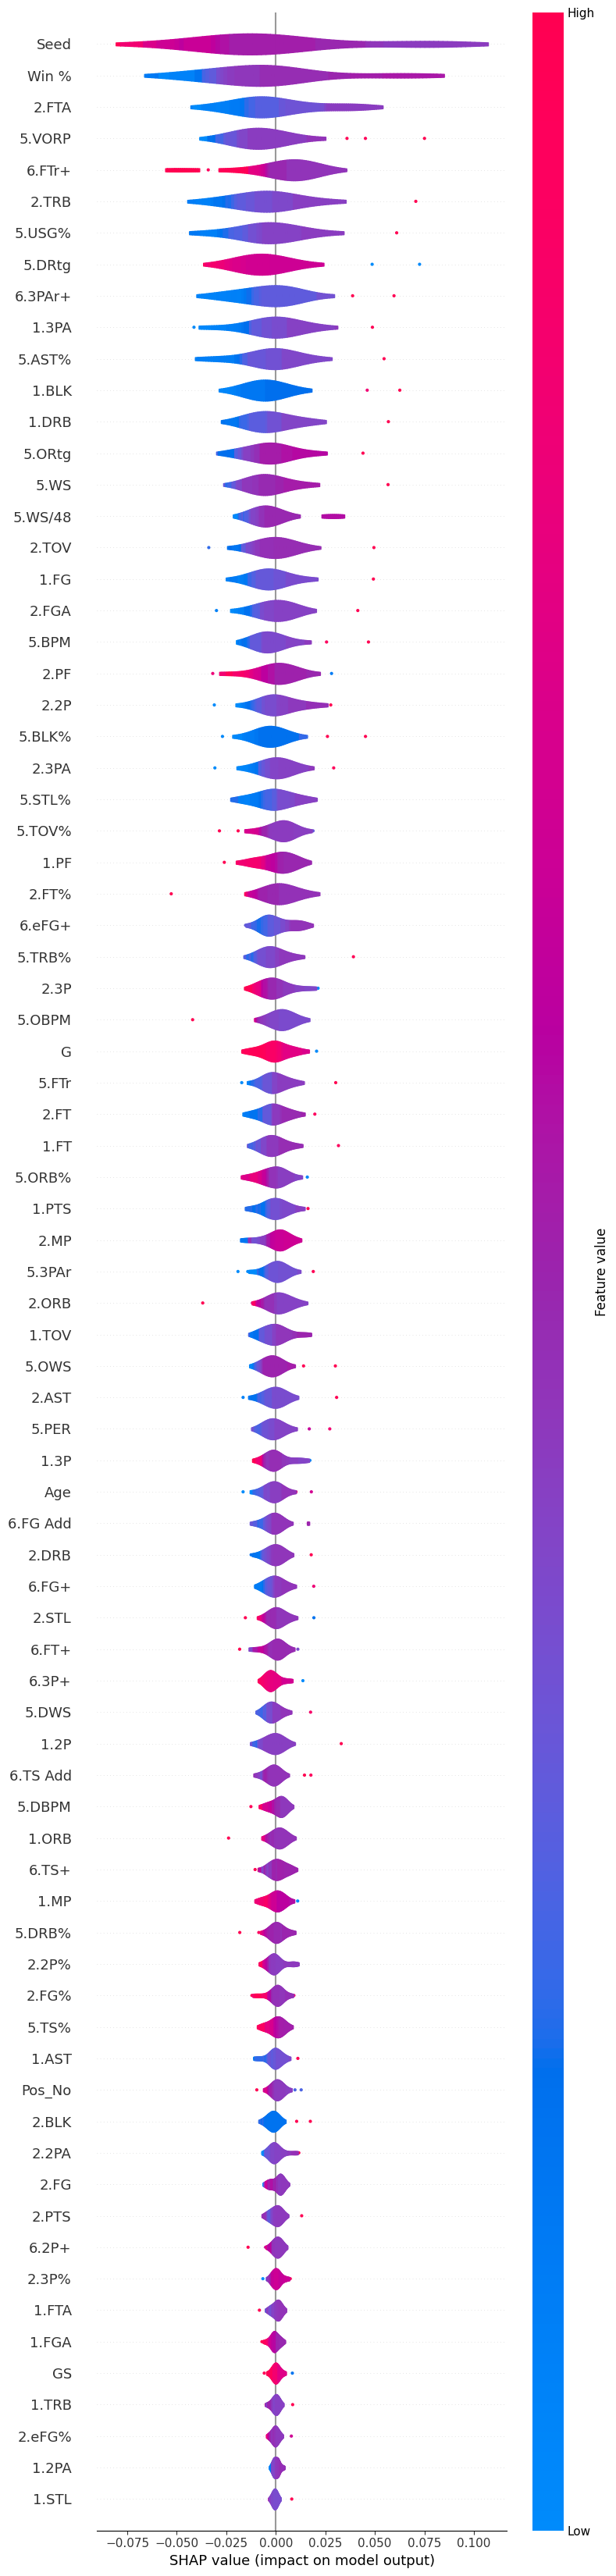

In [81]:
explainer = shap.Explainer(model.predict, normed_test_data)
shap_values = explainer(normed_test_data)
shap.summary_plot(shap_values, test, feature_names=test.columns ,plot_type='violin', max_display=len(test.columns))

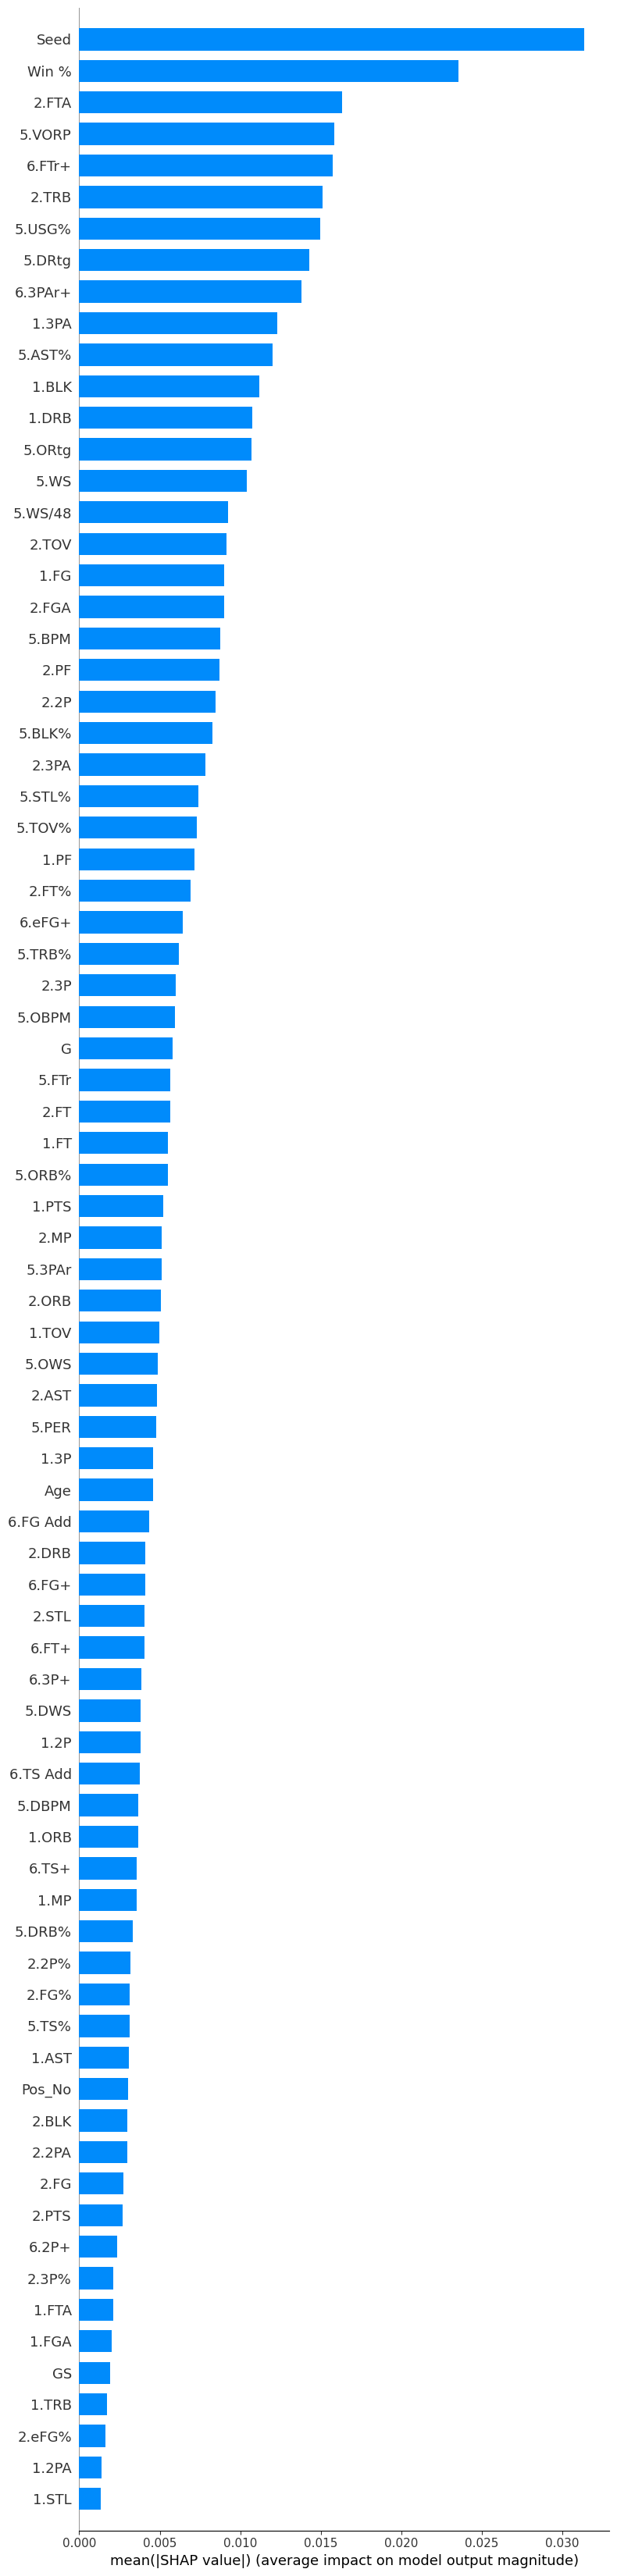

In [82]:
shap.summary_plot(shap_values, test, feature_names=test.columns ,plot_type='bar', max_display=len(test.columns))